In [1]:
import os
import pandas as pd
import json
import imgkit
import io
import base64
import matplotlib.pyplot as plt

In [2]:
# Function to create a small plot and return it as a base64-encoded image
def create_plot(data, title):
    fig, ax = plt.subplots()
    ax.plot(['k2', 'k3', 'k4', 'k5'], data, marker='*', color='red', linewidth=10)
    ax.set_title(title)
    ax.set_ylim(0, 1)
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    img_base64 = base64.b64encode(buf.read()).decode('utf-8')
    return f"<img src='data:image/png;base64,{img_base64}' width='100' height='50'>"

In [3]:
def generate_metrics_table(metrics_folder, output_image_path, split=False):
    rows = []
    files = os.listdir(metrics_folder)
    metric_files = [file for file in files if file.startswith("binary_classifier_") and file.endswith(".json")]

    k_metrics = [None, None, None, None]
    
    # Read metrics from each file and store in k_metrics list
    for file in metric_files:
        k_value = int(file.split("_")[2].split(".")[0])
        with open(os.path.join(metrics_folder, file), 'r') as f:
            metrics = json.load(f)
        k_metrics[k_value-2] = metrics

    # Iterate through gene families and metrics for each k value
    for gene_family, metrics_data_k2 in k_metrics[0].items():
        metrics_data_k3 = k_metrics[1][gene_family]
        metrics_data_k4 = k_metrics[2][gene_family]
        metrics_data_k5 = k_metrics[3][gene_family]
        
        # Find the max values for each metric
        max_accuracy = max(metrics_data_k2['accuracy'], metrics_data_k3['accuracy'], metrics_data_k4['accuracy'], metrics_data_k5['accuracy'])
        max_precision = max(metrics_data_k2['precision'], metrics_data_k3['precision'], metrics_data_k4['precision'], metrics_data_k5['precision'])
        max_recall = max(metrics_data_k2['recall'], metrics_data_k3['recall'], metrics_data_k4['recall'], metrics_data_k5['recall'])
        max_f1 = max(metrics_data_k2['f1'], metrics_data_k3['f1'], metrics_data_k4['f1'], metrics_data_k5['f1'])
        
        # Construct HTML row for each gene family
        row = f"<tr><td style='word-wrap: break-word;text-align: center;'><b>{gene_family}</b></td>"
        
        # Accuracy metrics
        row += f"<td class='lc'>{metrics_data_k2['accuracy']:.3f}</td>" if metrics_data_k2['accuracy'] != max_accuracy else f"<td class='lc'><b>{metrics_data_k2['accuracy']:.3f}</b></td>"
        row += f"<td>{metrics_data_k3['accuracy']:.3f}</td>" if metrics_data_k3['accuracy'] != max_accuracy else f"<td><b>{metrics_data_k3['accuracy']:.3f}</b></td>"
        row += f"<td>{metrics_data_k4['accuracy']:.3f}</td>" if metrics_data_k4['accuracy'] != max_accuracy else f"<td><b>{metrics_data_k4['accuracy']:.3f}</b></td>"
        row += f"<td>{metrics_data_k5['accuracy']:.3f}</td>" if metrics_data_k5['accuracy'] != max_accuracy else f"<td><b>{metrics_data_k5['accuracy']:.3f}</b></td>"
        row += f"<td>{create_plot([metrics_data_k2['accuracy'], metrics_data_k3['accuracy'], metrics_data_k4['accuracy'], metrics_data_k5['accuracy']], 'Accuracy')}</td>"
        
        # Precision metrics
        row += f"<td class='lc'>{metrics_data_k2['precision']:.3f}</td>" if metrics_data_k2['precision'] != max_precision else f"<td class='lc'><b>{metrics_data_k2['precision']:.3f}</b></td>"
        row += f"<td>{metrics_data_k3['precision']:.3f}</td>" if metrics_data_k3['precision'] != max_precision else f"<td><b>{metrics_data_k3['precision']:.3f}</b></td>"
        row += f"<td>{metrics_data_k4['precision']:.3f}</td>" if metrics_data_k4['precision'] != max_precision else f"<td><b>{metrics_data_k4['precision']:.3f}</b></td>"
        row += f"<td>{metrics_data_k5['precision']:.3f}</td>" if metrics_data_k5['precision'] != max_precision else f"<td><b>{metrics_data_k5['precision']:.3f}</b></td>"
        row += f"<td>{create_plot([metrics_data_k2['precision'], metrics_data_k3['precision'], metrics_data_k4['precision'], metrics_data_k5['precision']], 'Precision')}</td>"
        
        # Recall metrics
        row += f"<td class='lc'>{metrics_data_k2['recall']:.3f}</td>" if metrics_data_k2['recall'] != max_recall else f"<td class='lc'><b>{metrics_data_k2['recall']:.3f}</b></td>"
        row += f"<td>{metrics_data_k3['recall']:.3f}</td>" if metrics_data_k3['recall'] != max_recall else f"<td><b>{metrics_data_k3['recall']:.3f}</b></td>"
        row += f"<td>{metrics_data_k4['recall']:.3f}</td>" if metrics_data_k4['recall'] != max_recall else f"<td><b>{metrics_data_k4['recall']:.3f}</b></td>"
        row += f"<td>{metrics_data_k5['recall']:.3f}</td>" if metrics_data_k5['recall'] != max_recall else f"<td><b>{metrics_data_k5['recall']:.3f}</b></td>"
        row += f"<td>{create_plot([metrics_data_k2['recall'], metrics_data_k3['recall'], metrics_data_k4['recall'], metrics_data_k5['recall']], 'Recall')}</td>"
        
        # F1 metrics
        row += f"<td class='lc'>{metrics_data_k2['f1']:.3f}</td>" if metrics_data_k2['f1'] != max_f1 else f"<td class='lc'><b>{metrics_data_k2['f1']:.3f}</b></td>"
        row += f"<td>{metrics_data_k3['f1']:.3f}</td>" if metrics_data_k3['f1'] != max_f1 else f"<td><b>{metrics_data_k3['f1']:.3f}</b></td>"
        row += f"<td>{metrics_data_k4['f1']:.3f}</td>" if metrics_data_k4['f1'] != max_f1 else f"<td><b>{metrics_data_k4['f1']:.3f}</b></td>"
        row += f"<td>{metrics_data_k5['f1']:.3f}</td>" if metrics_data_k5['f1'] != max_f1 else f"<td><b>{metrics_data_k5['f1']:.3f}</b></td>"
        row += f"<td>{create_plot([metrics_data_k2['f1'], metrics_data_k3['f1'], metrics_data_k4['f1'], metrics_data_k5['f1']], 'F1')}</td>"
        
        row += "</tr>"
        rows.append(row)
        
    # Function to construct HTML for table
    def construct_html_table(rows):
        return f"""
        <html>
        <head>
            <style>
                table {{
                    width: 100%;
                    border-collapse: collapse;
                    border: 1px solid black;
                }}
                th, td {{
                    border: 1px solid black;
                    padding: 8px;
                    text-align: center;
                    font-size: 14px;
                }}
                th {{
                    background-color: #f2f2f2;
                }}
                .main-col {{
                    text-align: center;
                    background-color: #e6f7ff; /* Soft background color for main columns */
                }}
                .sub-col {{
                    background-color: #f2f2f2; /* Light background color for sub-columns */
                }}
                thead, tbody {{
                    border: 1px solid;
                }}
                .lc {{
                    border-left: 1px solid !important;
                }}
                .metric_style{{
                    text-align: center !important;
                    border: 1px solid !important;
                }}
            </style>
        </head>
        <body>
        <!--<h2>Metrics Table</h2>-->
        <table>
        <thead>
            <tr>
                <th rowspan="4" class="main-col-" style='word-wrap: break-word;text-align: center;'>Gene Family</th>
                <th colspan="5" class="metric_style">Accuracy</th>
                <th colspan="5" class="main-col- metric_style">Precision</th>
                <th colspan="5" class="main-col- metric_style">Recall</th>
                <th colspan="5" class="main-col- metric_style">F1</th>
            </tr>
            <tr>
                <th class="sub-col lc">k=2</th>
                <th class="sub-col">k=3</th>
                <th class="sub-col">k=4</th>
                <th class="sub-col">k=5</th>
                <th class="sub-col">trend</th>
                <th class="sub-col lc">k=2</th>
                <th class="sub-col">k=3</th>
                <th class="sub-col">k=4</th>
                <th class="sub-col">k=5</th>
                <th class="sub-col">trend</th>
                <th class="sub-col lc">k=2</th>
                <th class="sub-col">k=3</th>
                <th class="sub-col">k=4</th>
                <th class="sub-col">k=5</th>
                <th class="sub-col">trend</th>
                <th class="sub-col lc">k=2</th>
                <th class="sub-col">k=3</th>
                <th class="sub-col">k=4</th>
                <th class="sub-col">k=5</th>
                <th class="sub-col">trend</th>
            </tr>
        </thead>
        <tbody>
        {''.join(rows)}
        </tbody>
        </table>
        </body>
        </html>
        """

    # Save HTML table to PNG
    if split:
        # Split rows into two parts
        mid_index = len(rows) // 2
        rows_part1 = rows[:mid_index]
        rows_part2 = rows[mid_index:]
        
        # Generate HTML content for both parts
        table_html_part1 = construct_html_table(rows_part1)
        table_html_part2 = construct_html_table(rows_part2)
        
        # Save both parts as separate PNG images
        imgkit.from_string(table_html_part1, output_image_path.replace(".png", "_part1.png"))
        imgkit.from_string(table_html_part2, output_image_path.replace(".png", "_part2.png"))
        
        return table_html_part1, table_html_part2
    else:
        # Generate HTML content for the whole table
        table_html = construct_html_table(rows)
        
        # Save as single PNG image
        imgkit.from_string(table_html, output_image_path)
        
        return table_html

In [4]:
# Example usage:
metrics_folder = "./metrics"
output_image_path = "metrics_table_anova.png"
metrics_table = generate_metrics_table(metrics_folder, output_image_path, split=True)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               



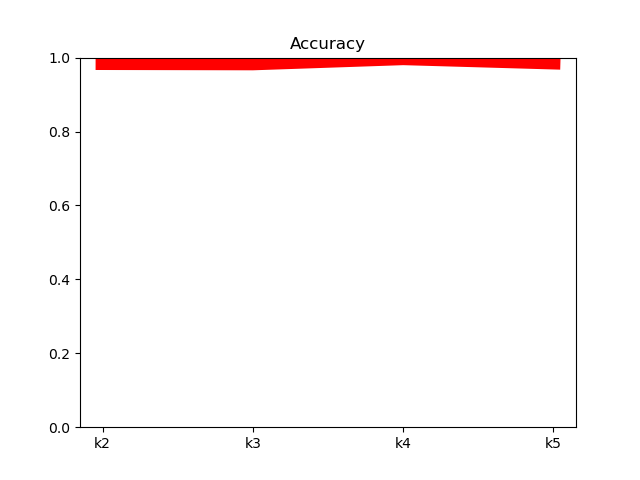
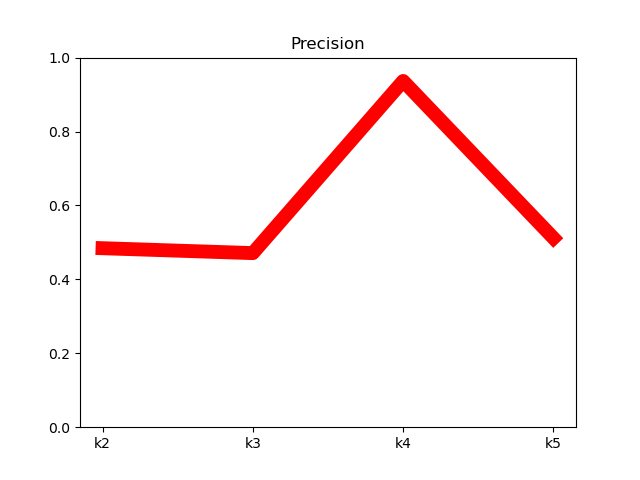
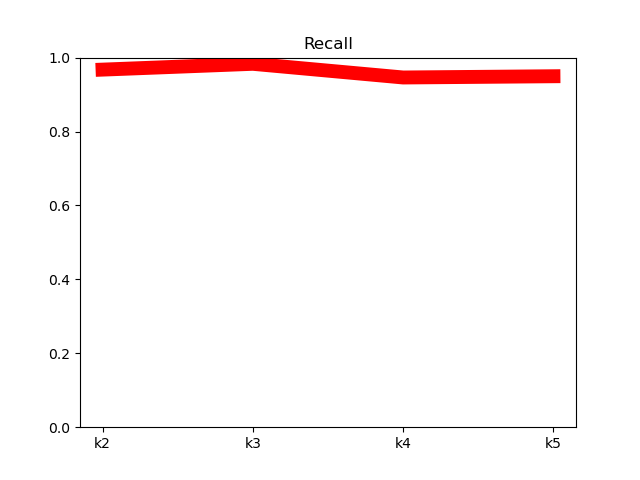
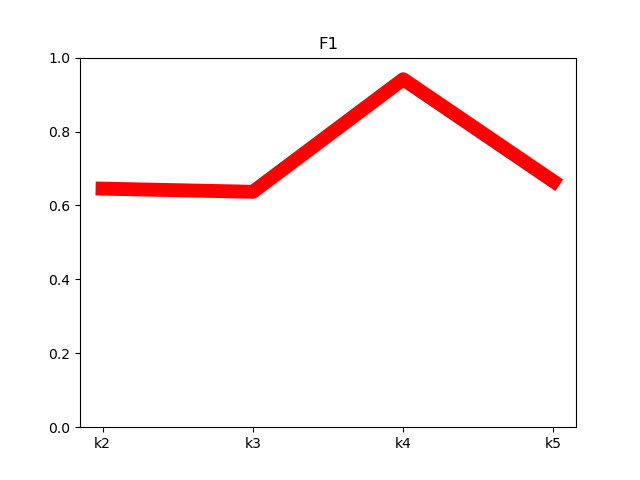
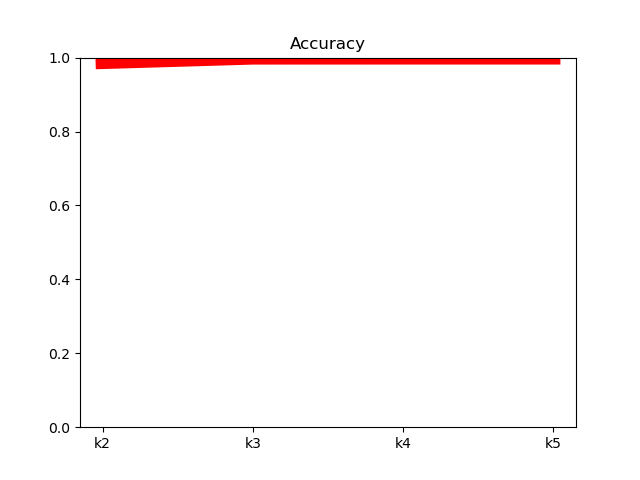
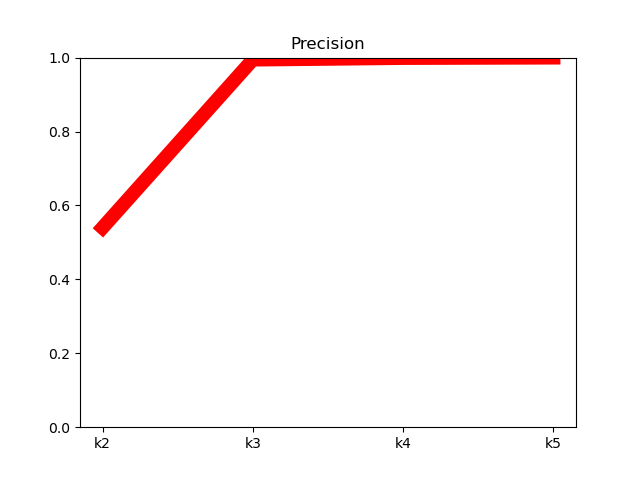
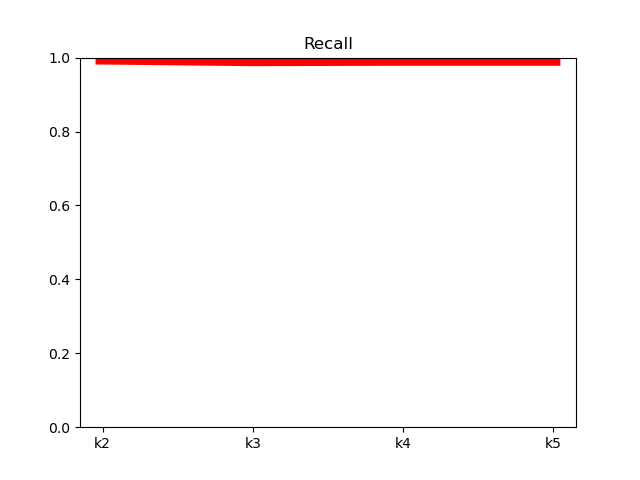
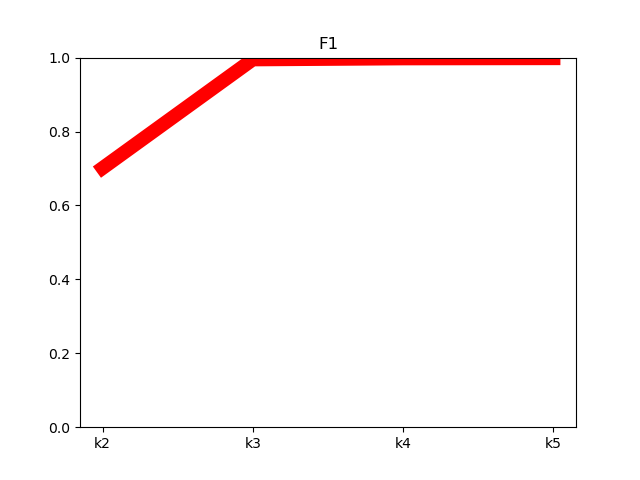
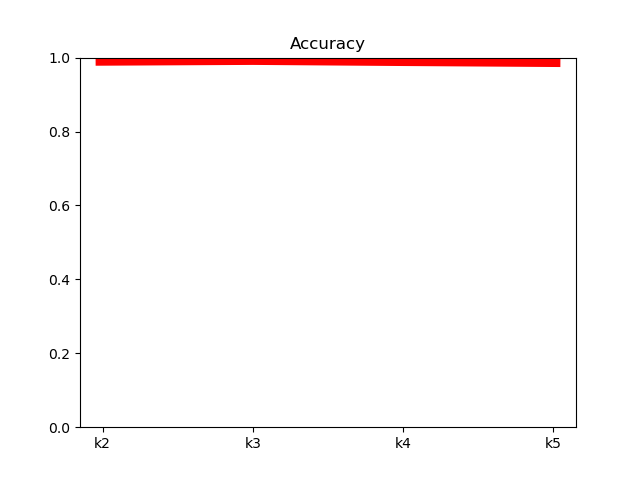
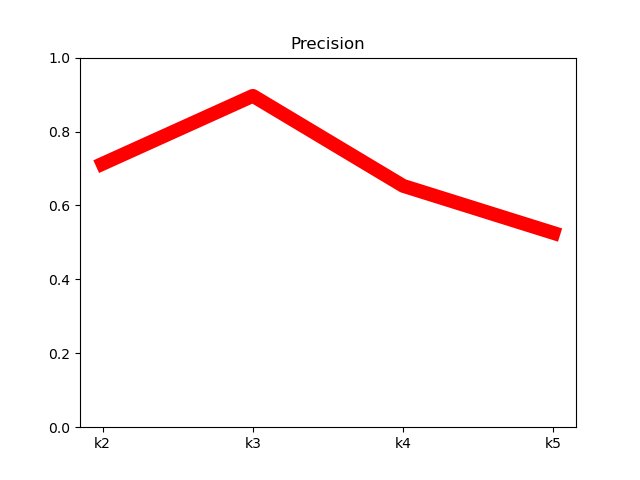
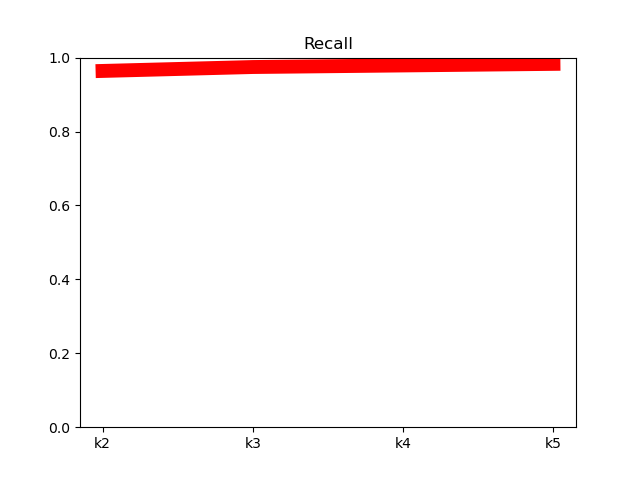
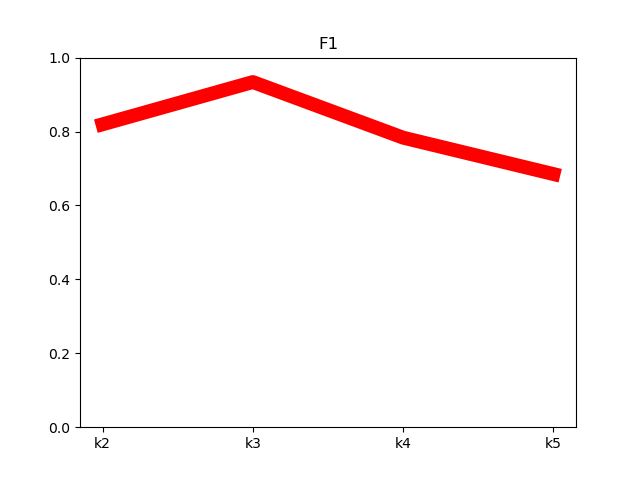
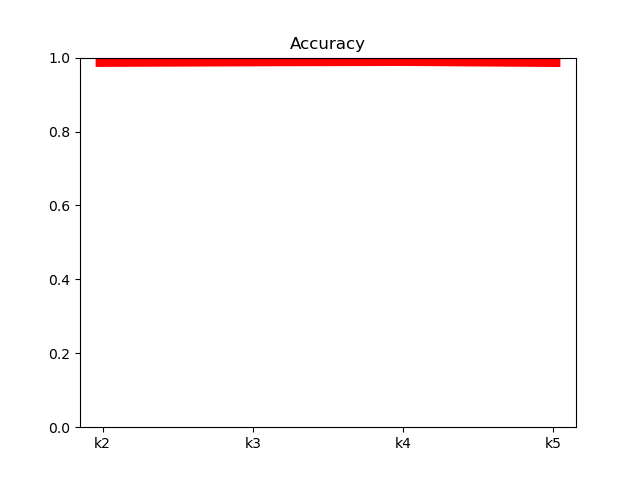
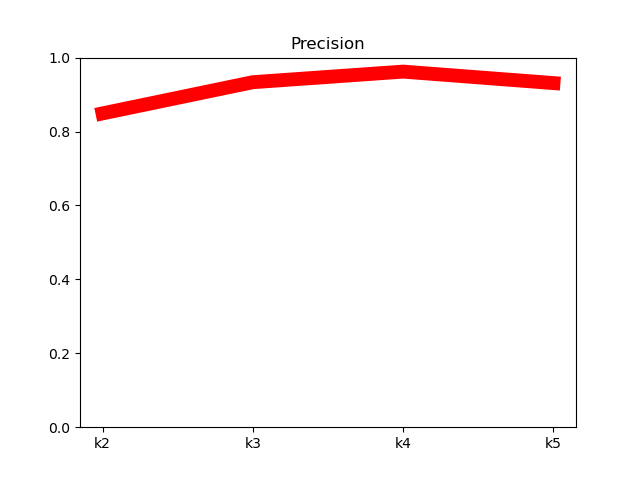
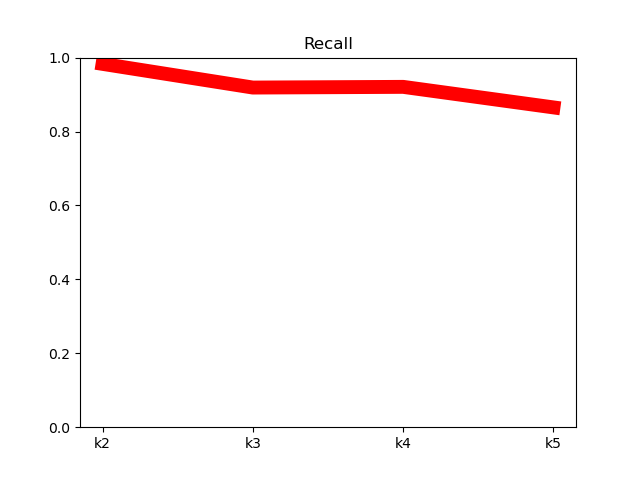
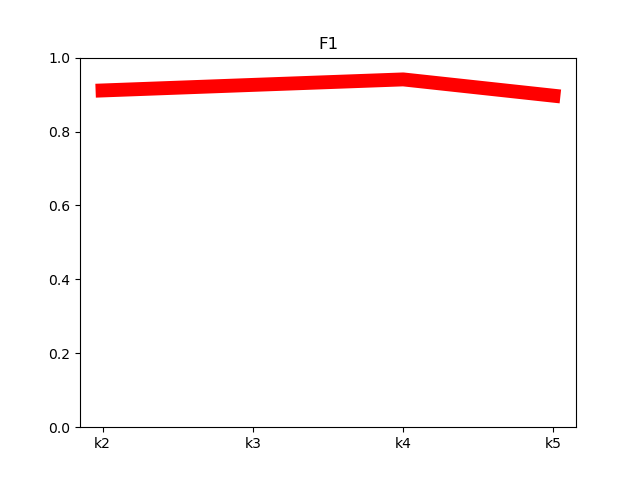
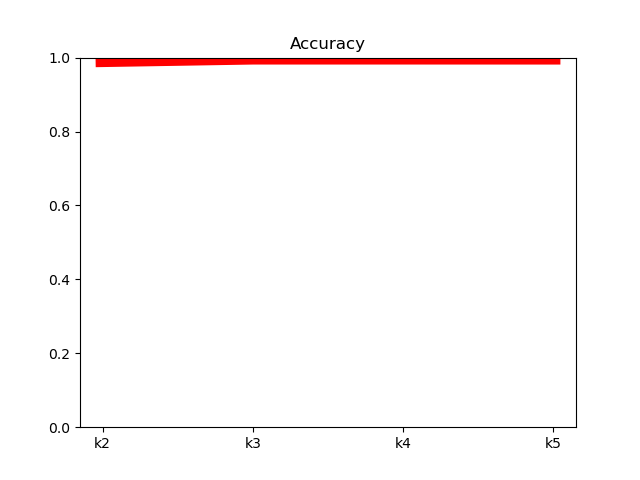
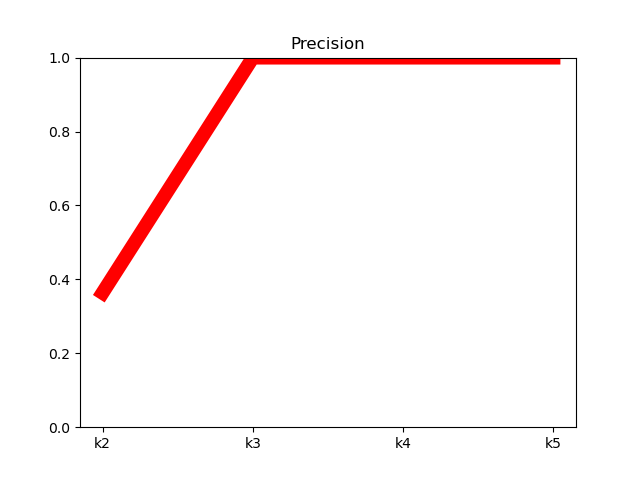
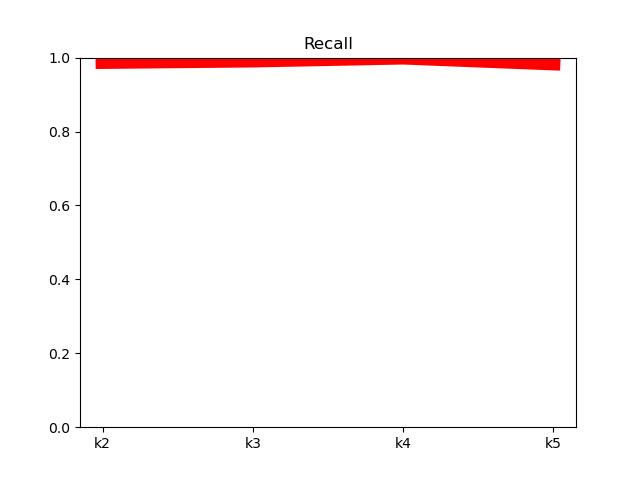
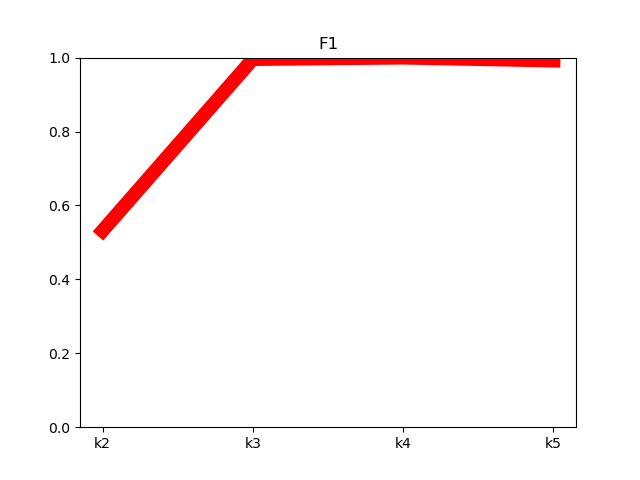
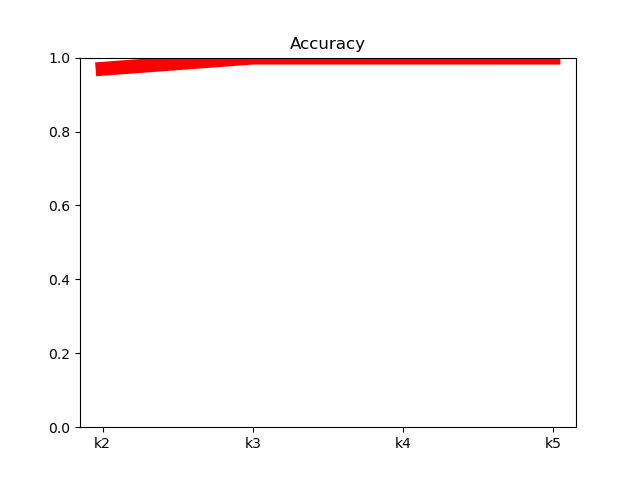
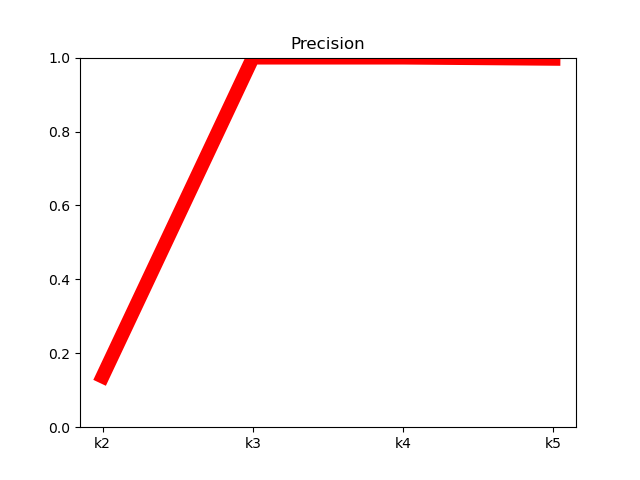
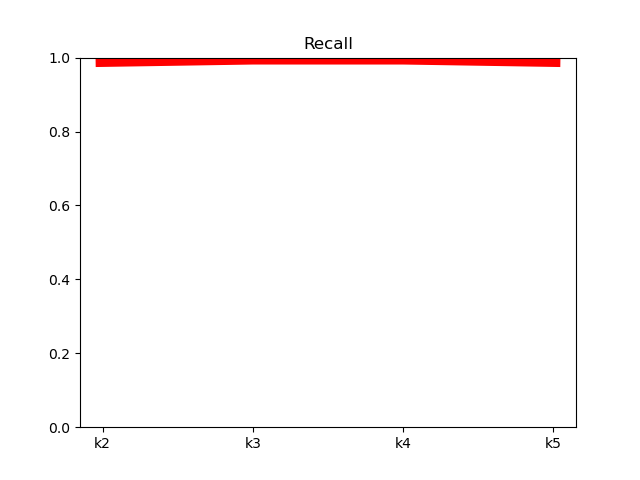
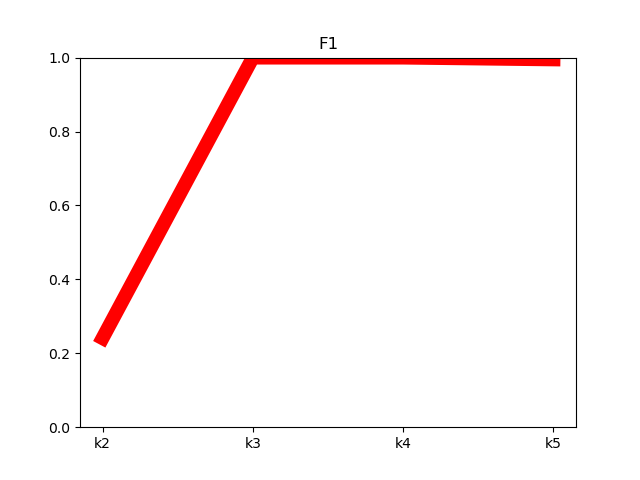
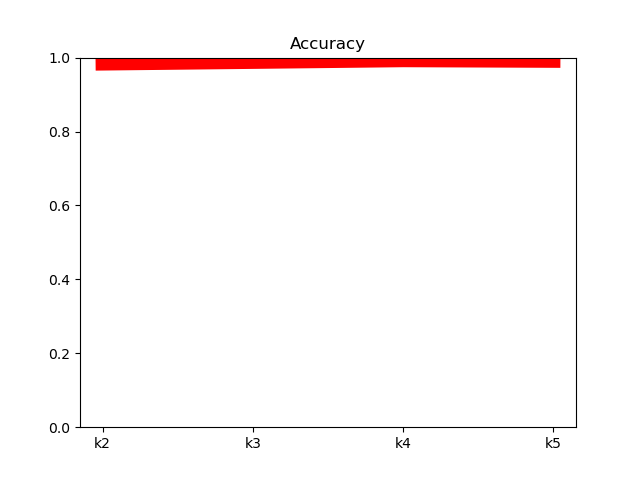
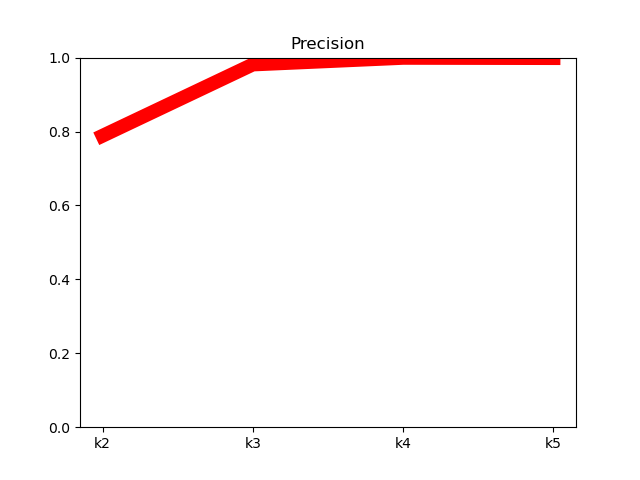
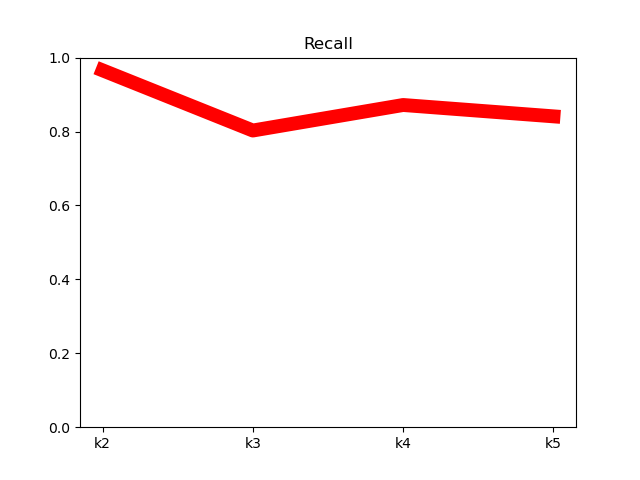
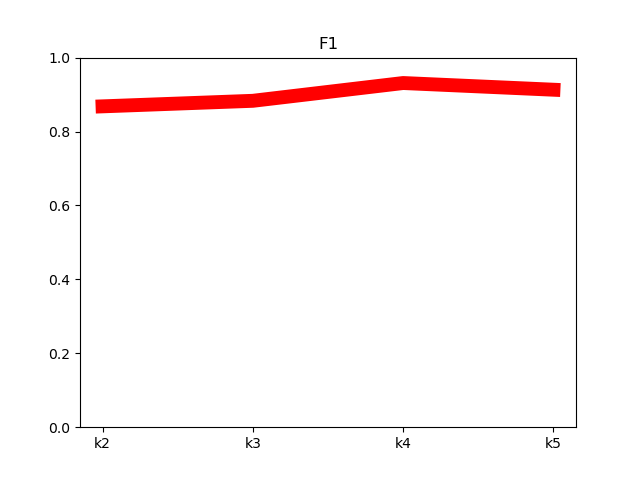
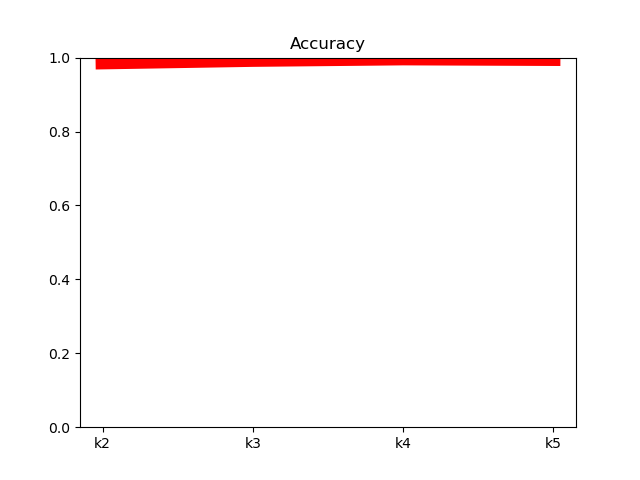
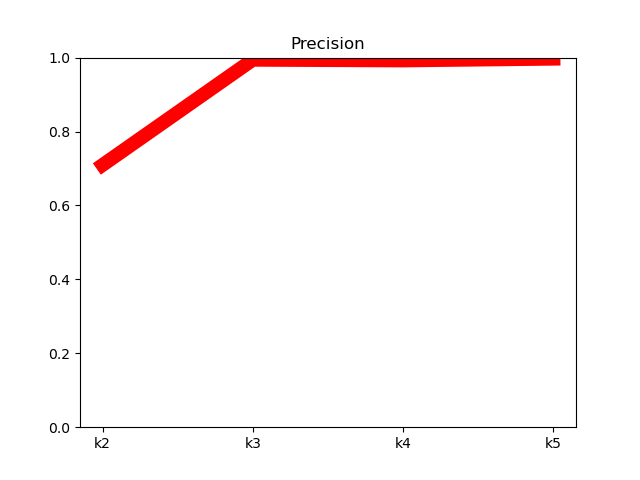
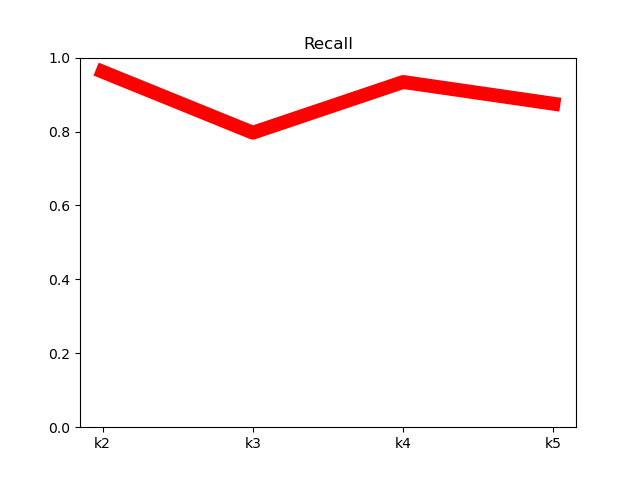
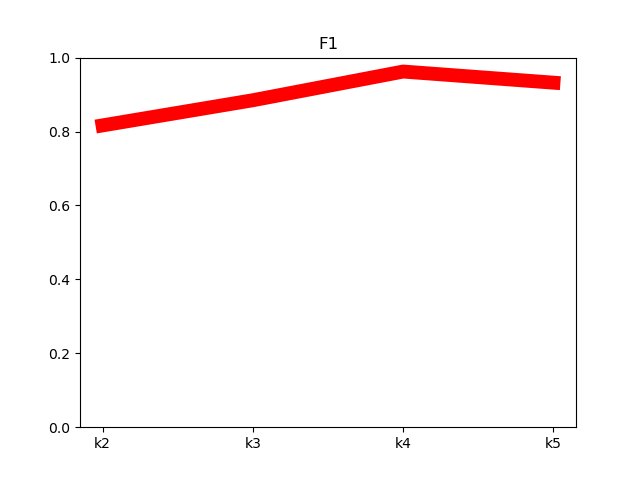
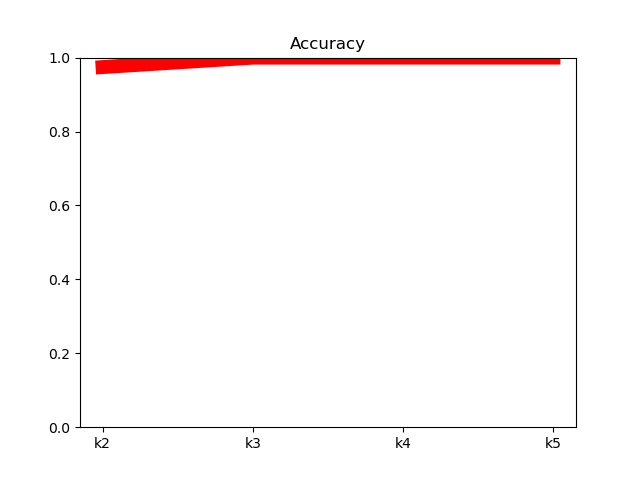
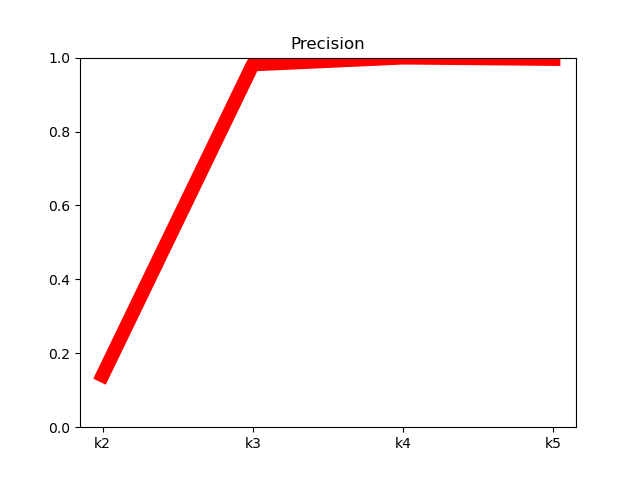
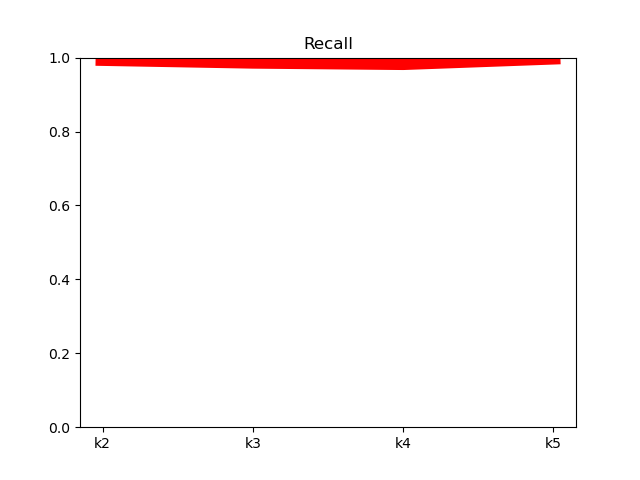
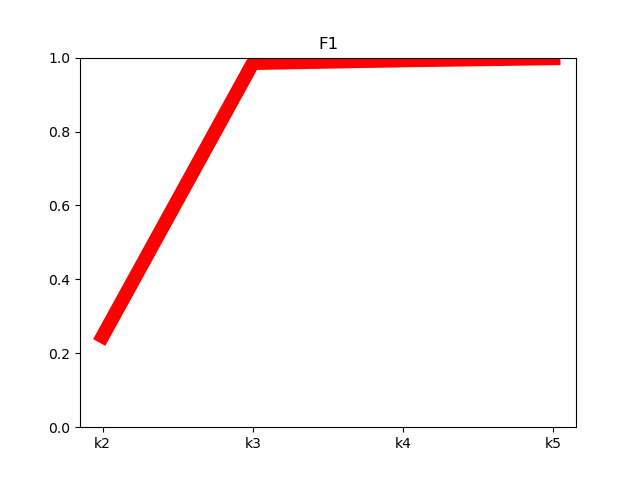
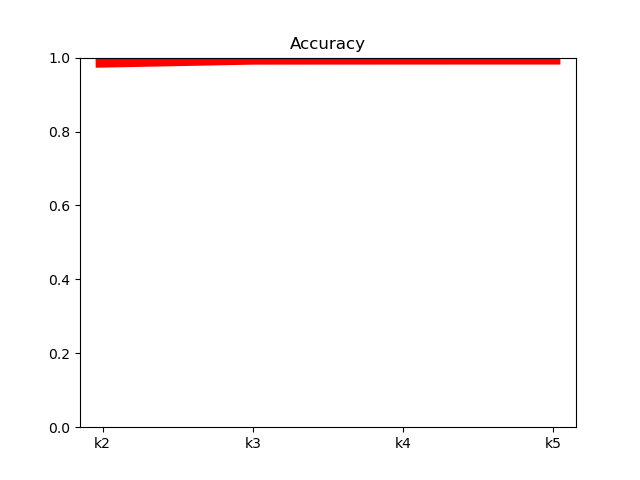
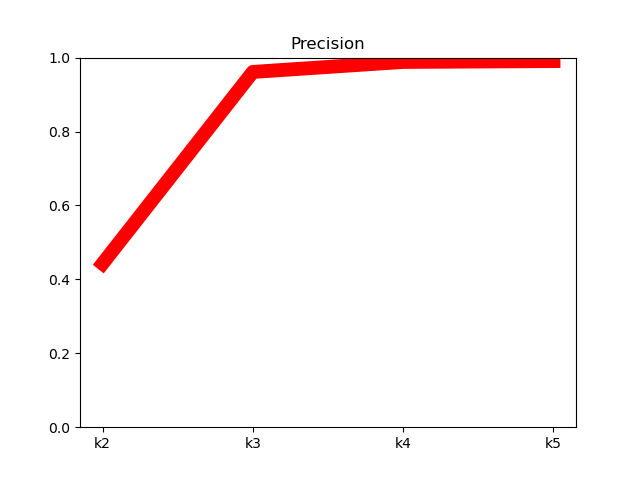
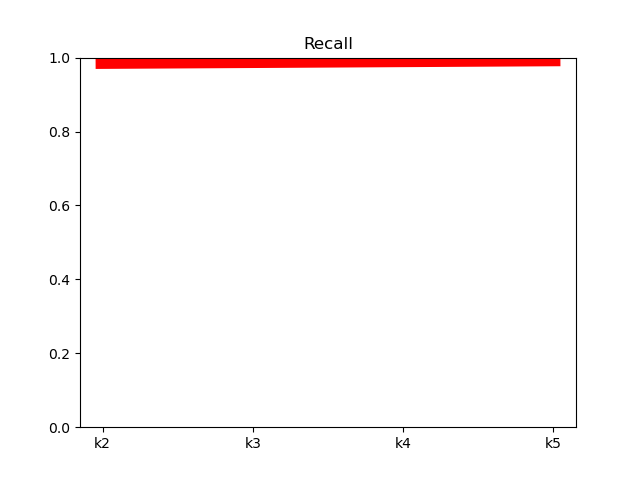
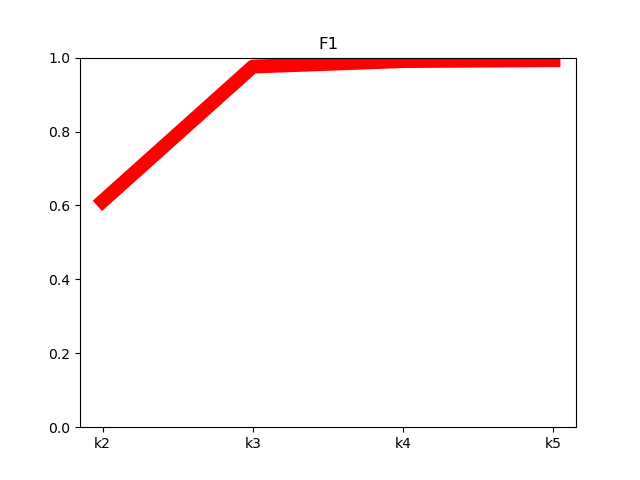
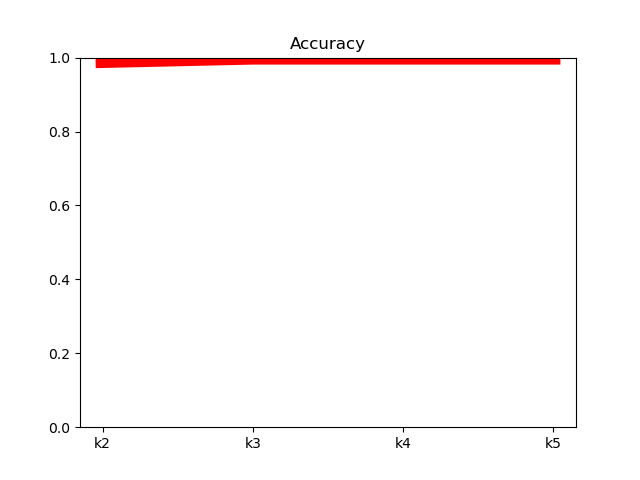
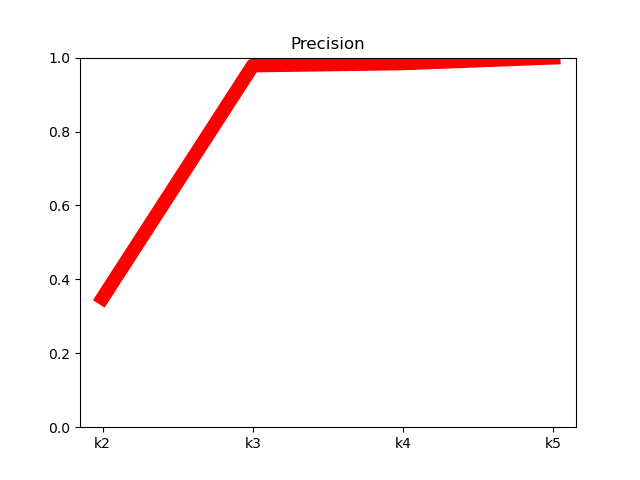
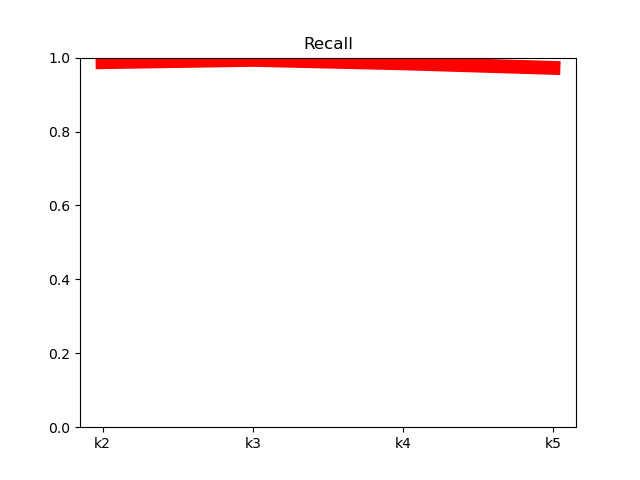
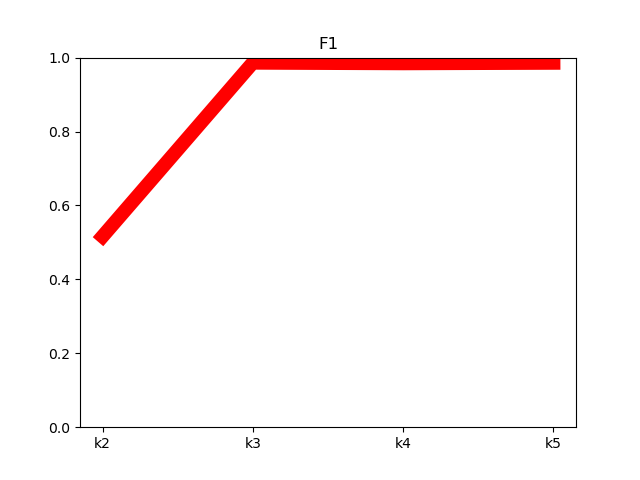
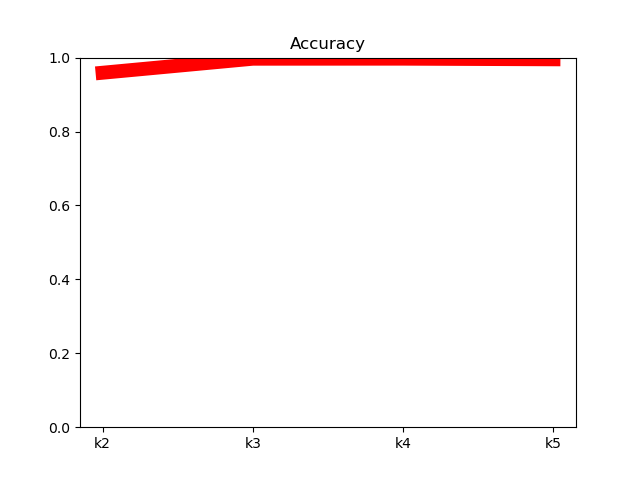
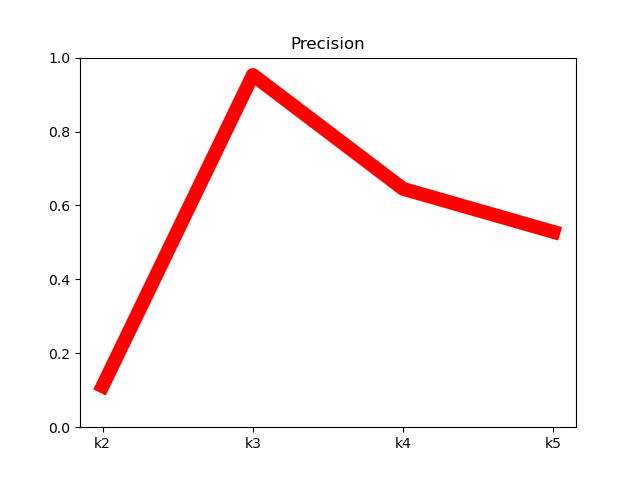
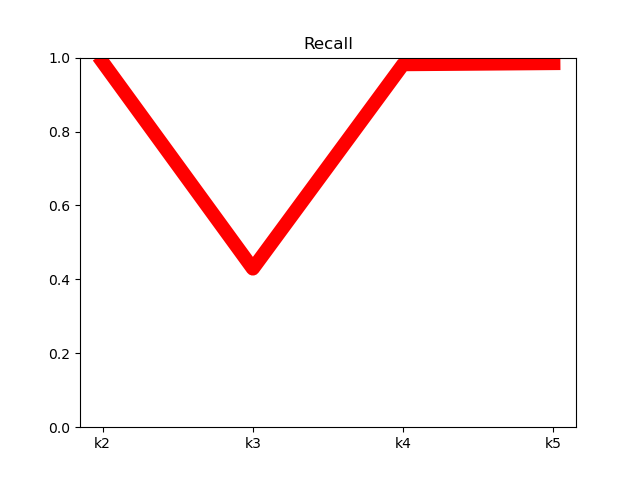
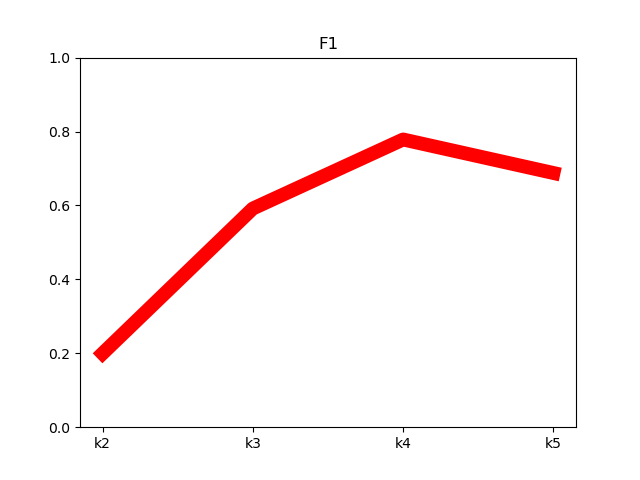
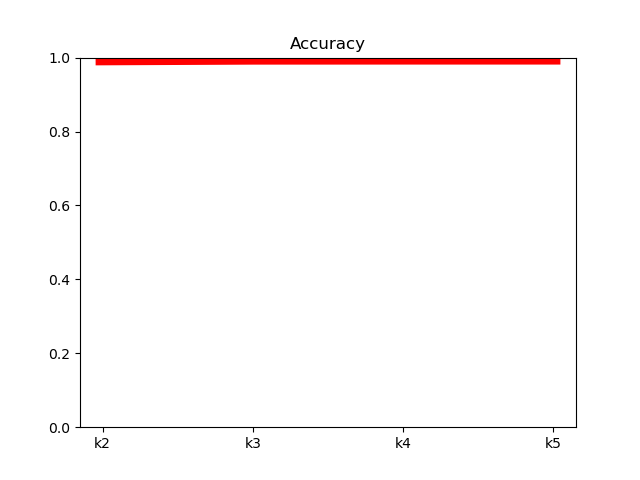
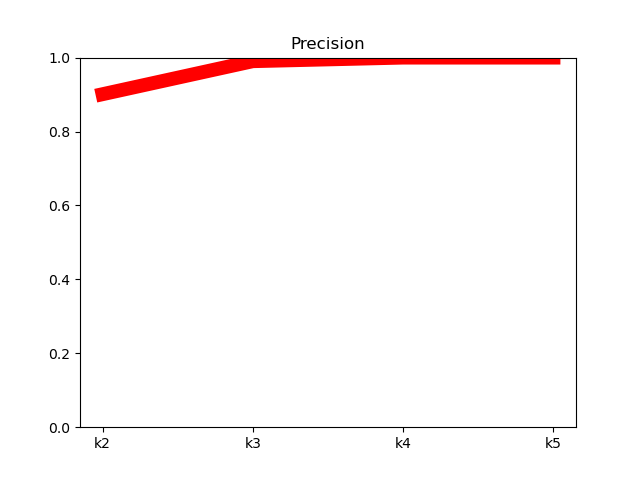
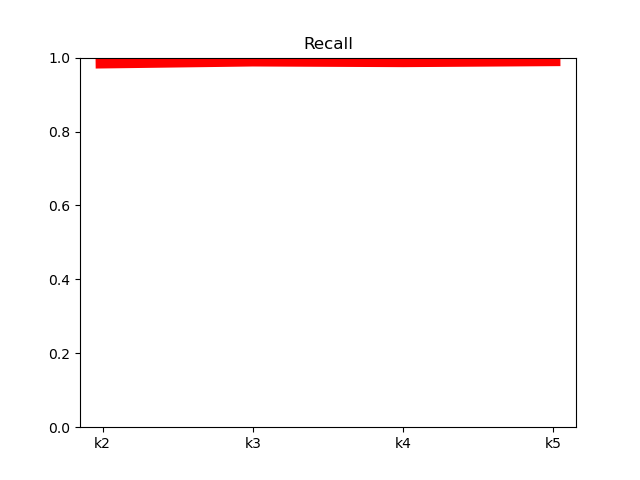
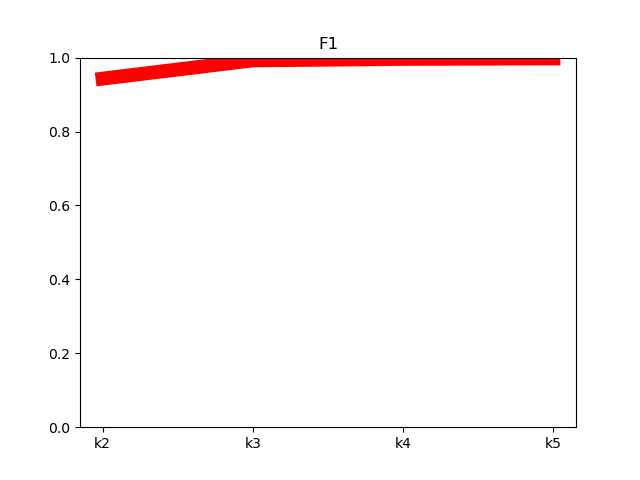
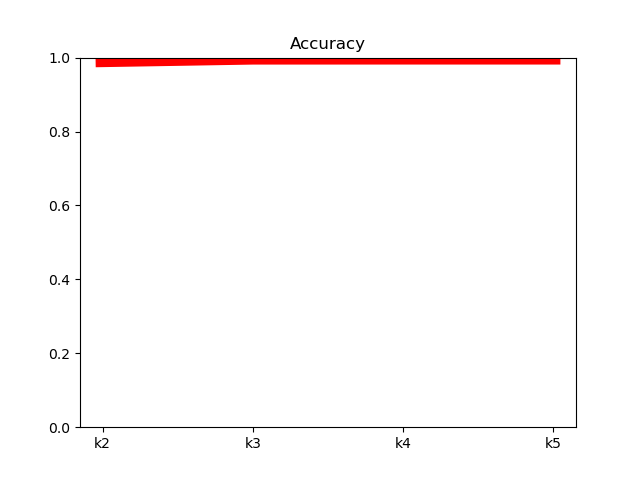
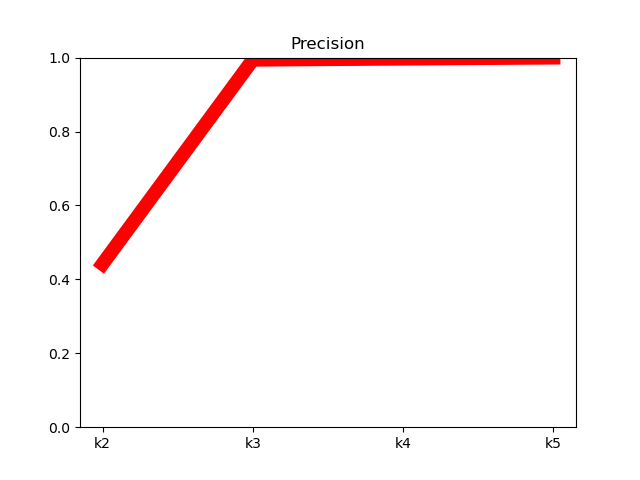
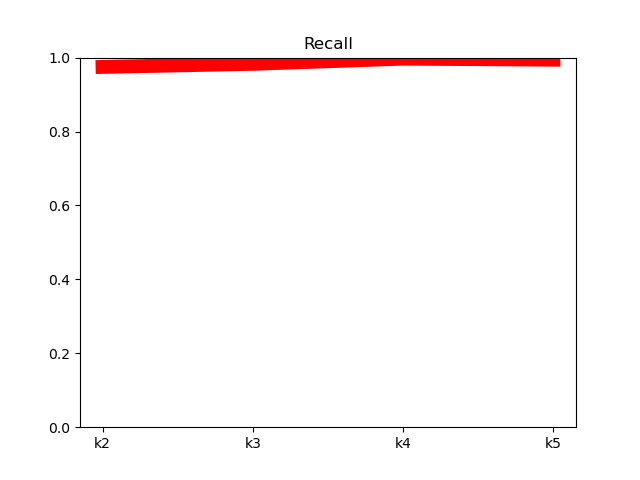
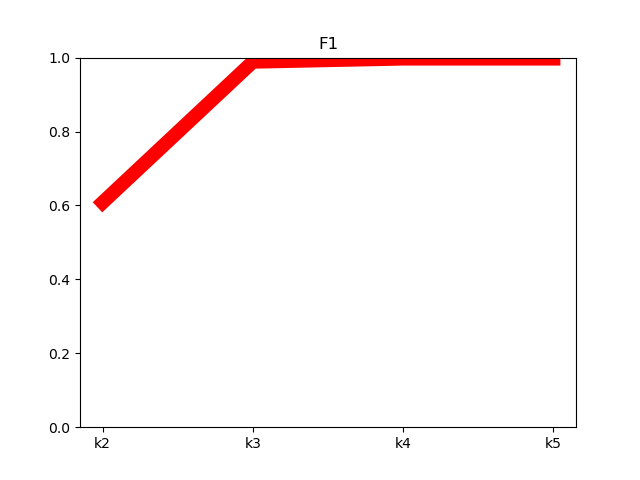
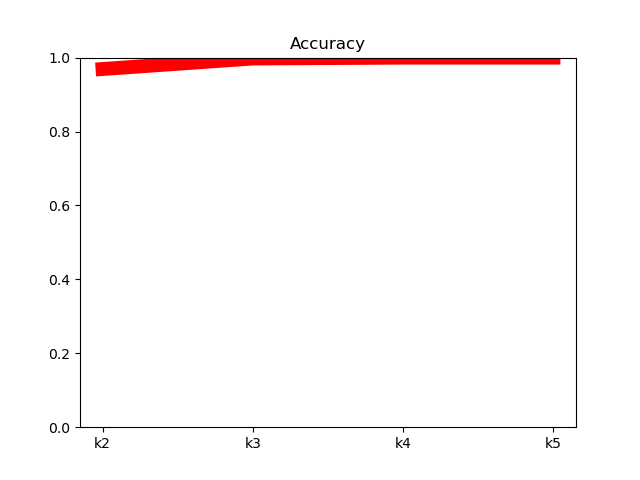
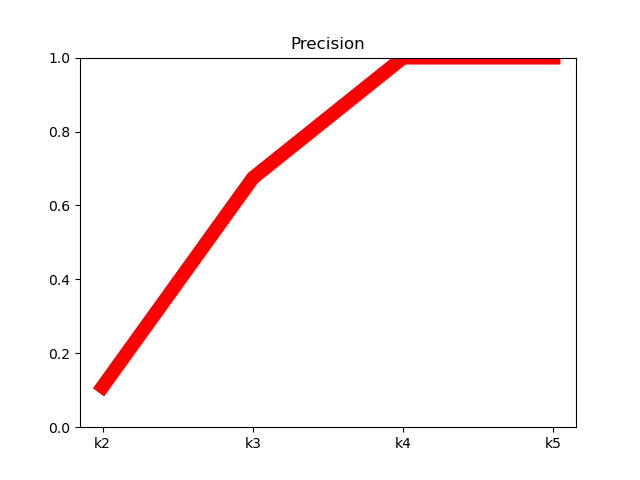
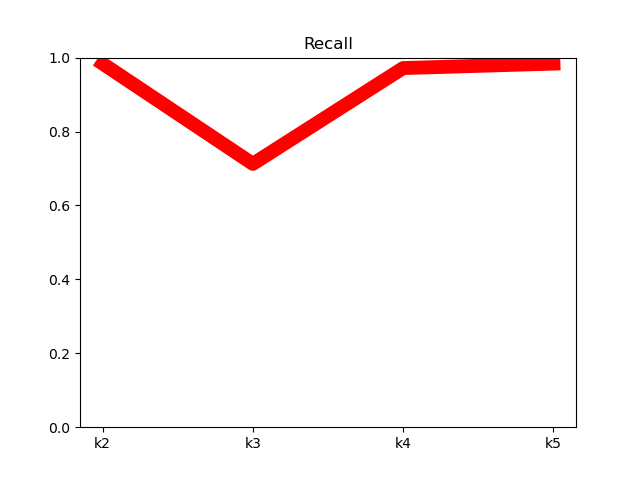
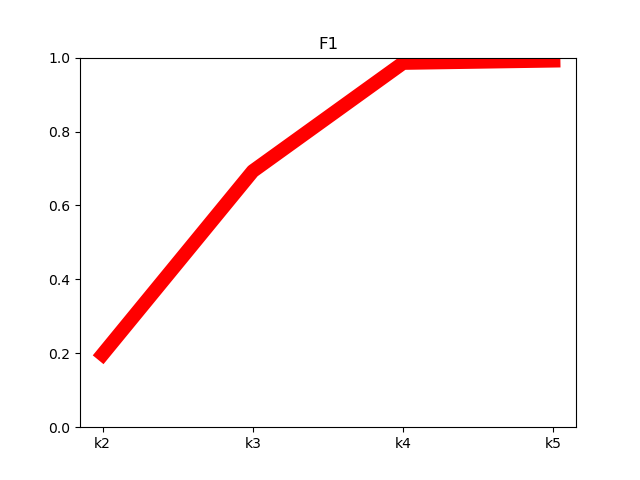
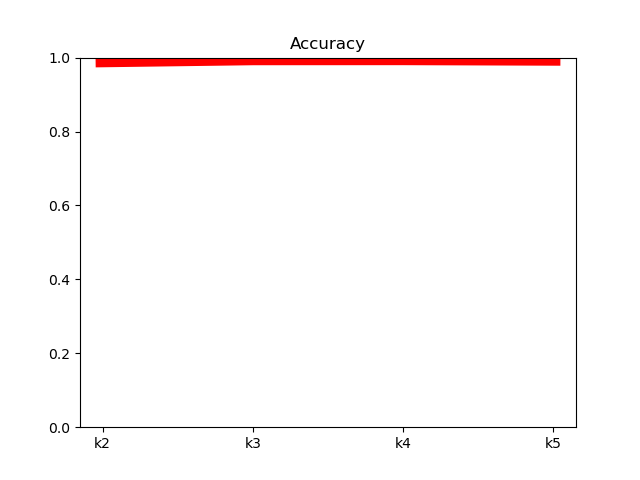
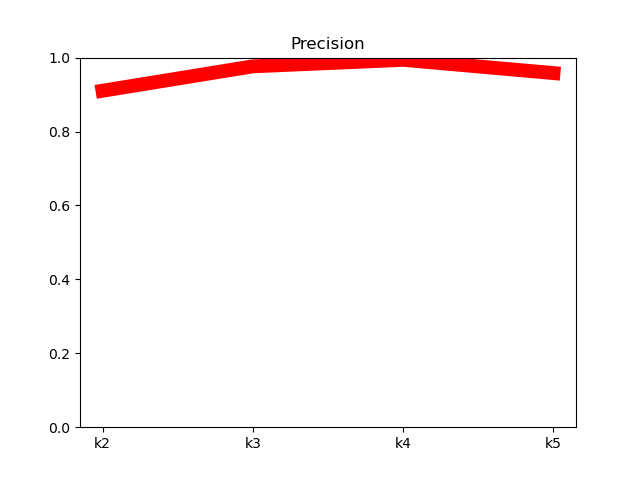
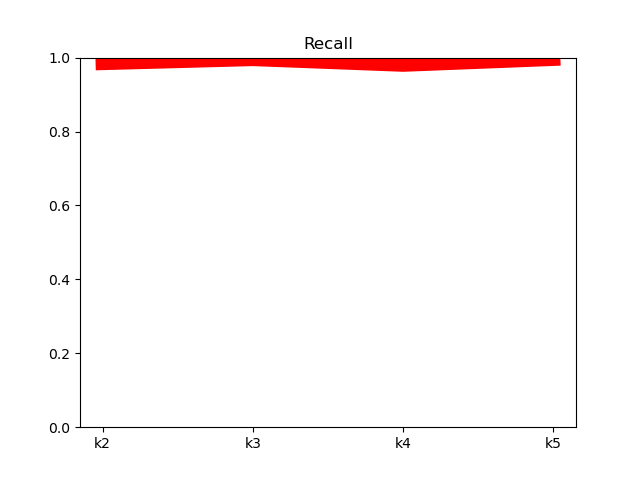
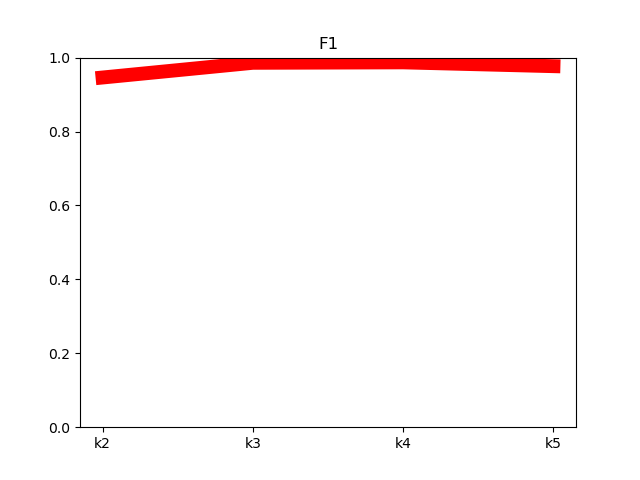
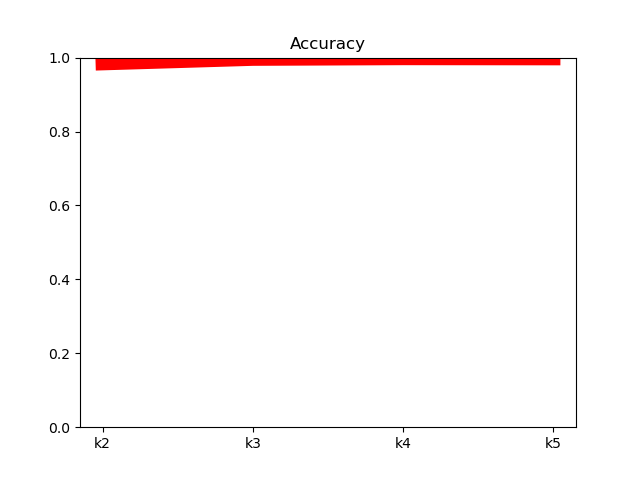
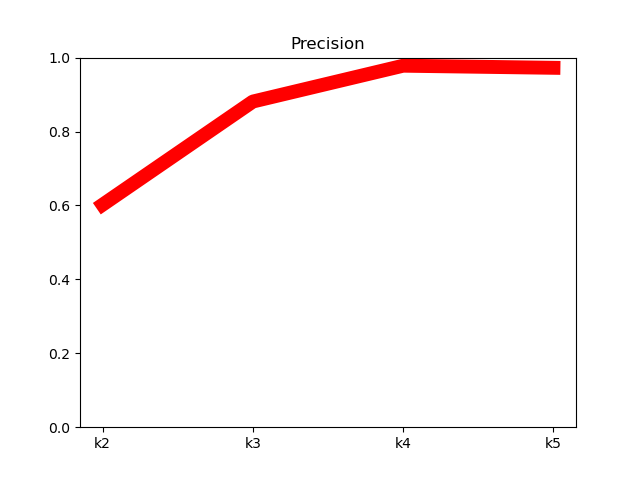
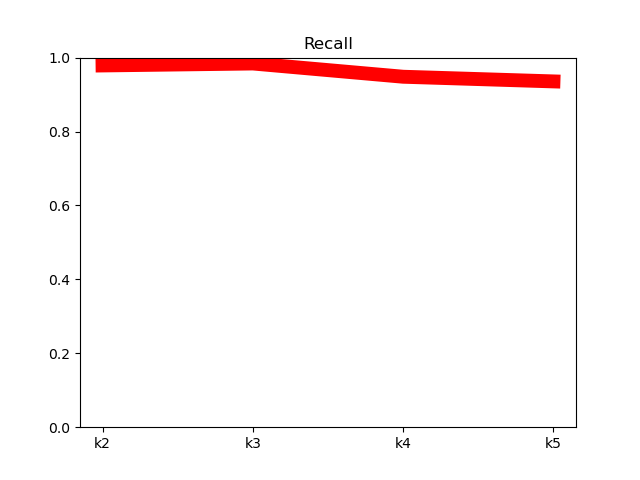
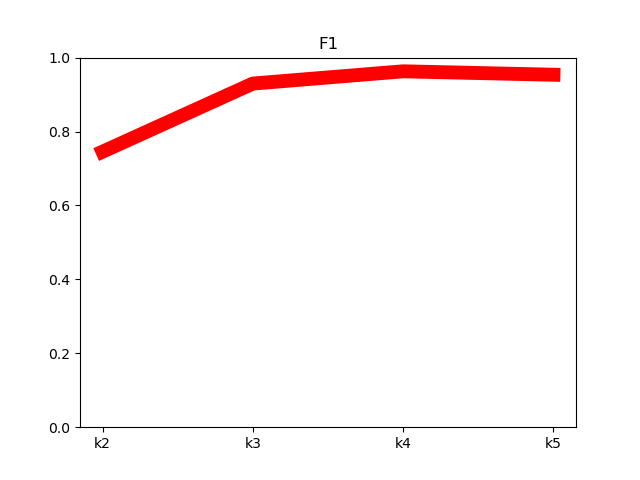
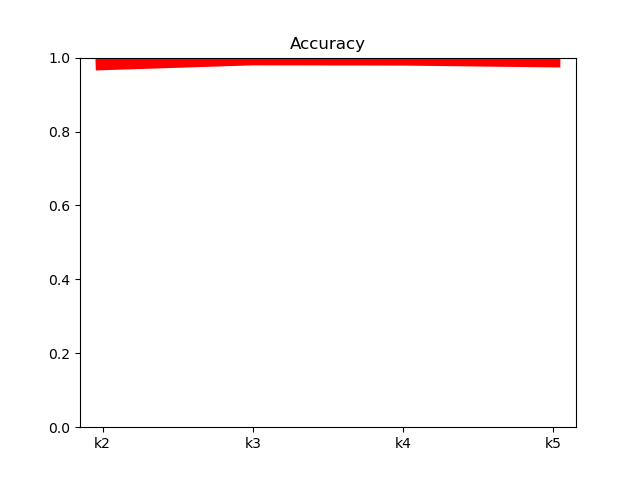
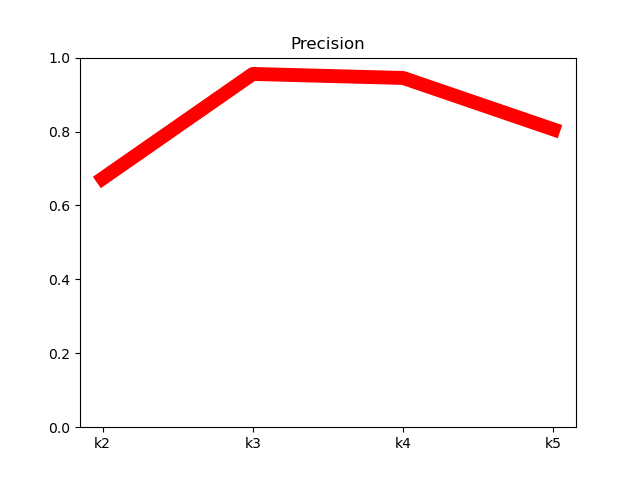
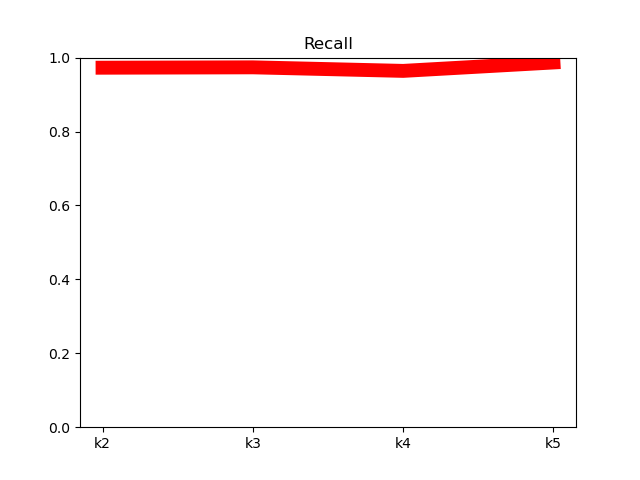
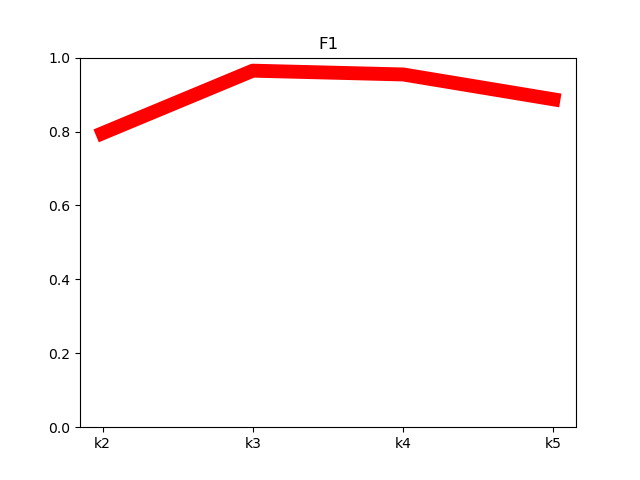
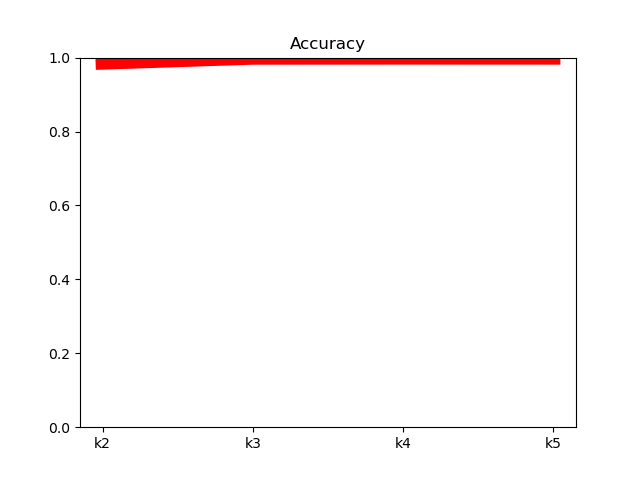
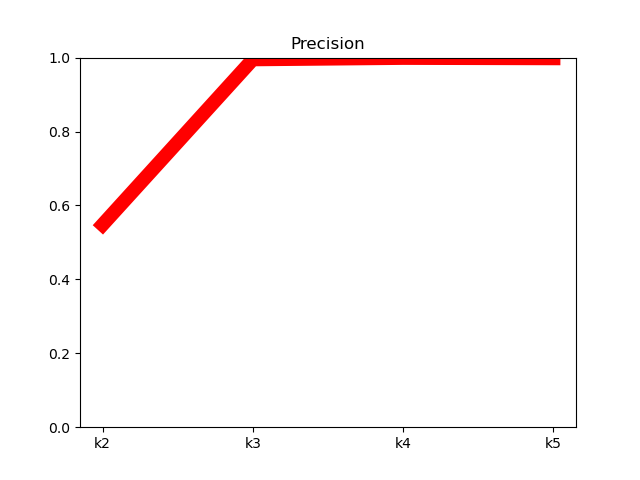
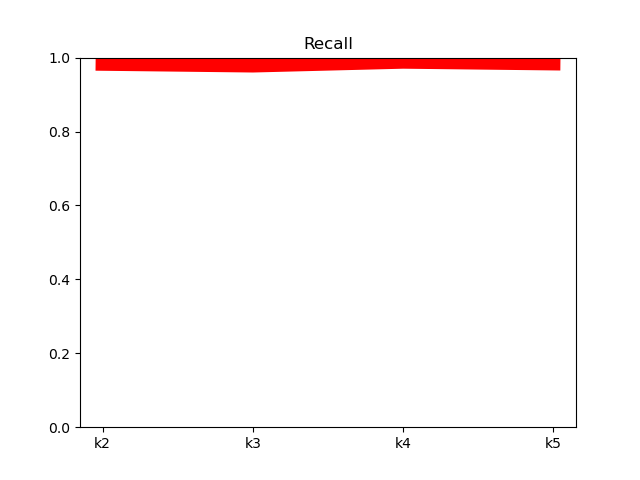
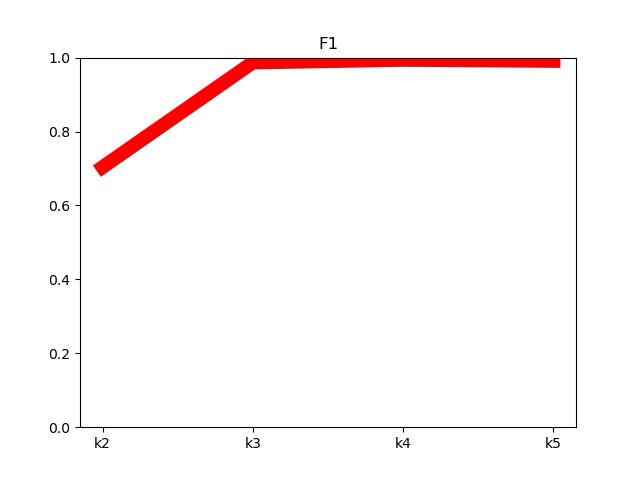
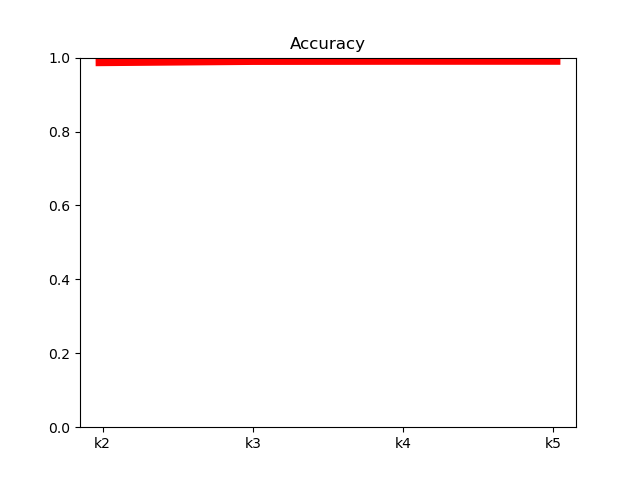
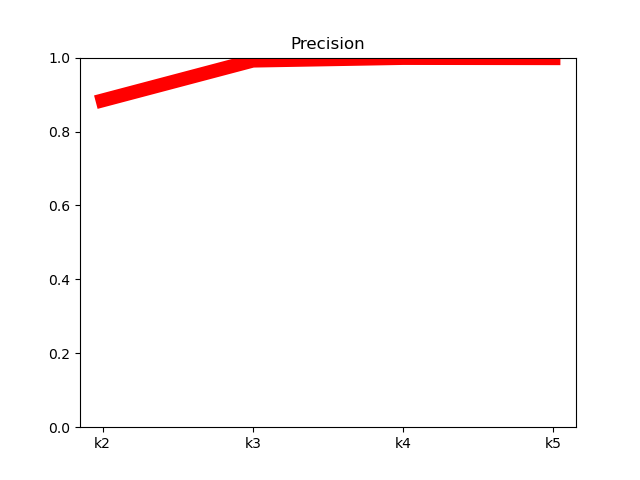
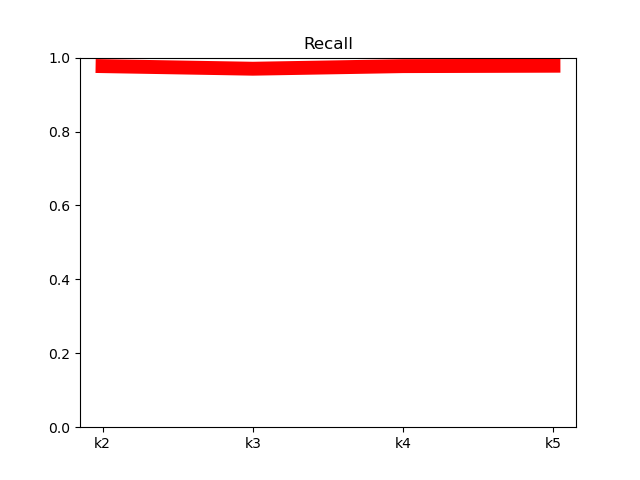
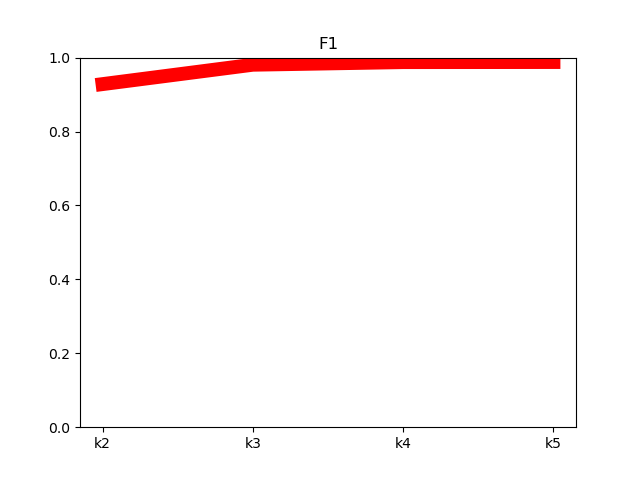
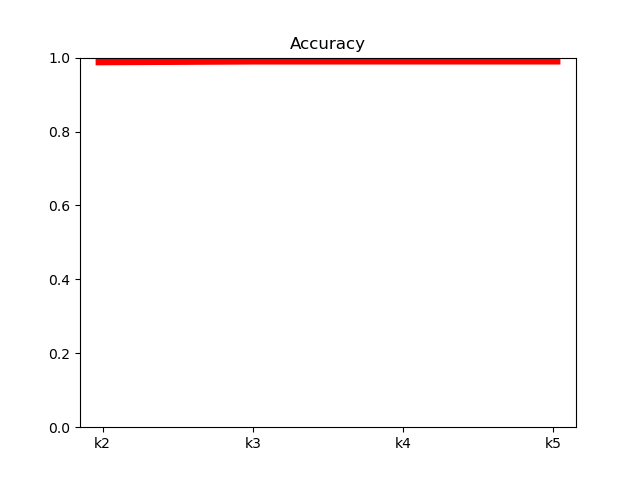
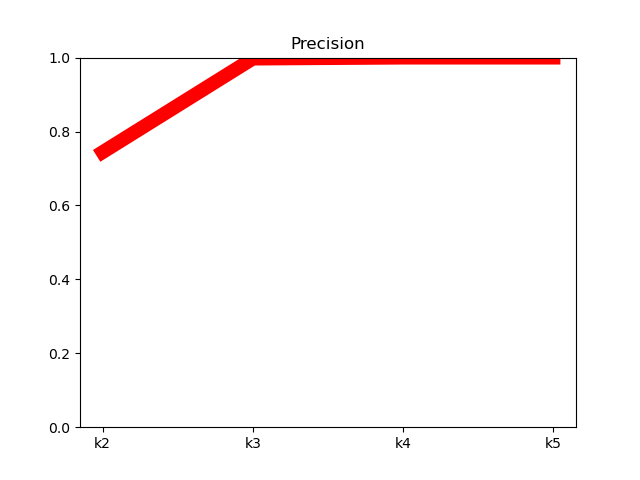
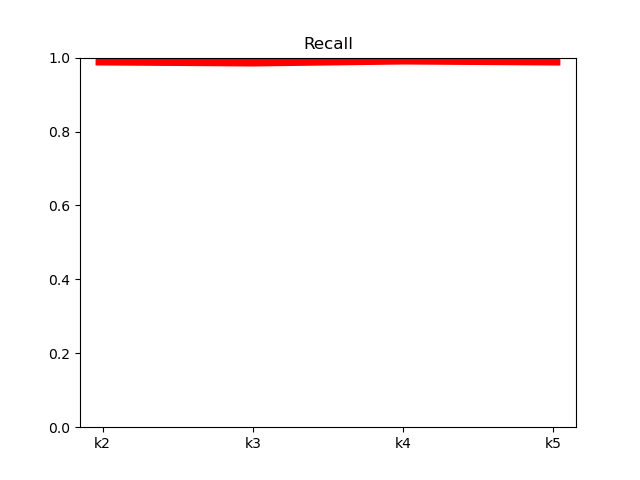
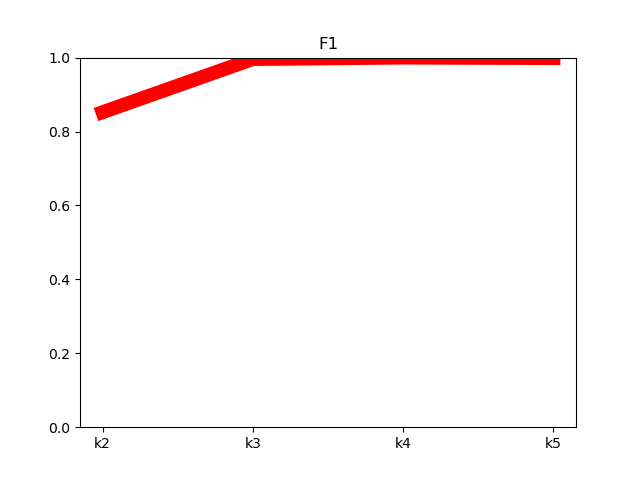
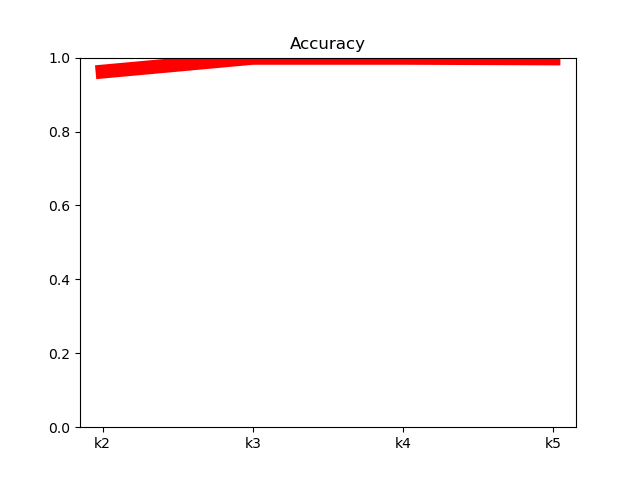
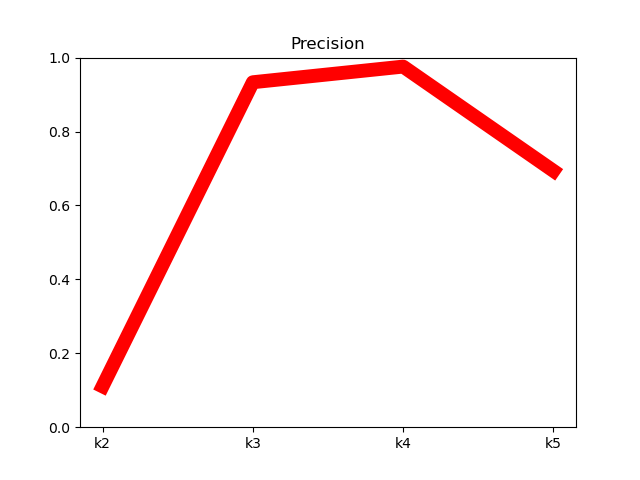
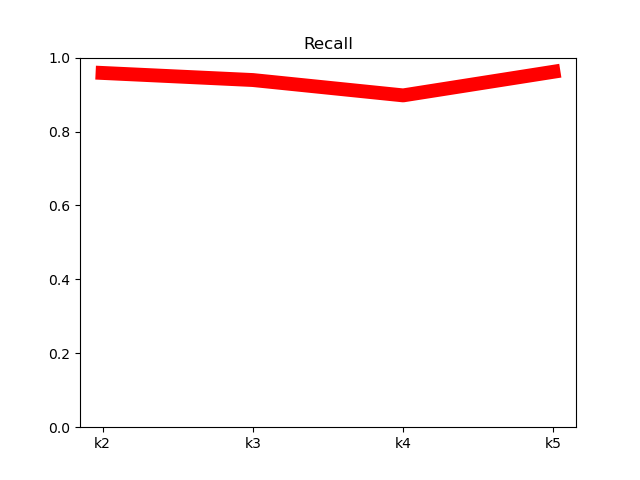
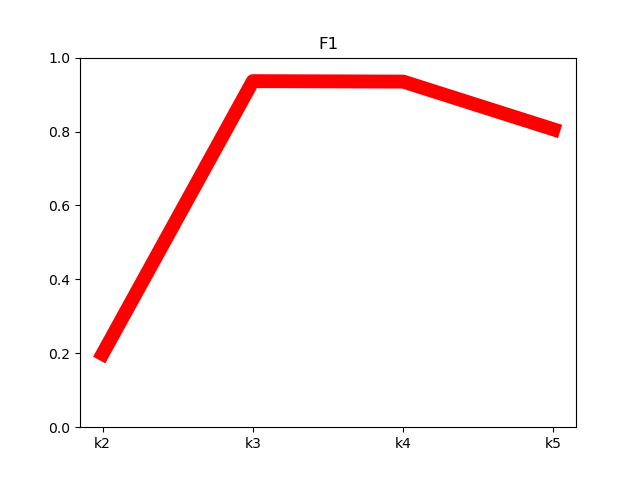
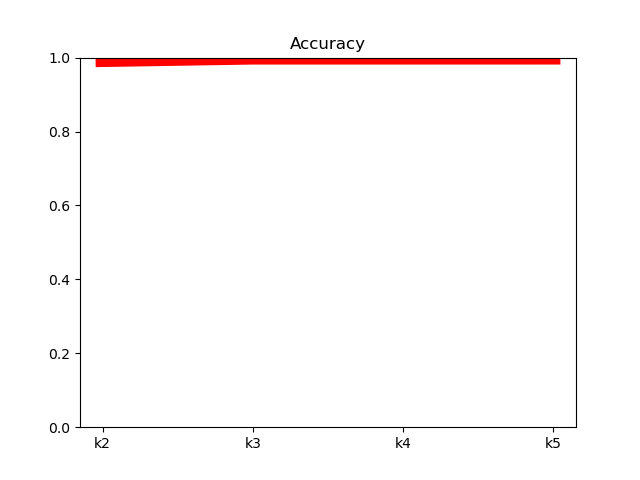
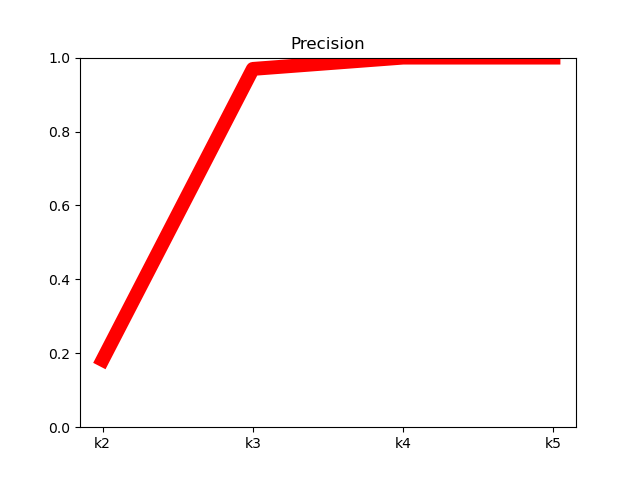
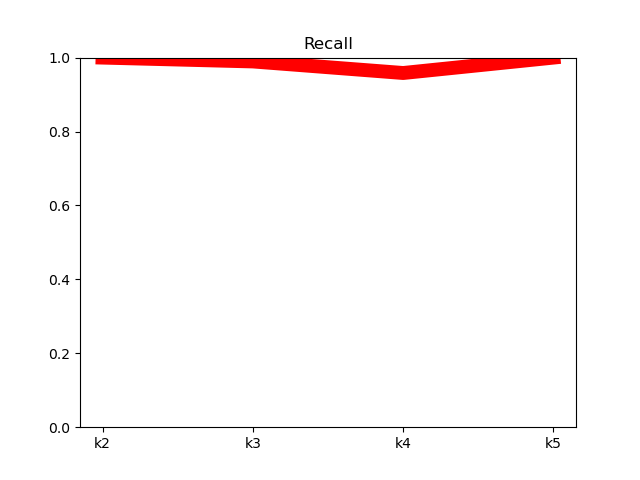
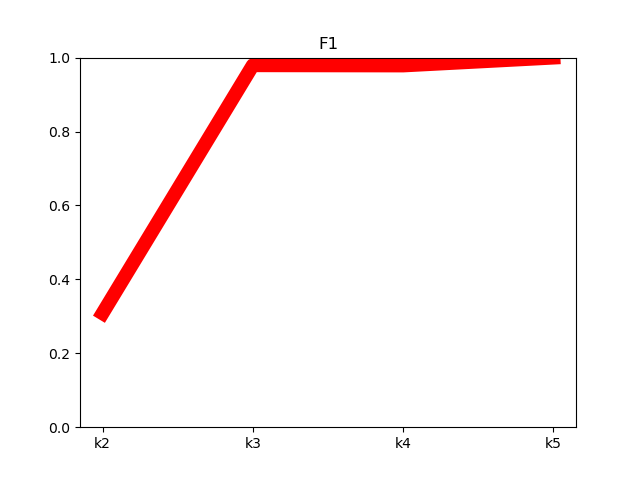
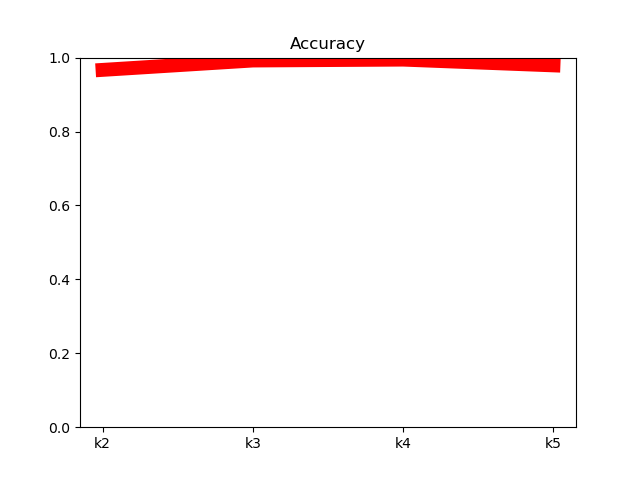
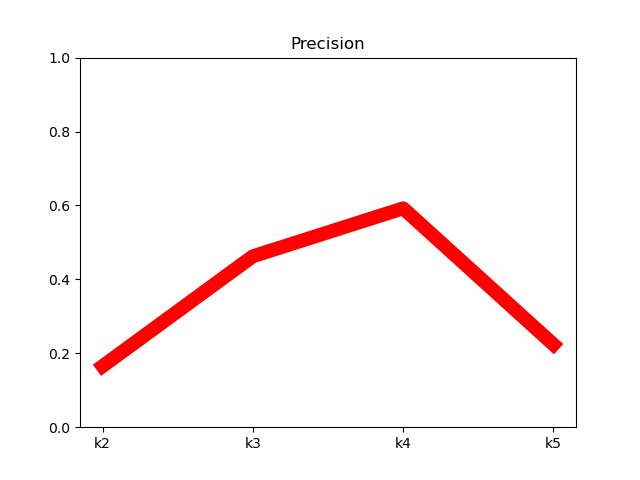
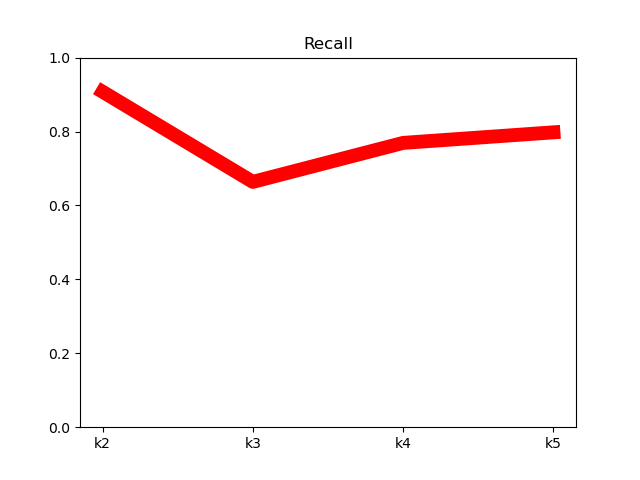
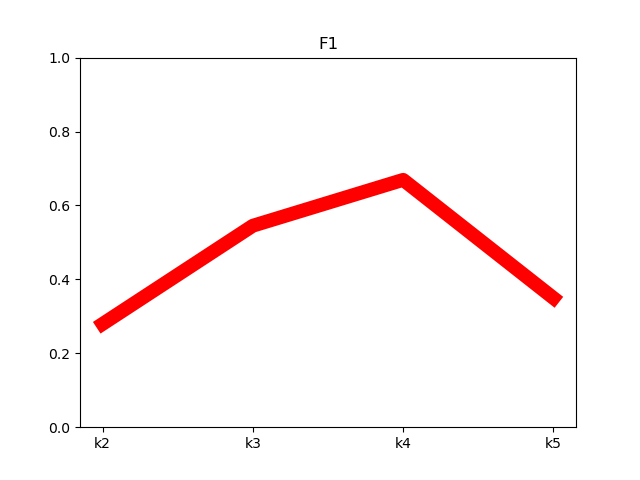
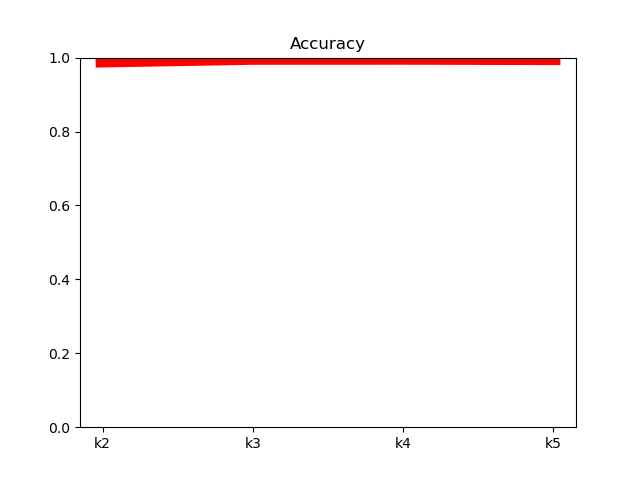
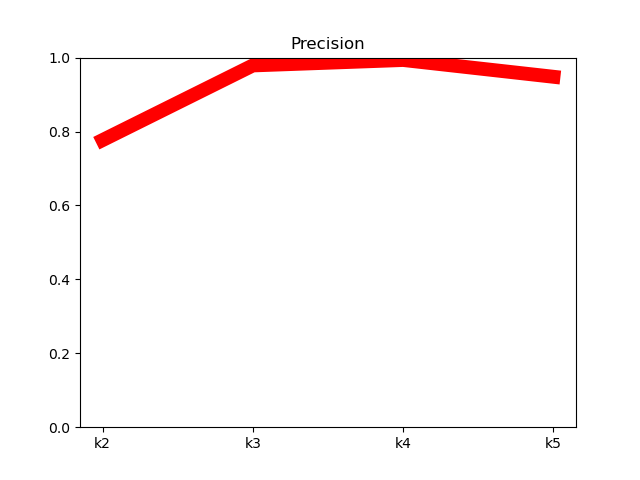
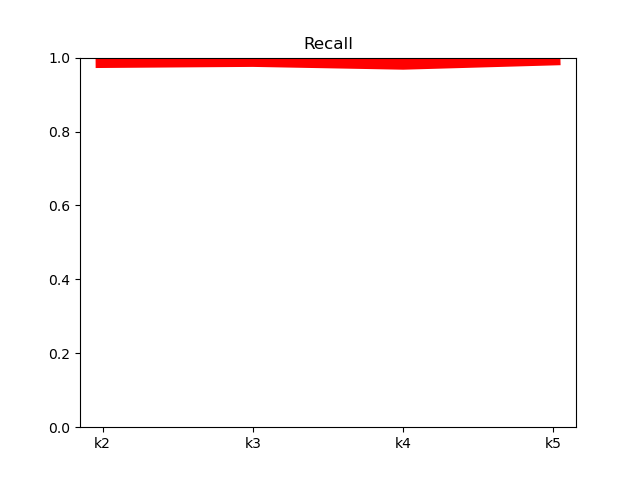
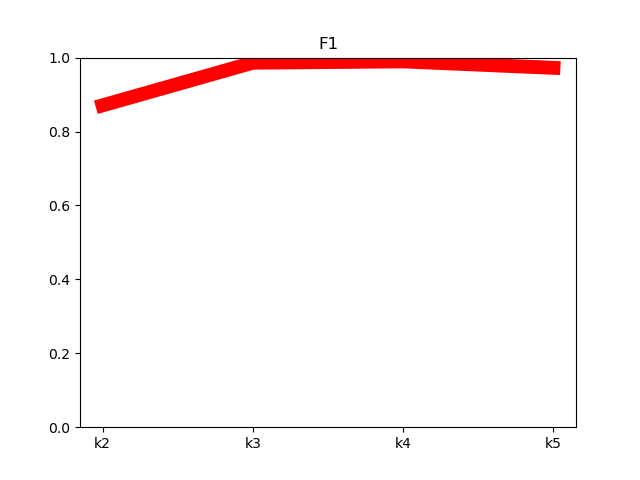
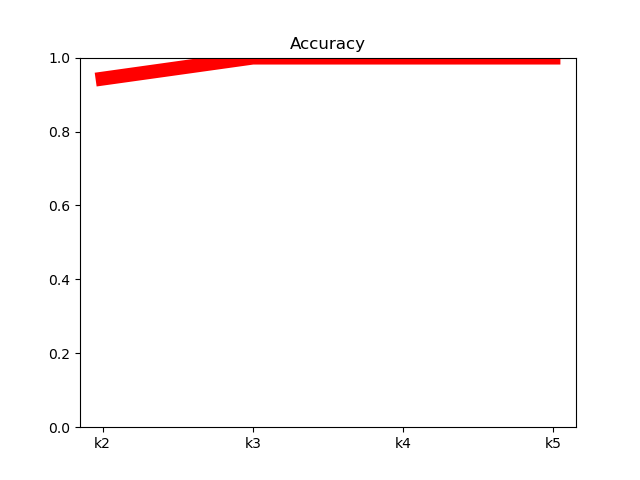
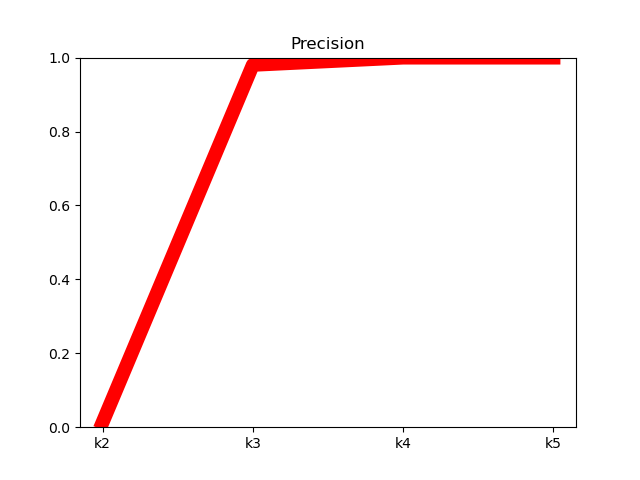
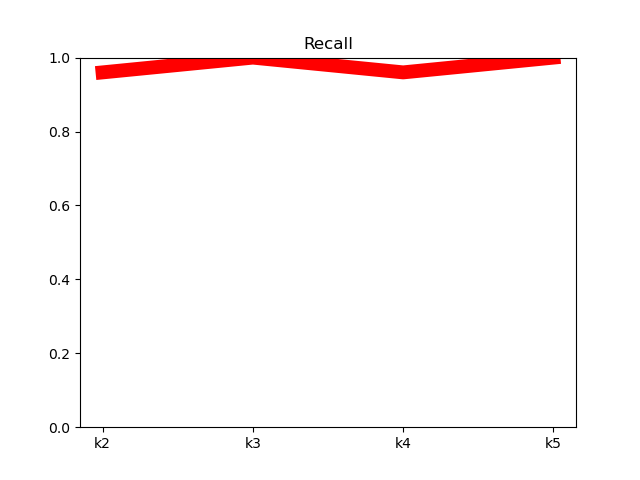
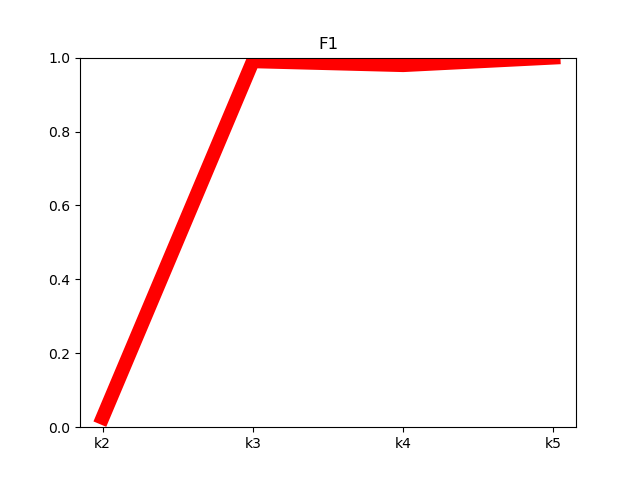
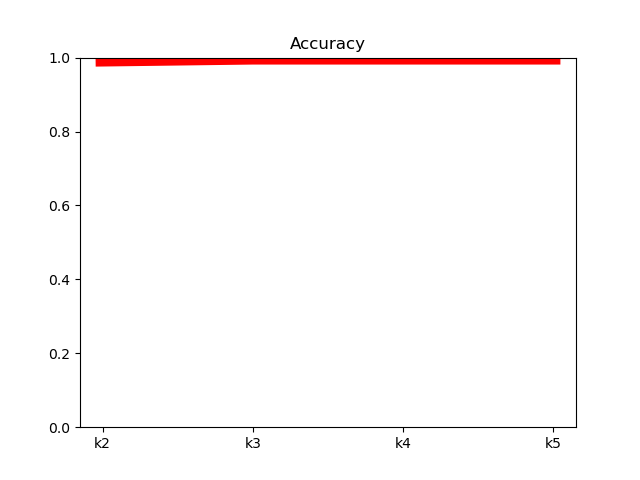
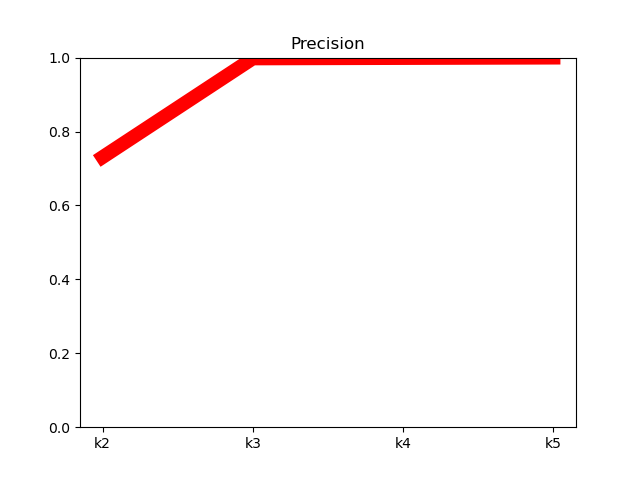
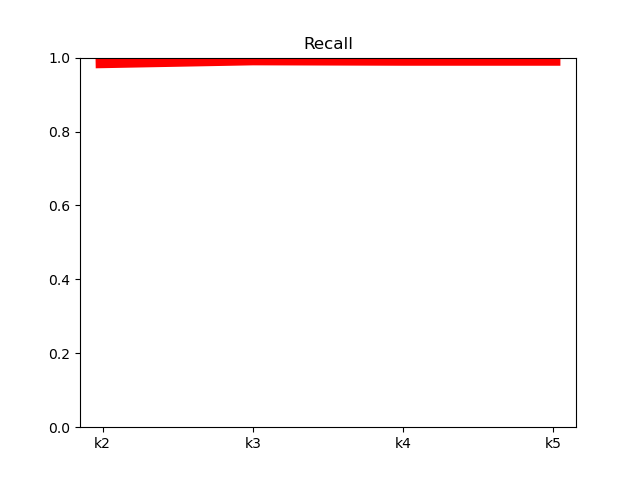
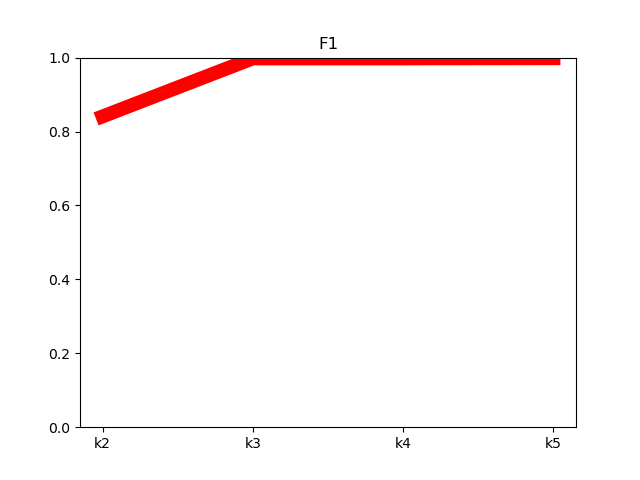
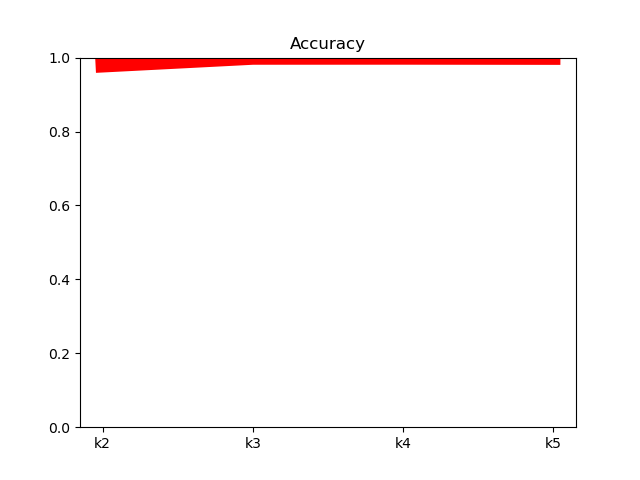
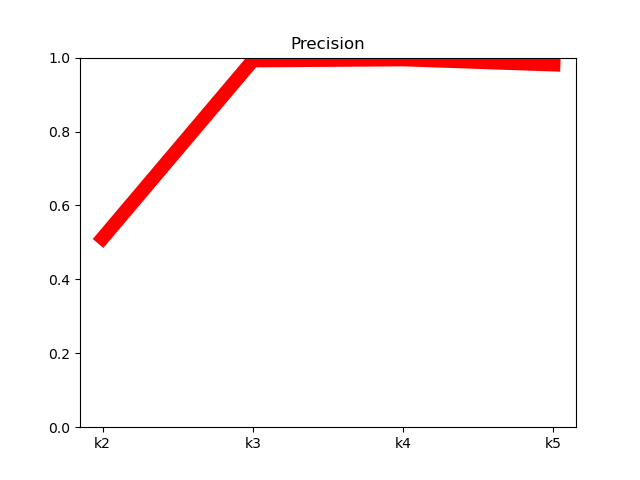
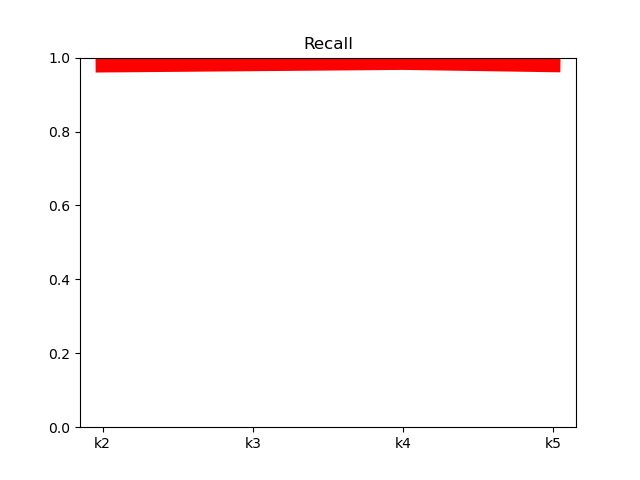
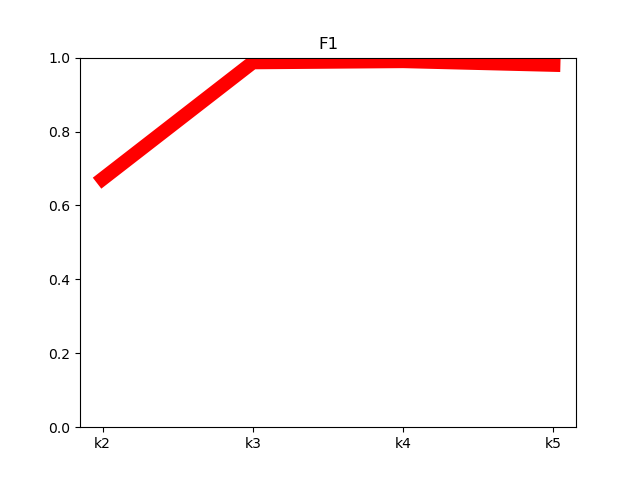
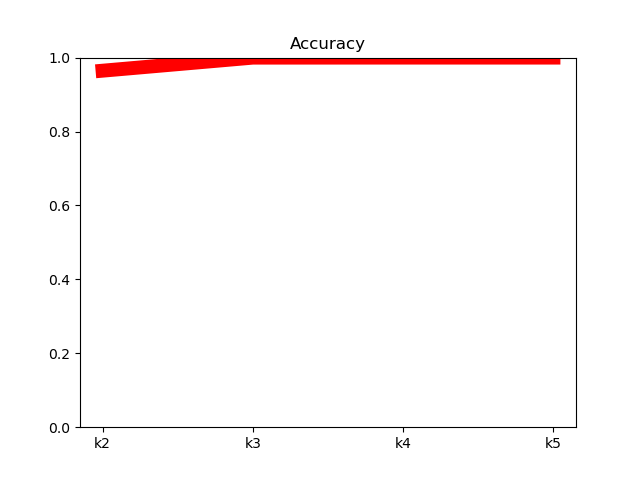
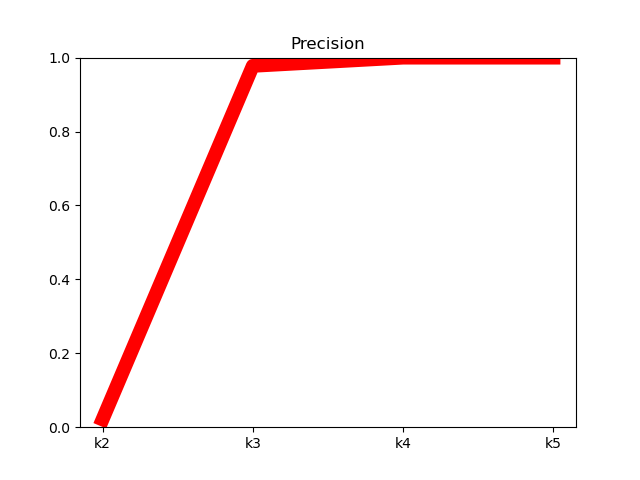
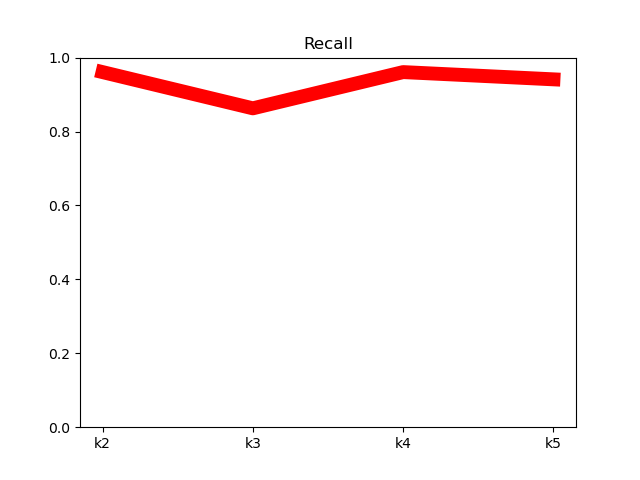
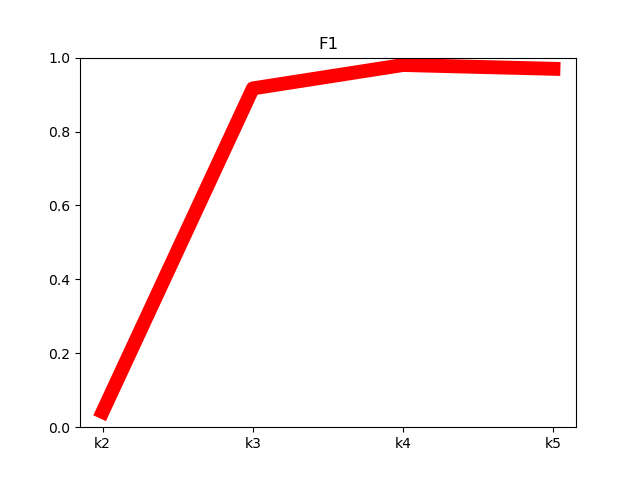


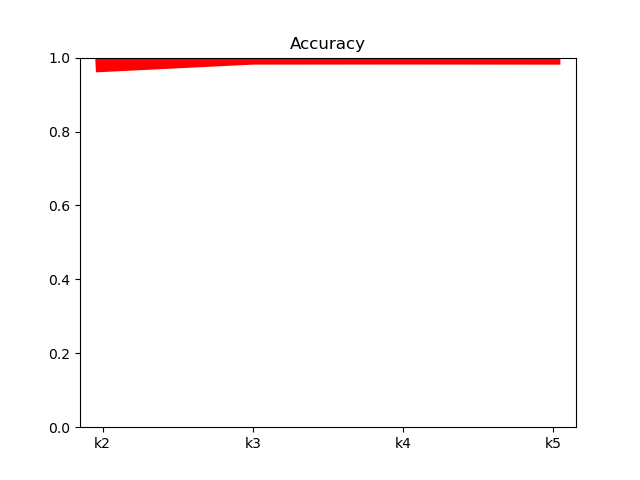
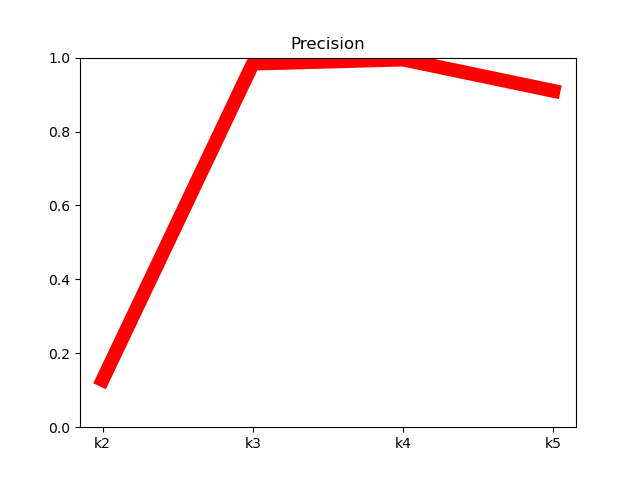
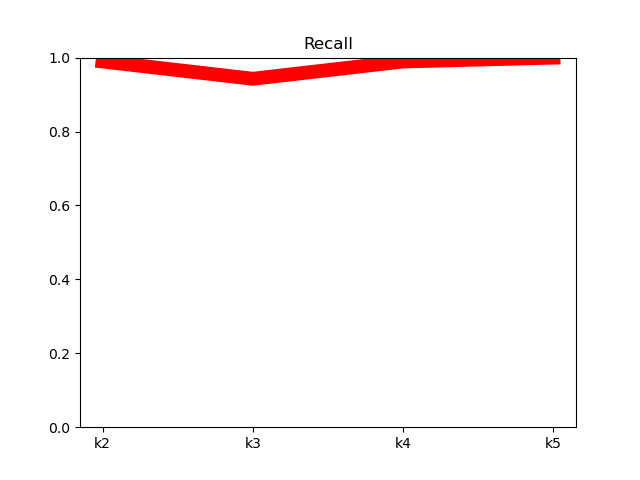
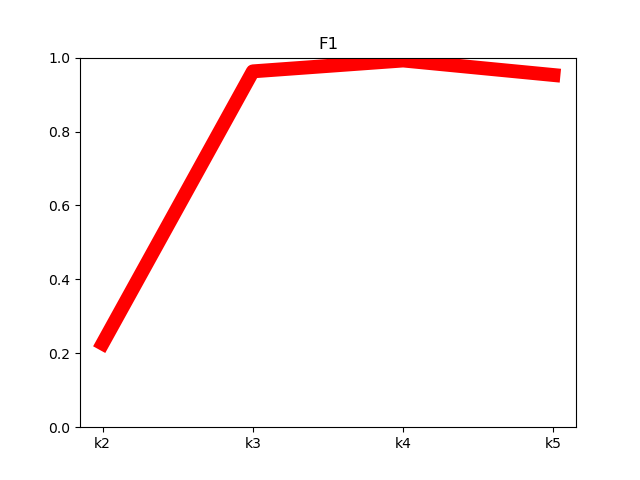
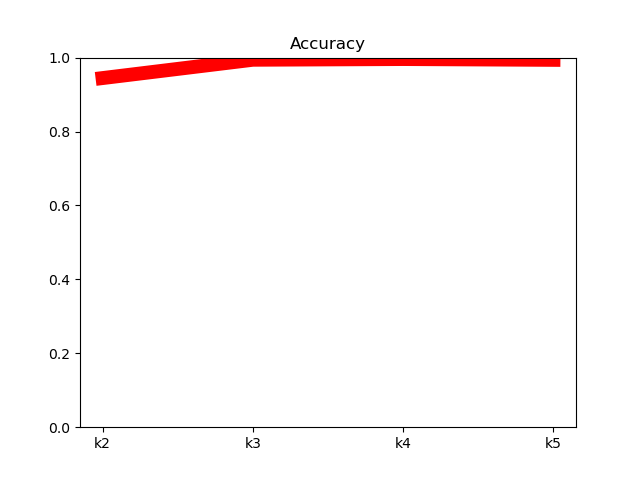
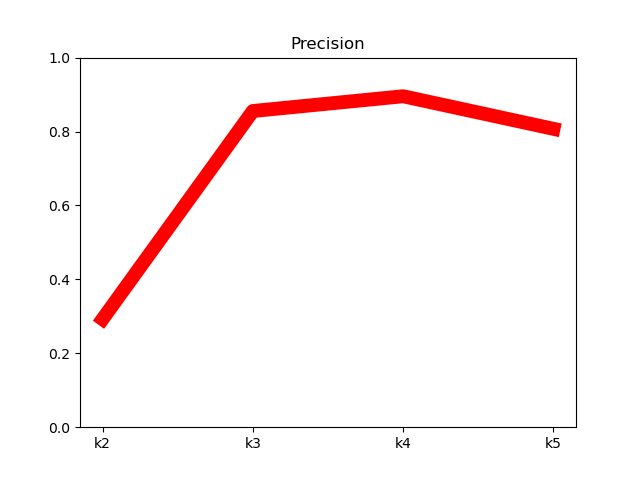
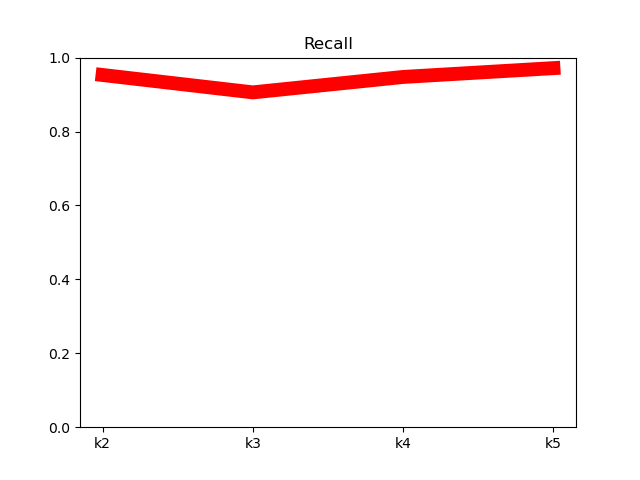
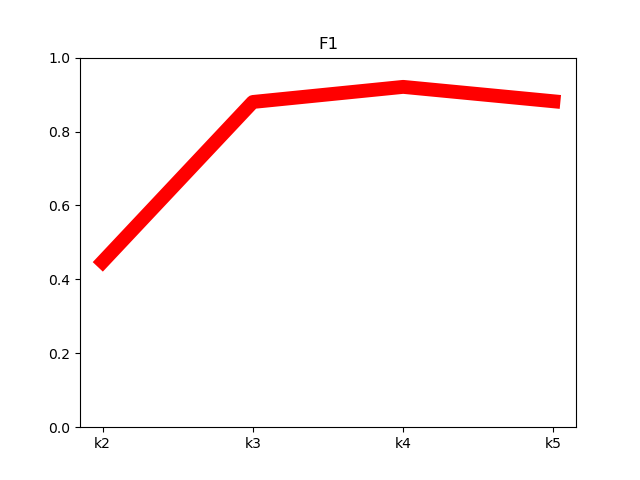
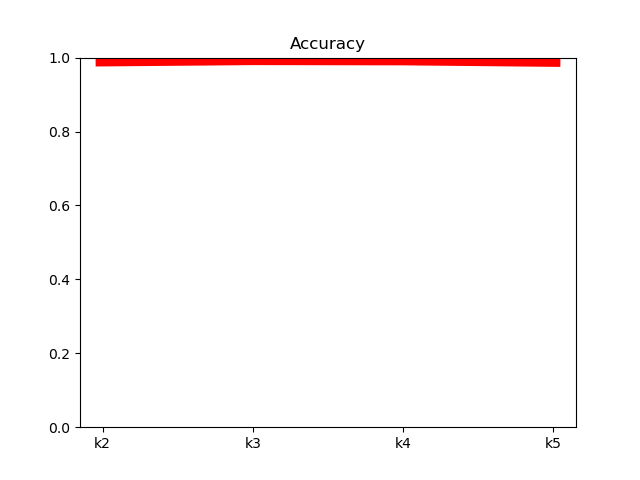
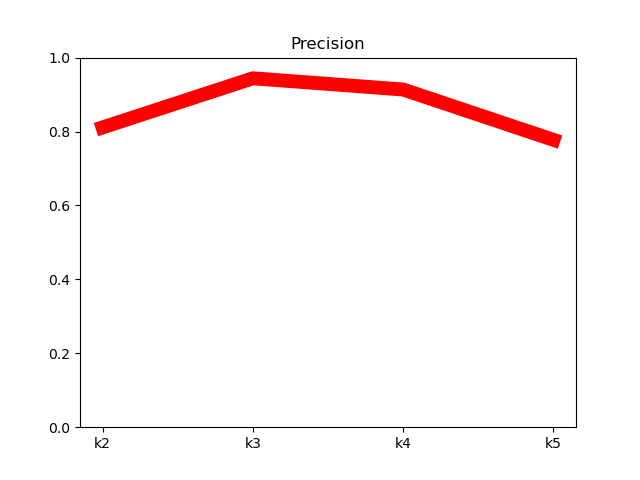
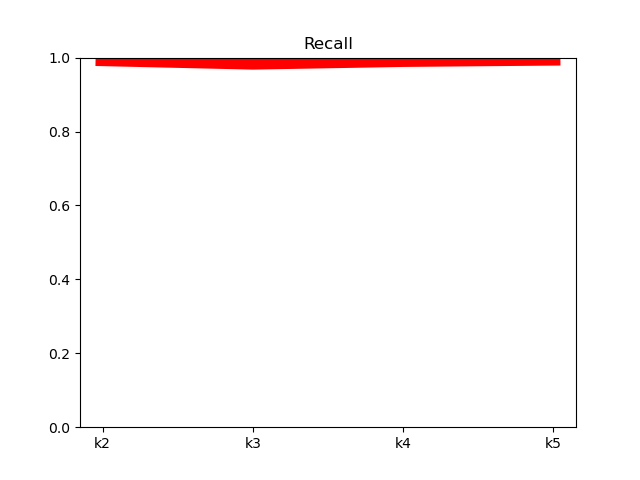
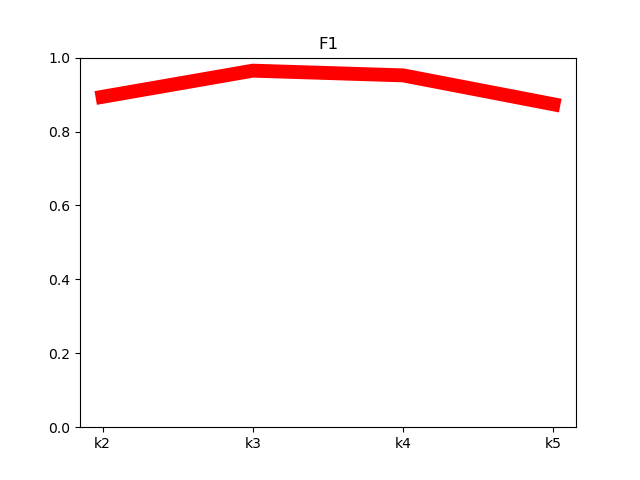
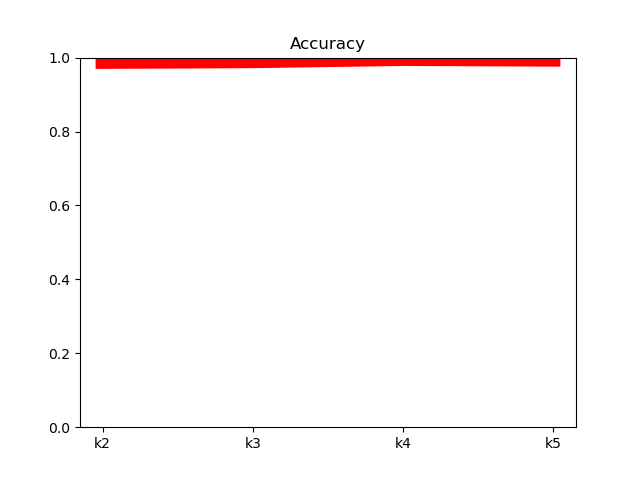
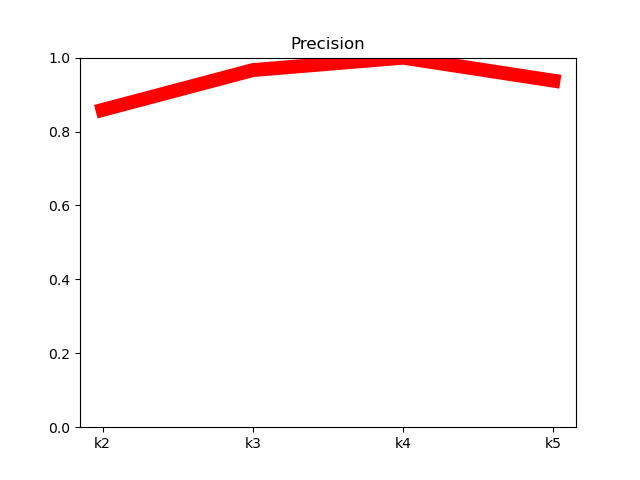
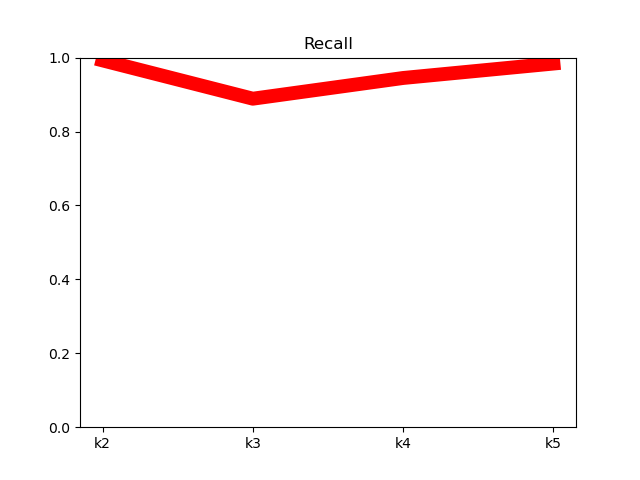
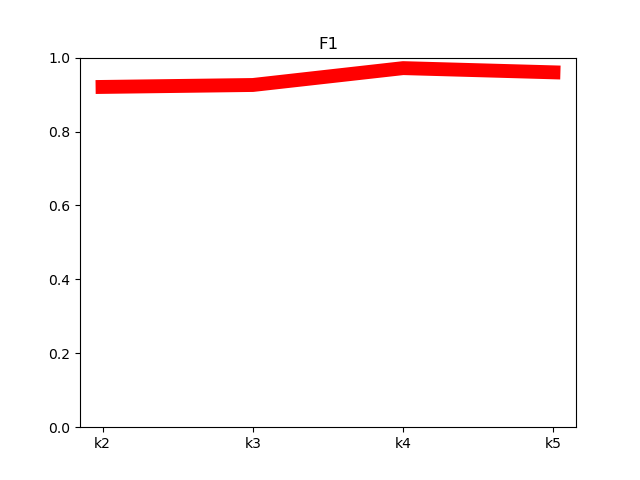
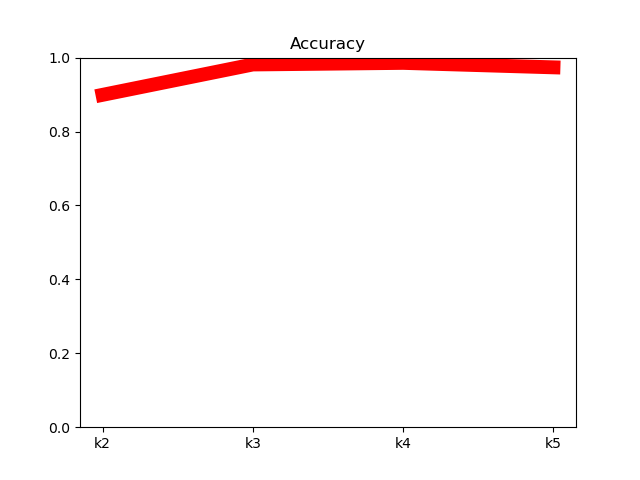
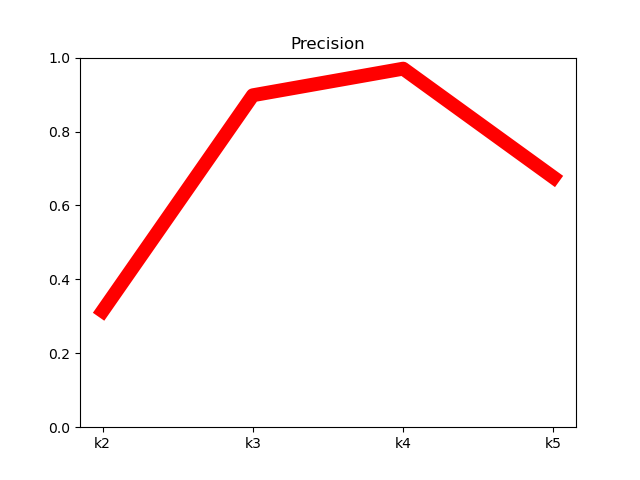
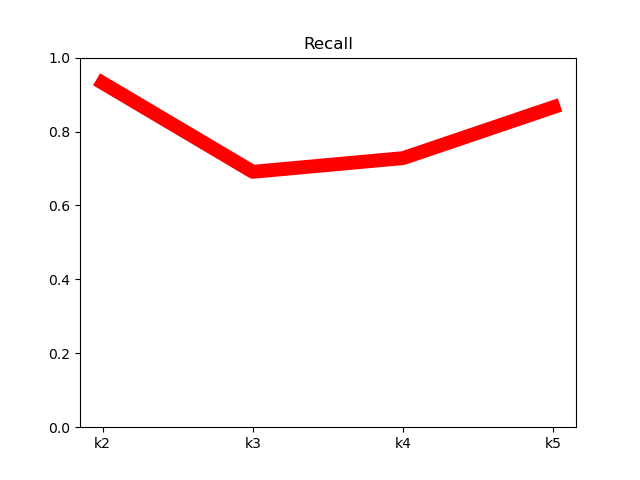
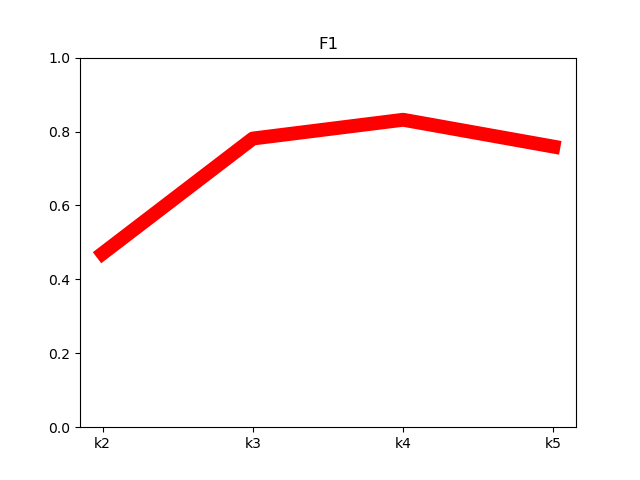
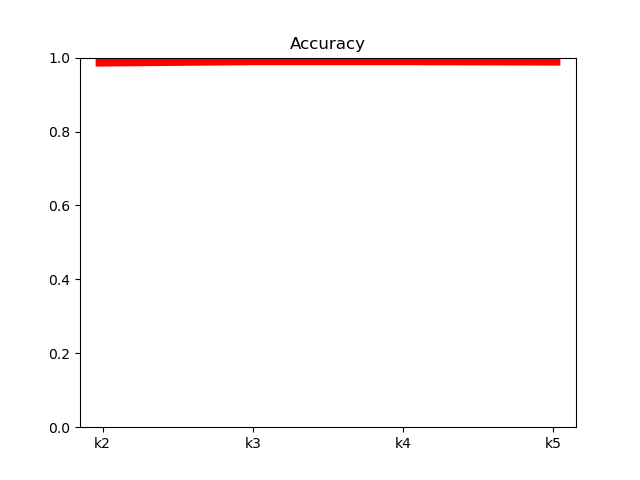
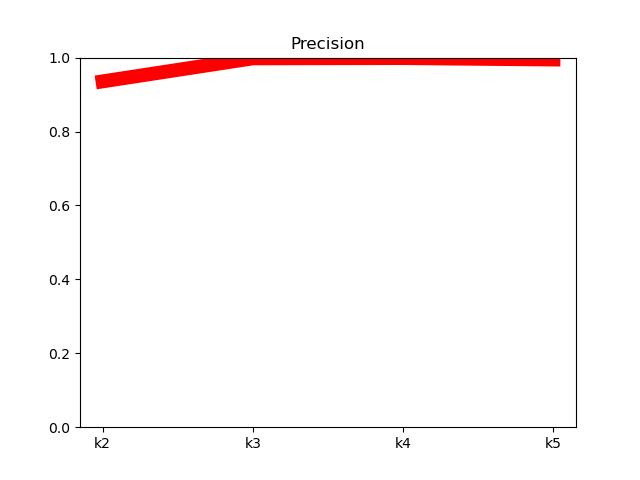
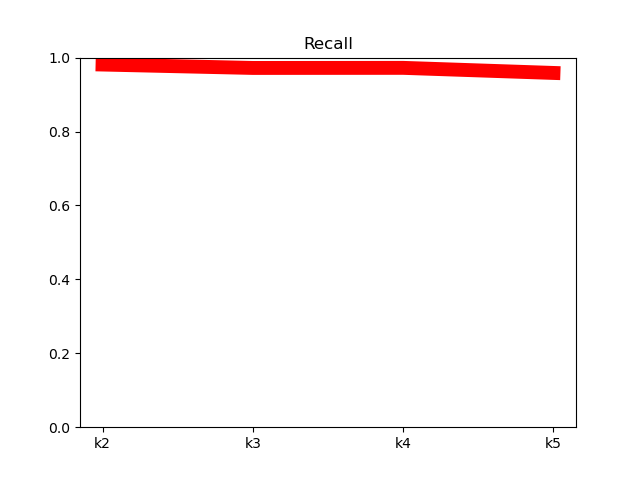
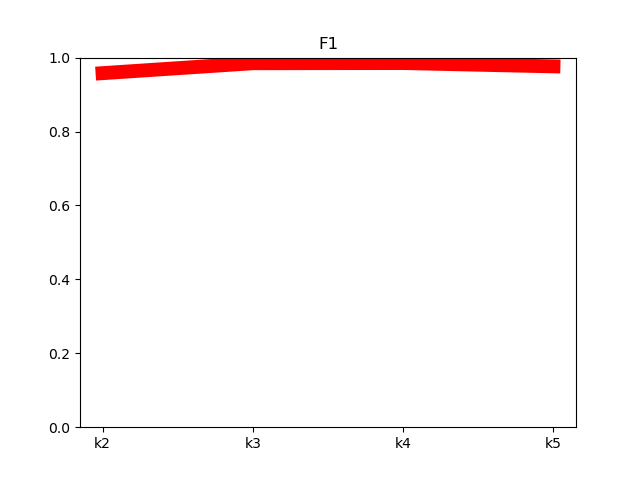
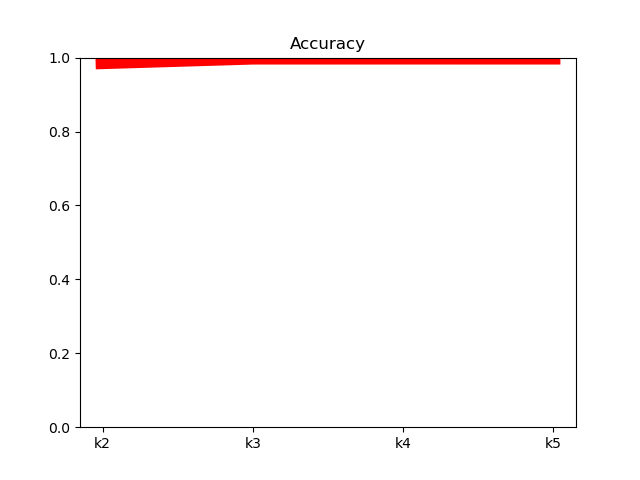
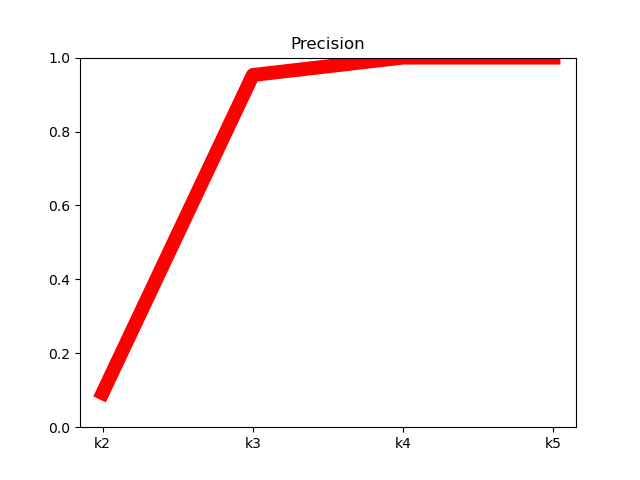
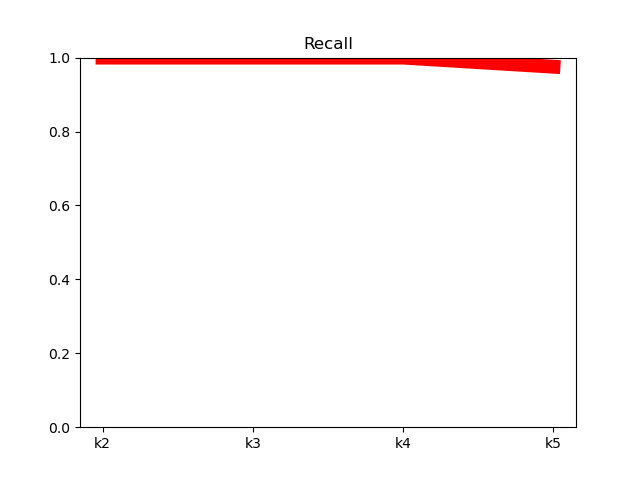
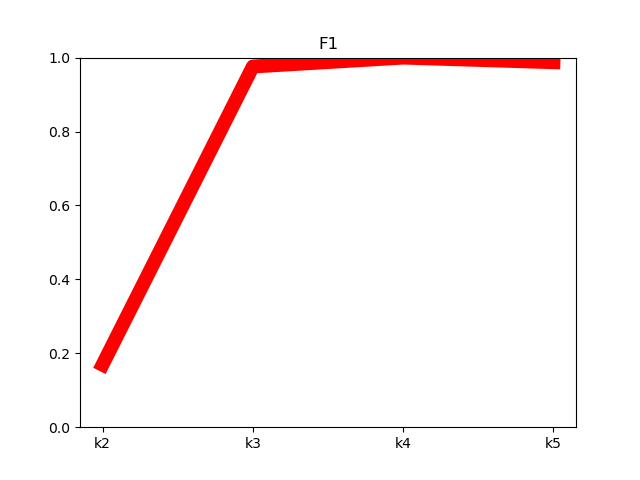
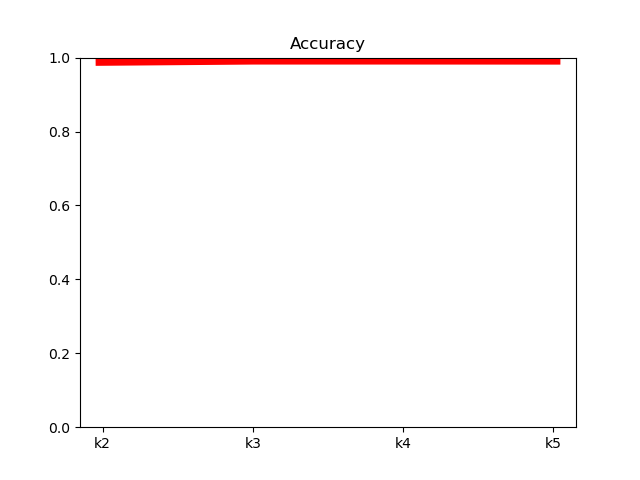
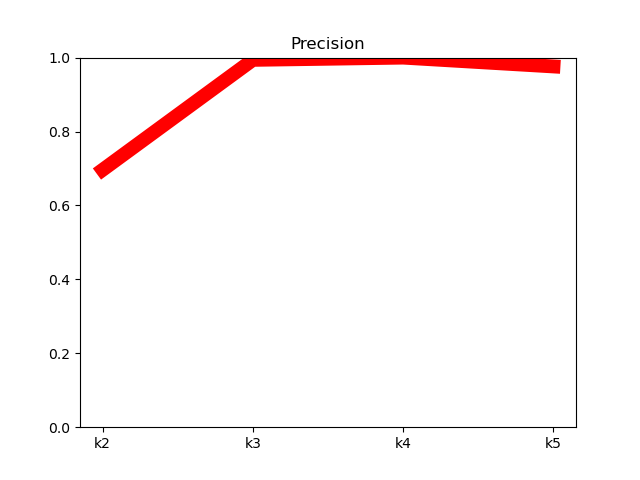
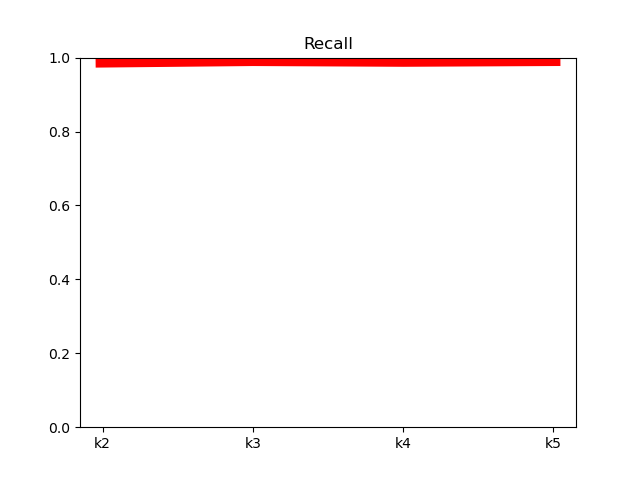
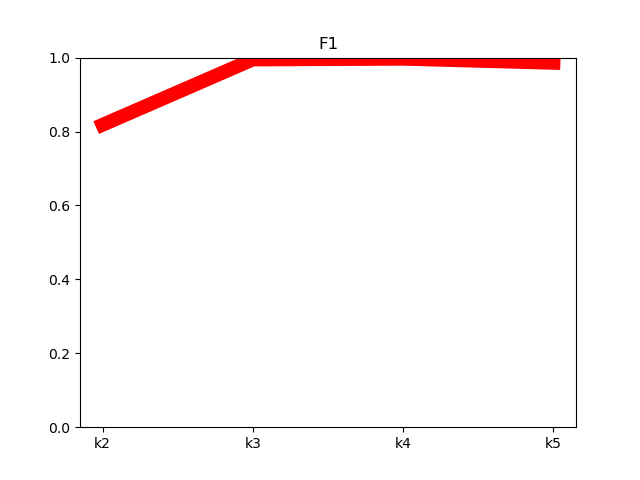
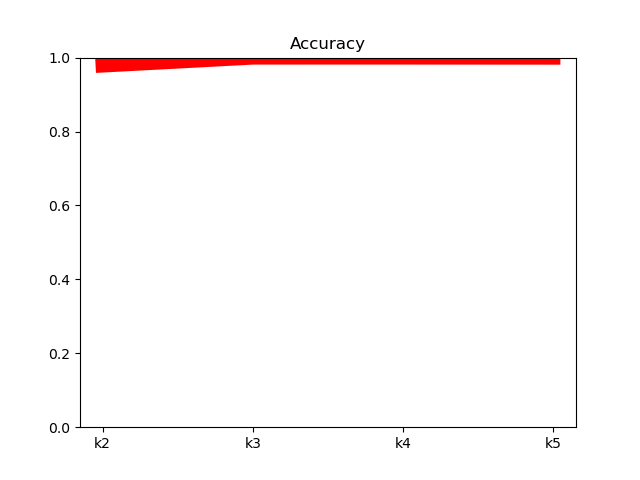
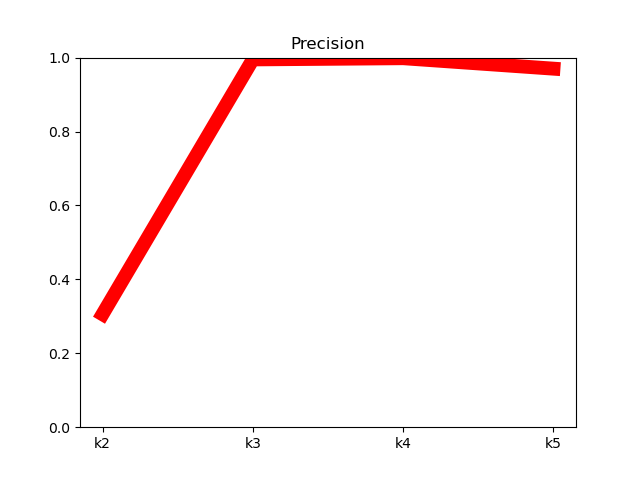
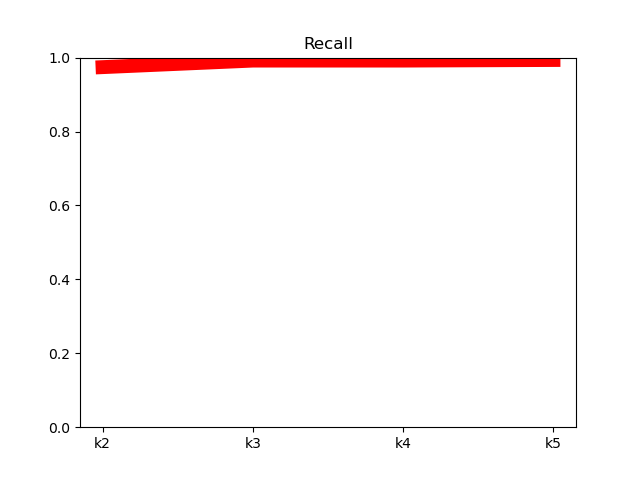
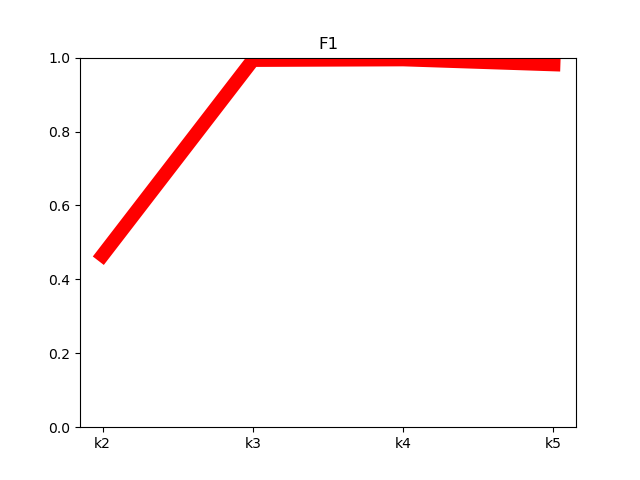
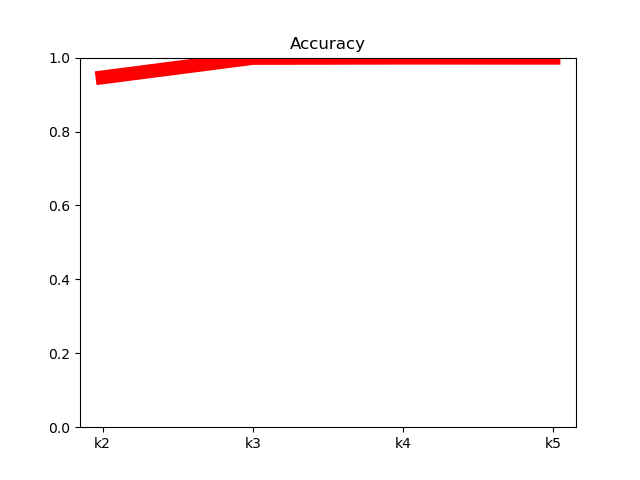
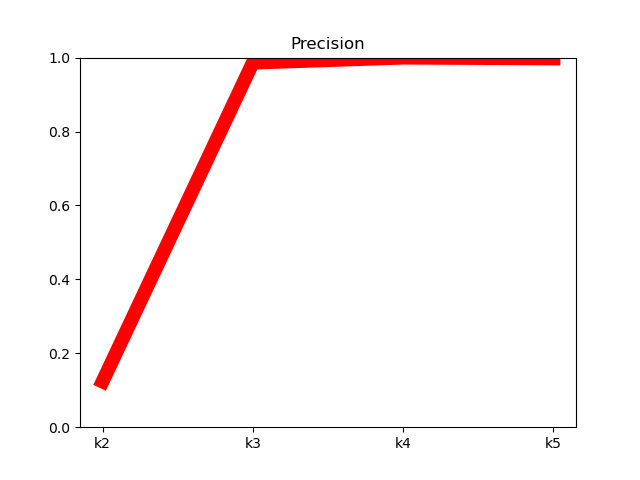
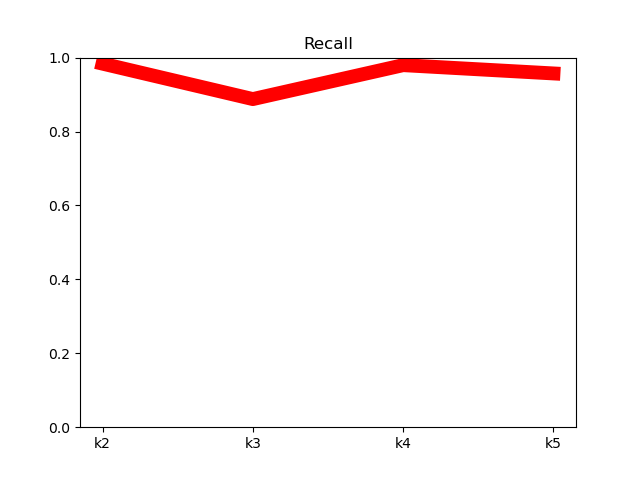
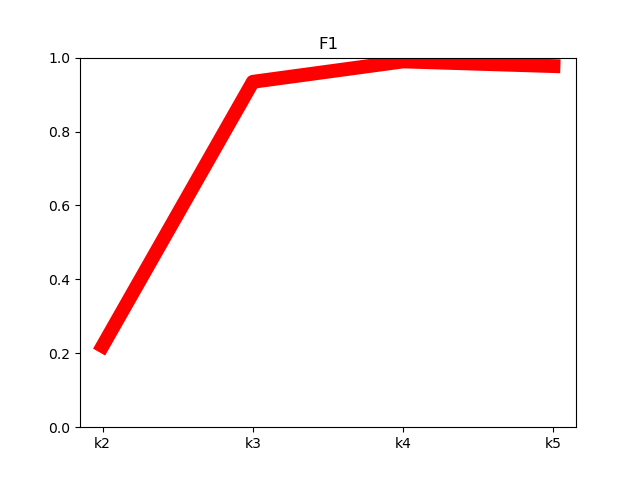
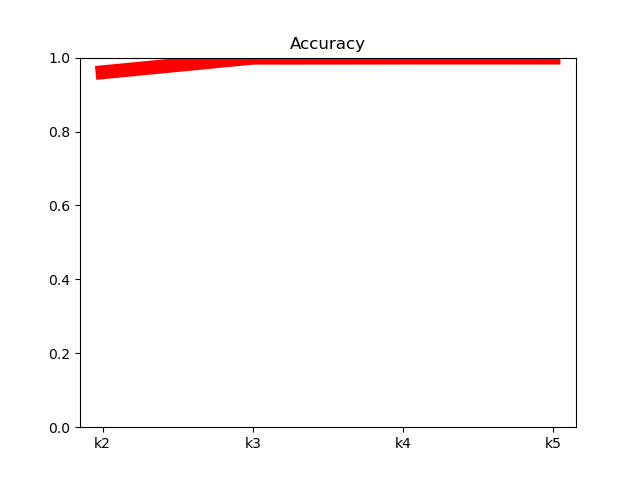
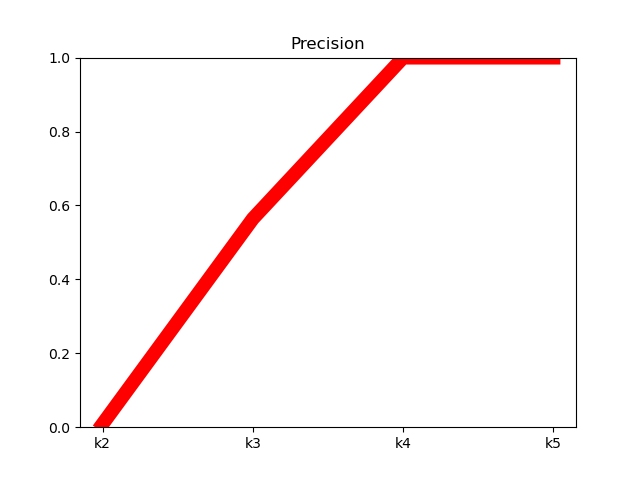
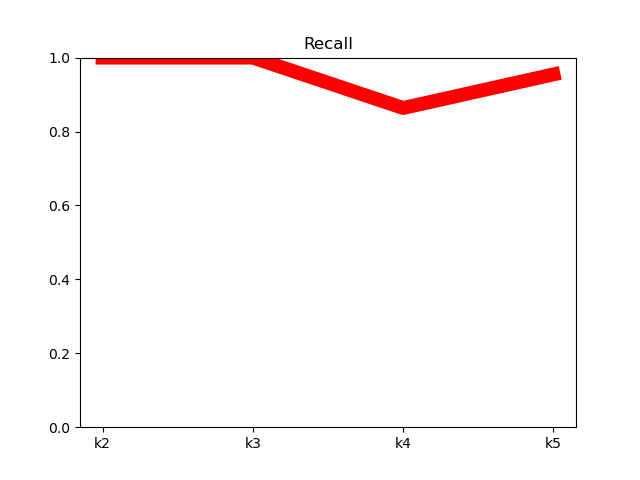
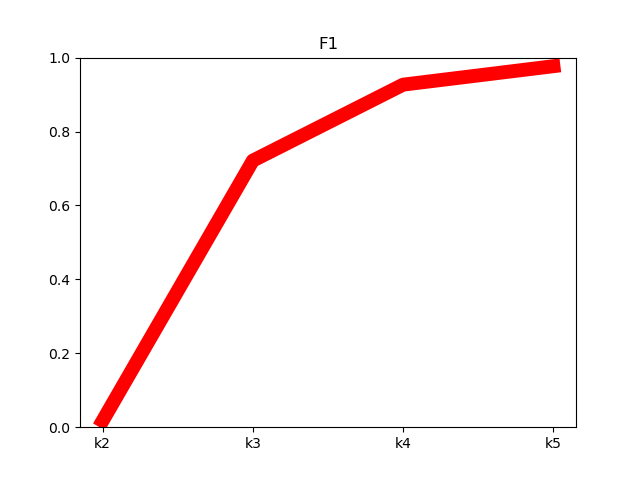
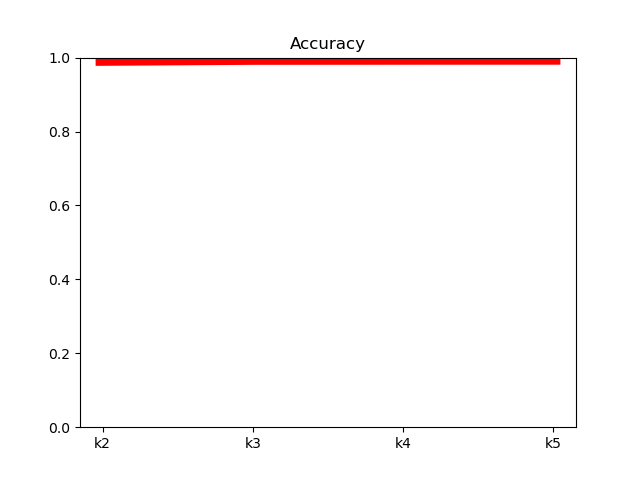
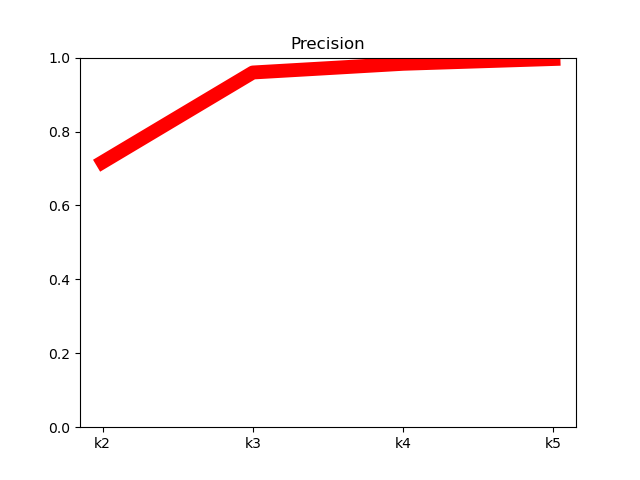
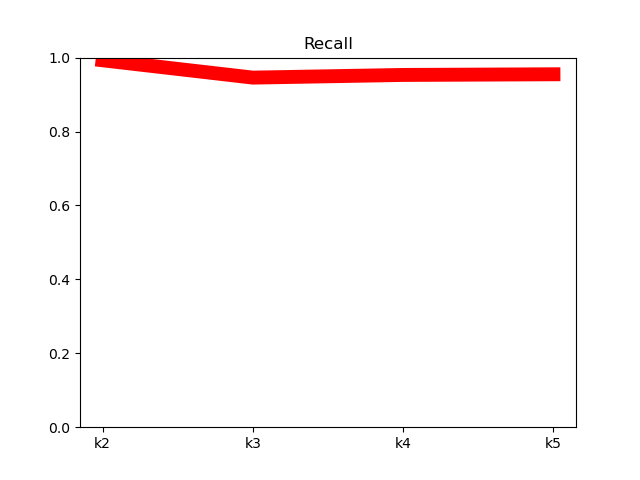
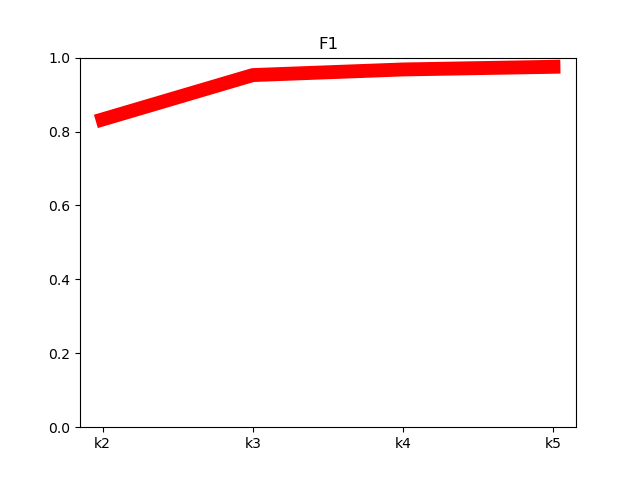
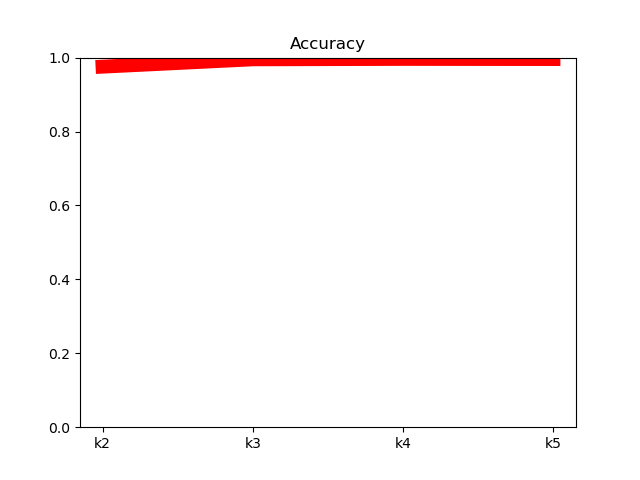
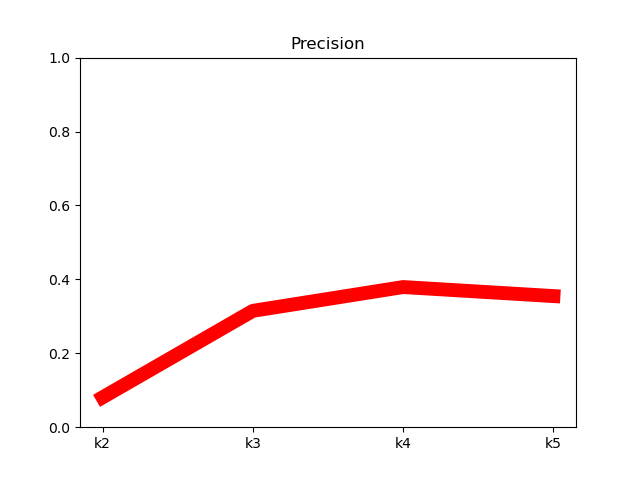
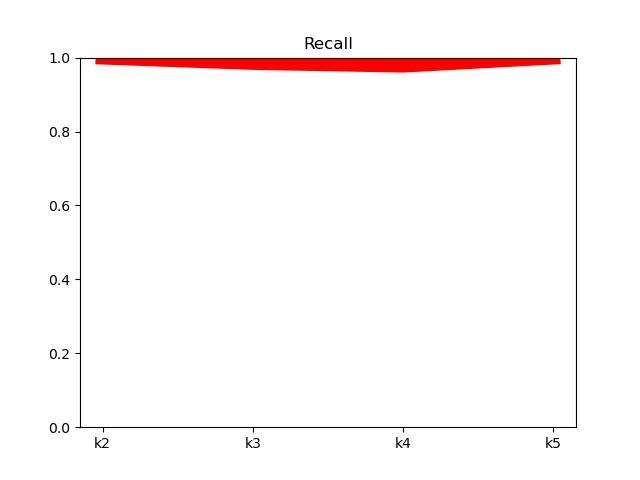
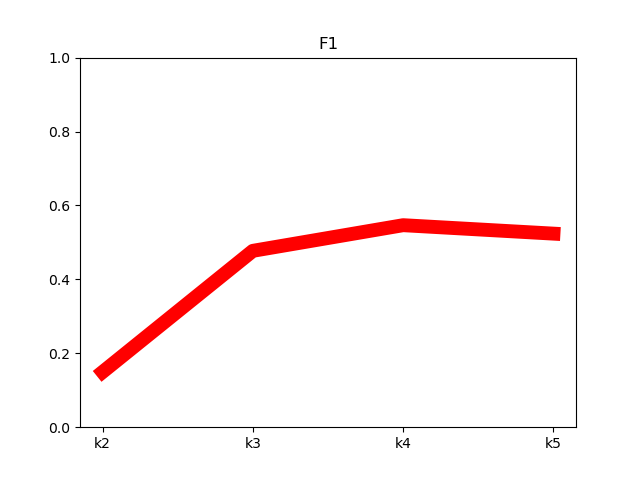
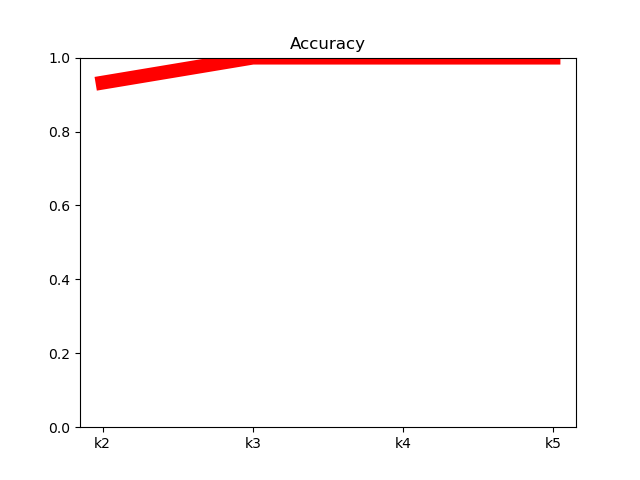
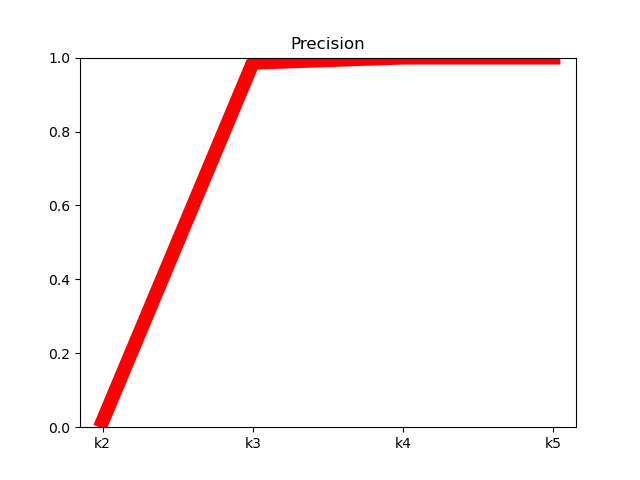
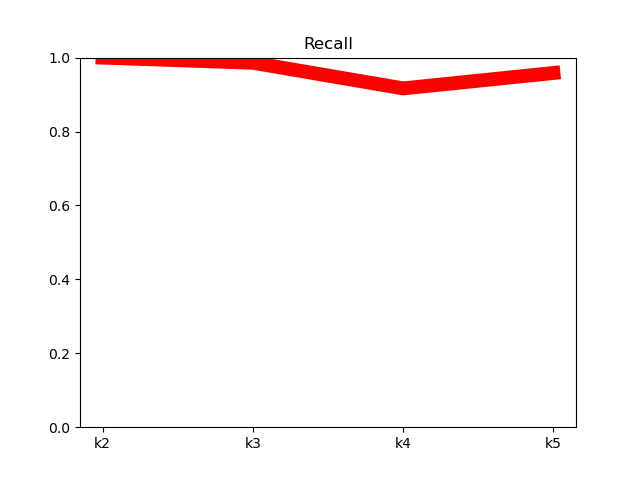
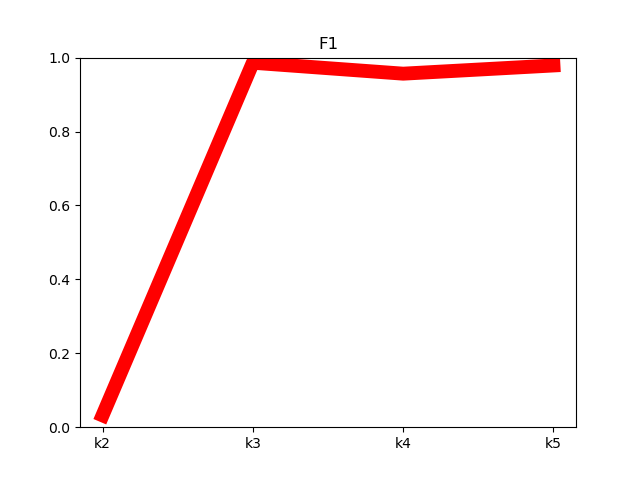
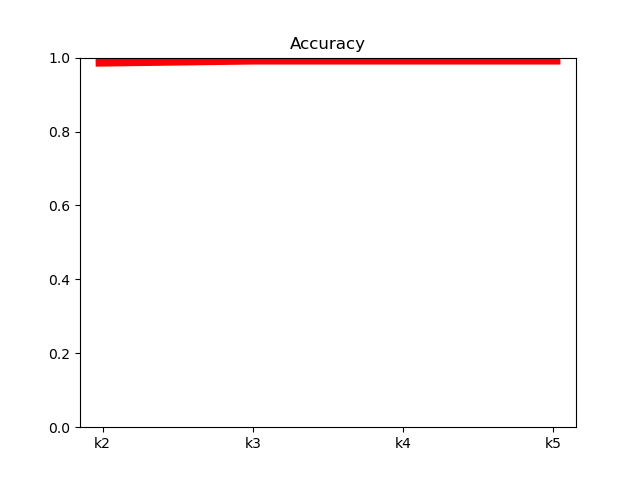
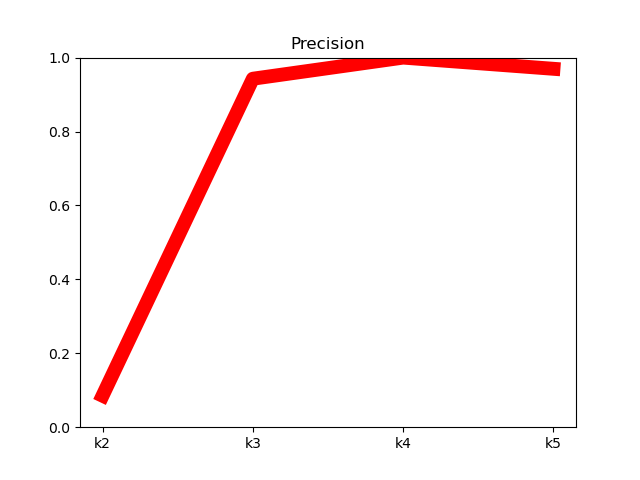
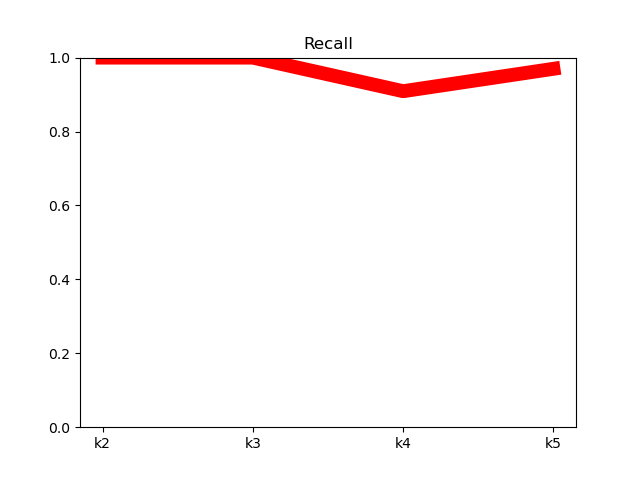
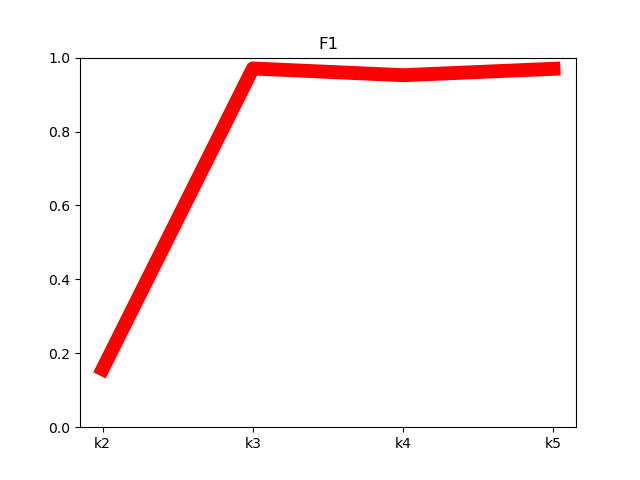
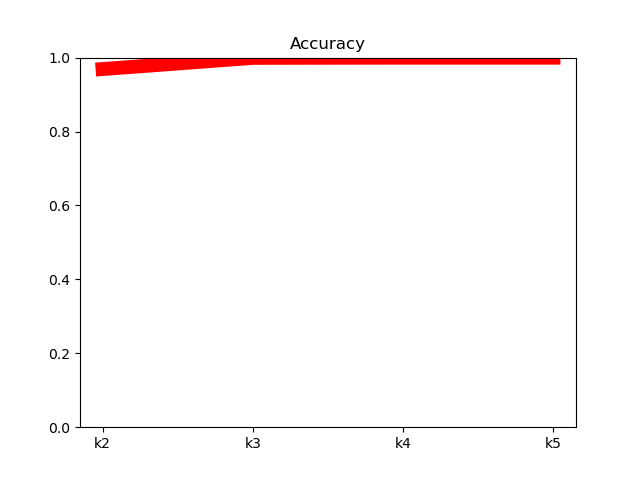
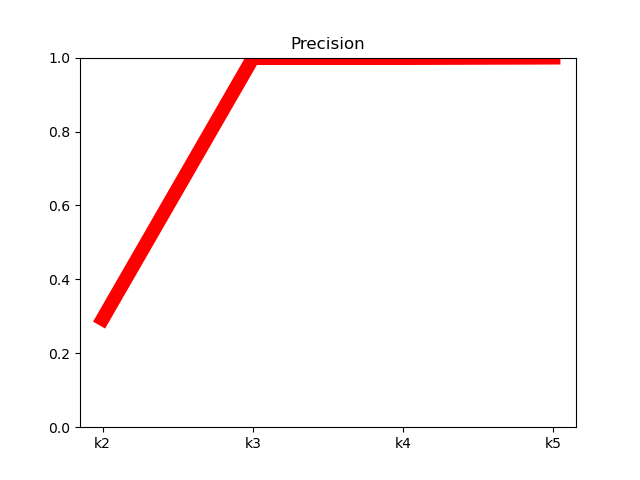
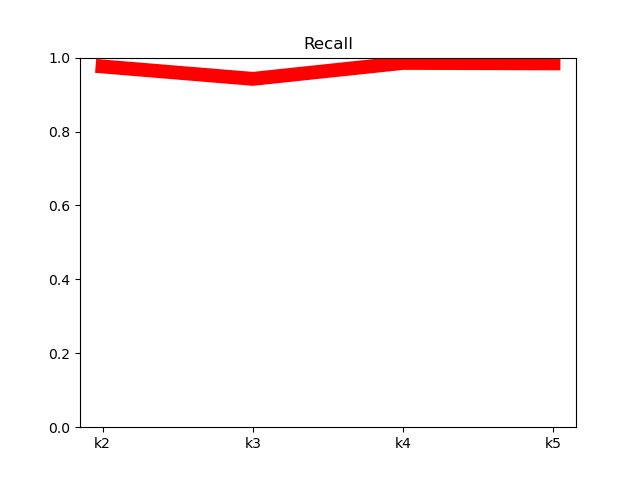
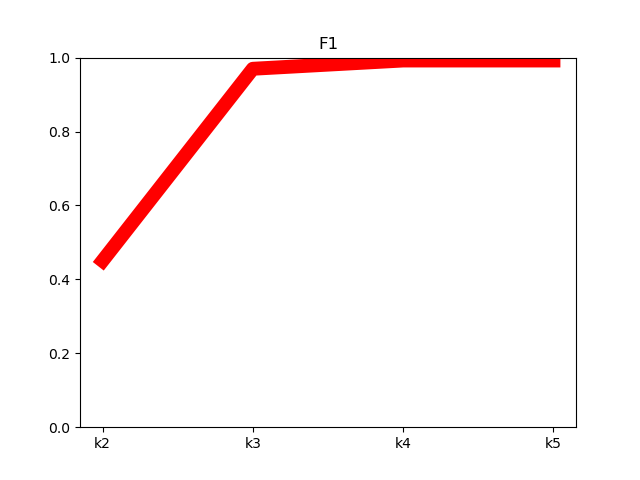
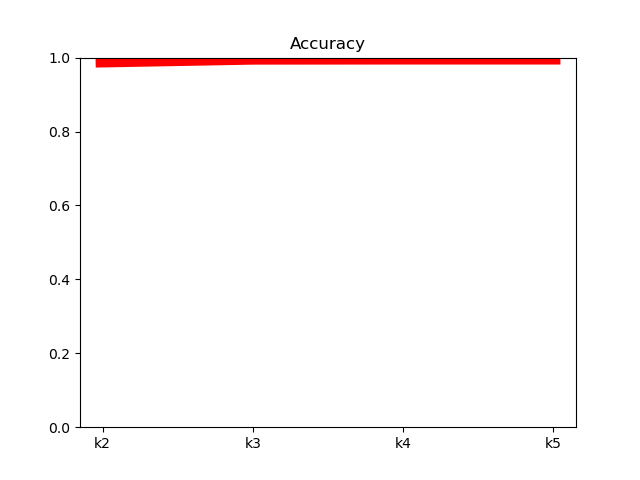
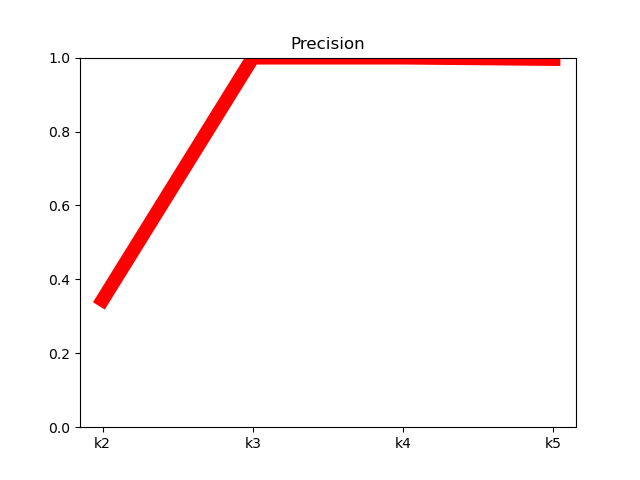
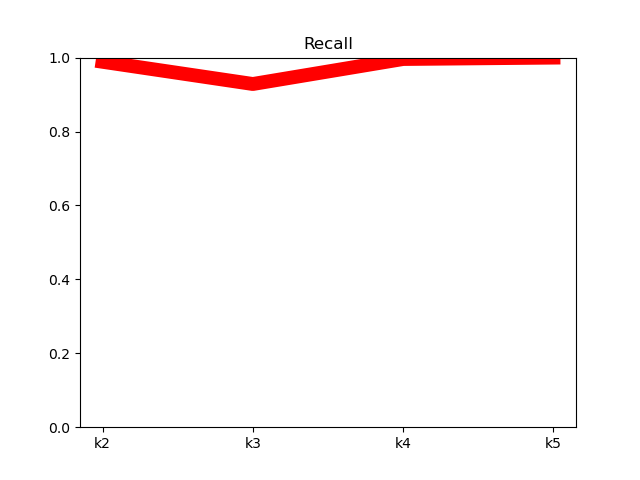
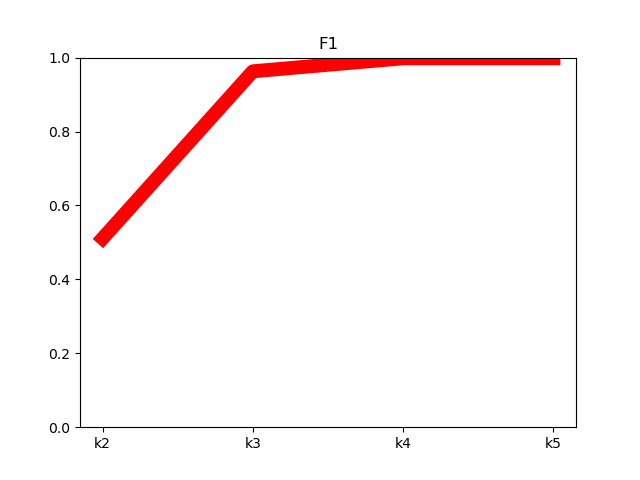
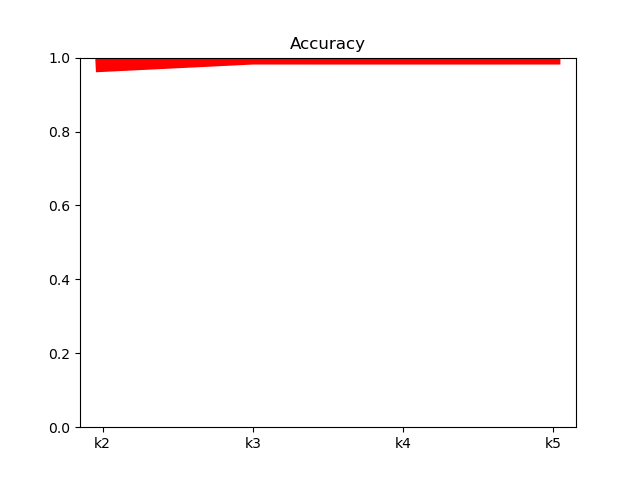
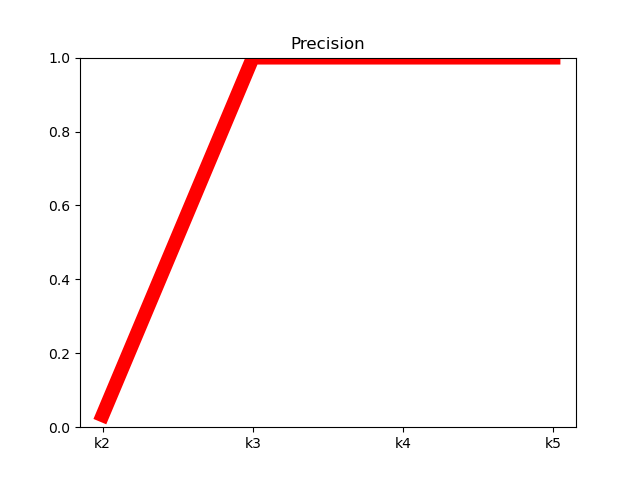
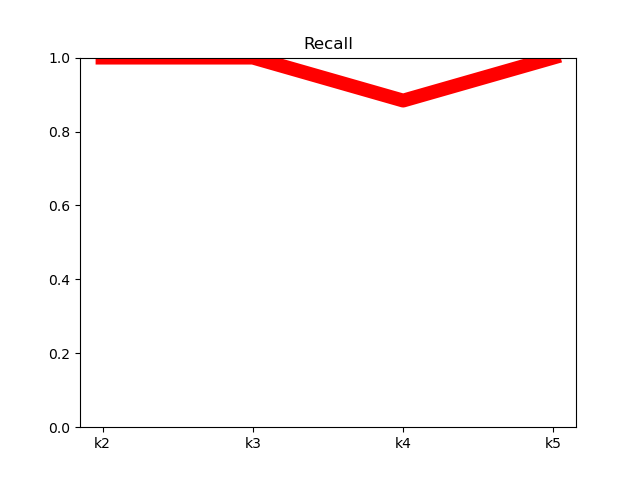
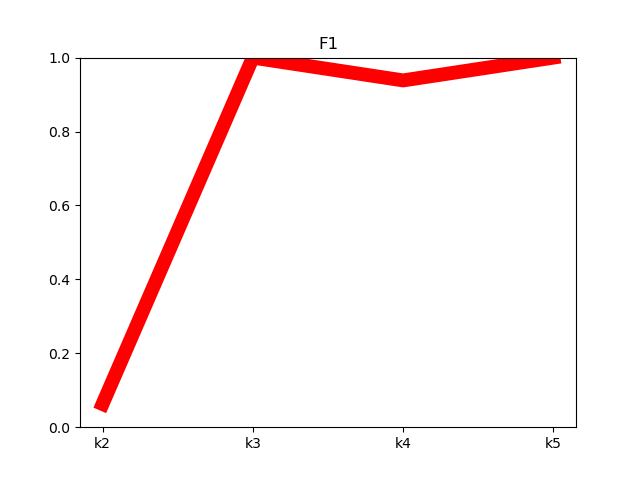
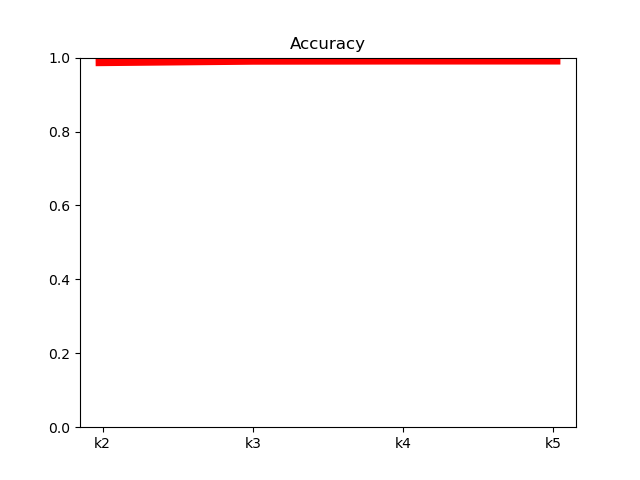
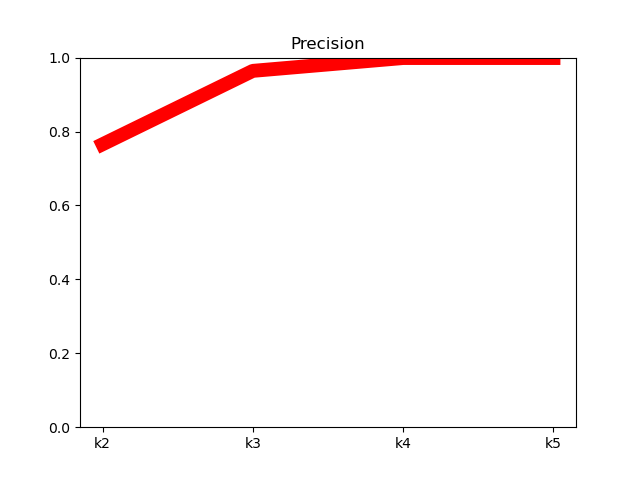
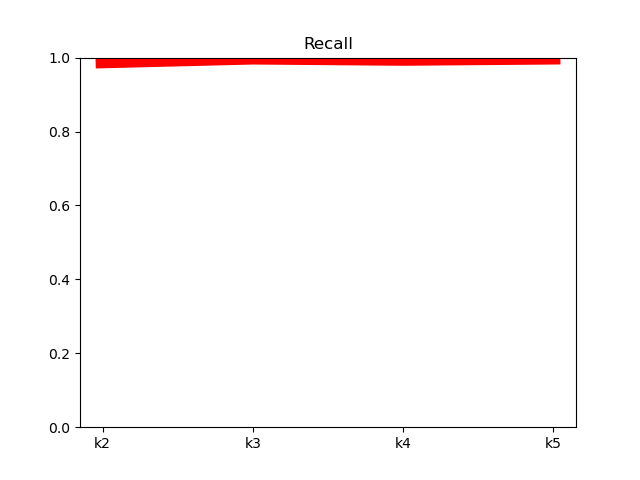
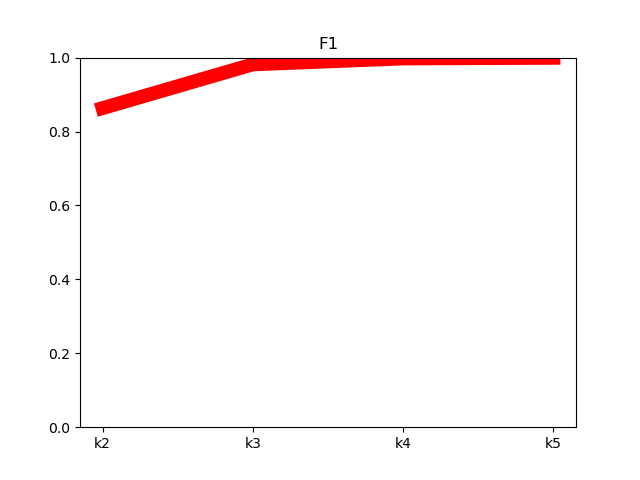
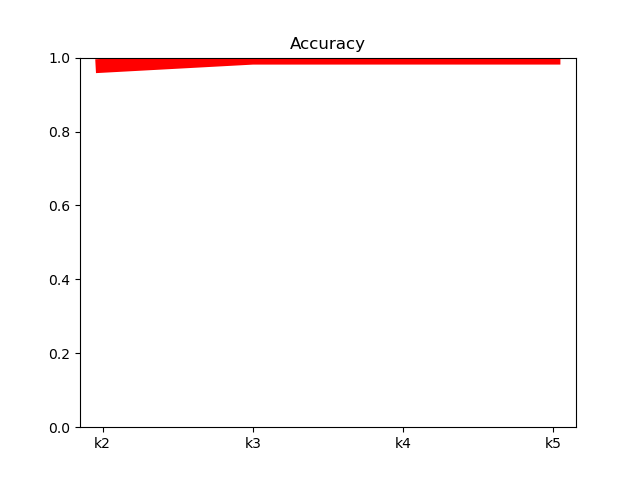
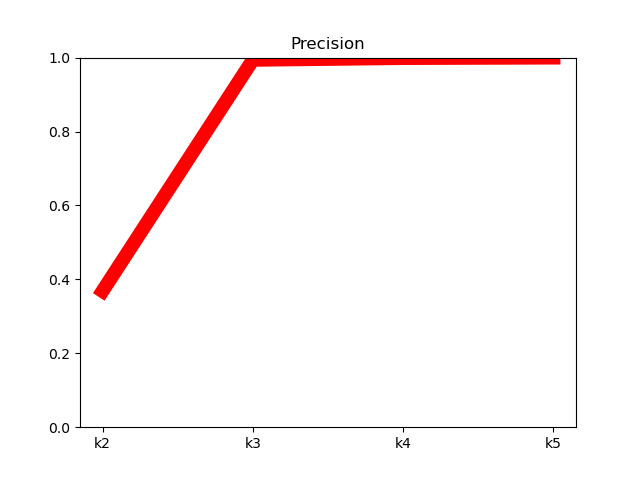
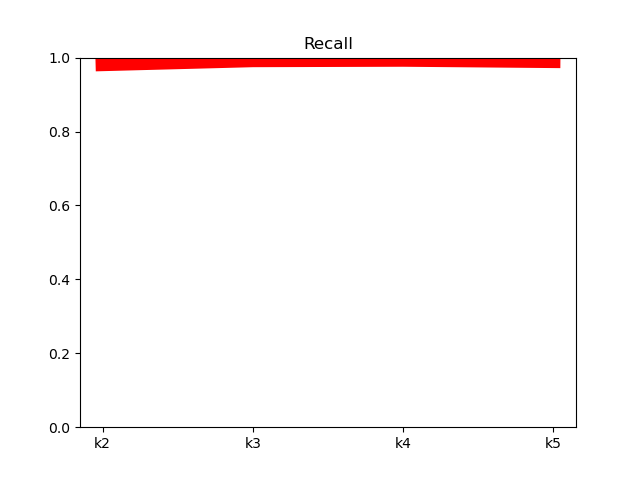
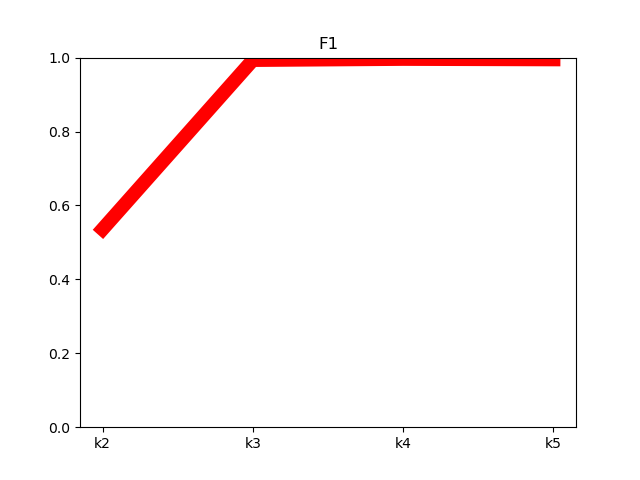
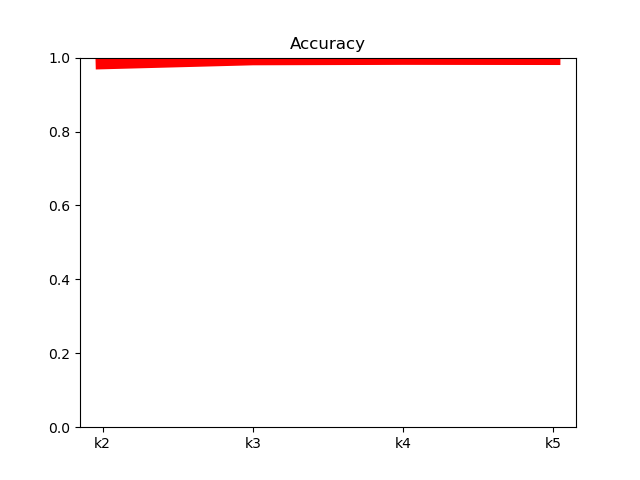
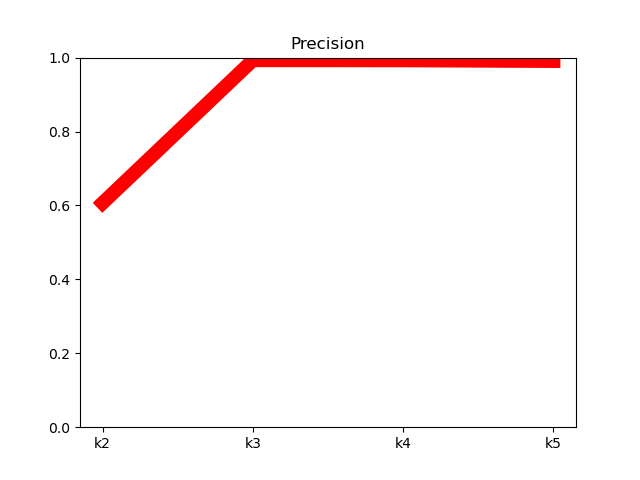
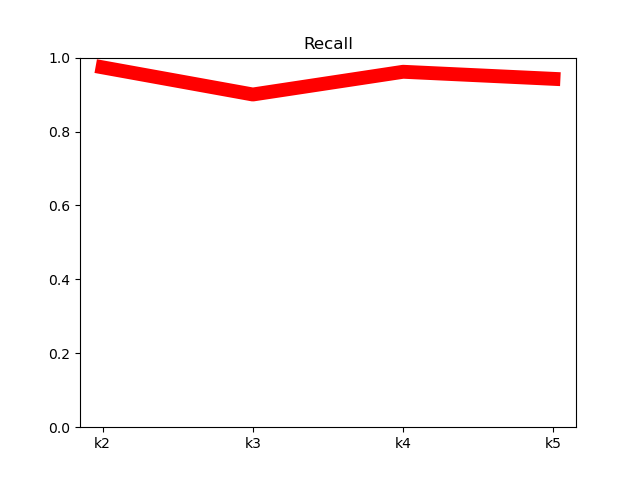
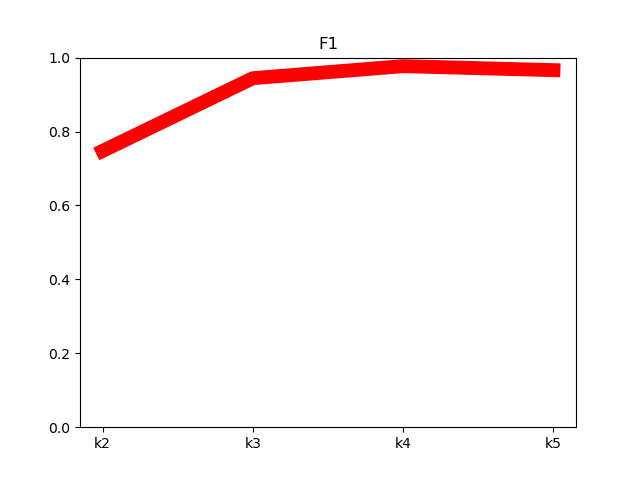
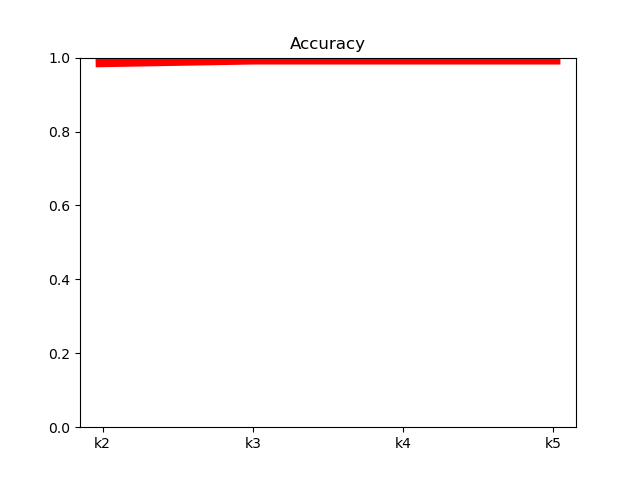
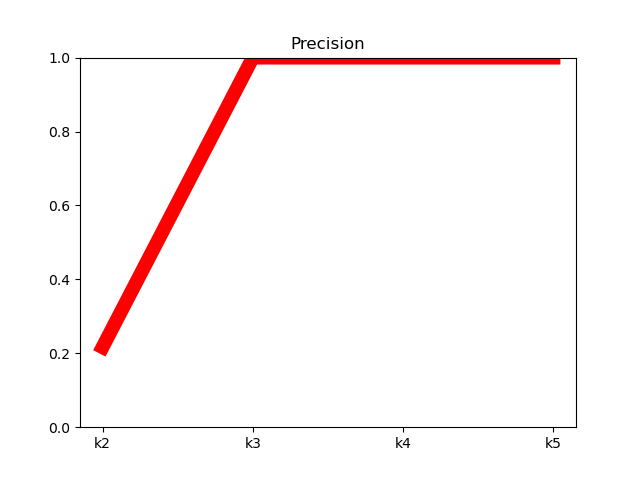
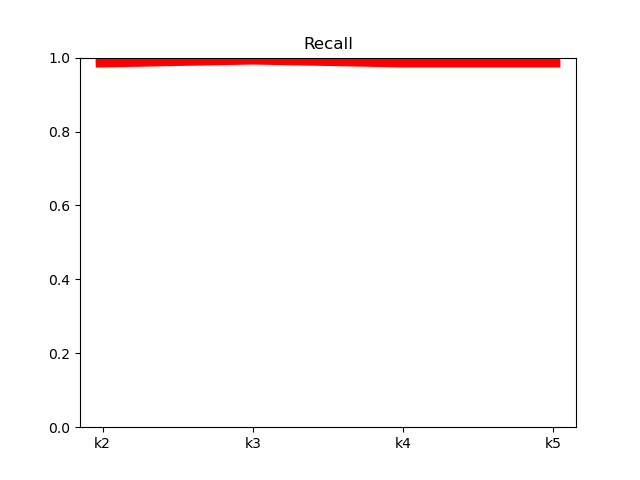
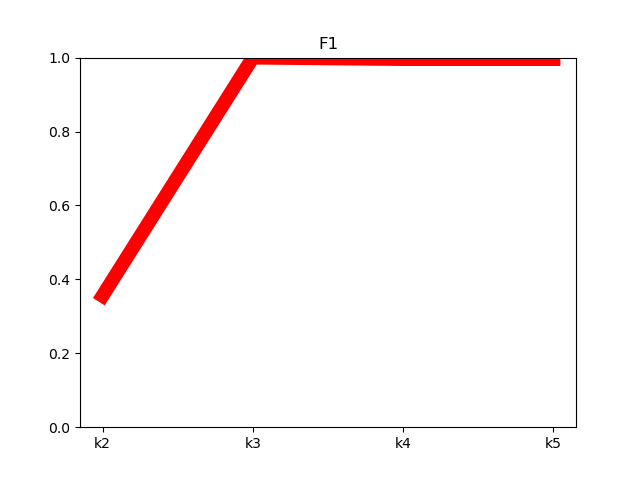
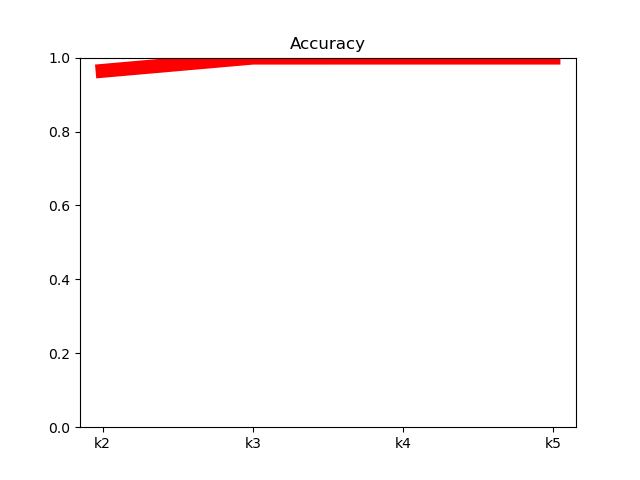
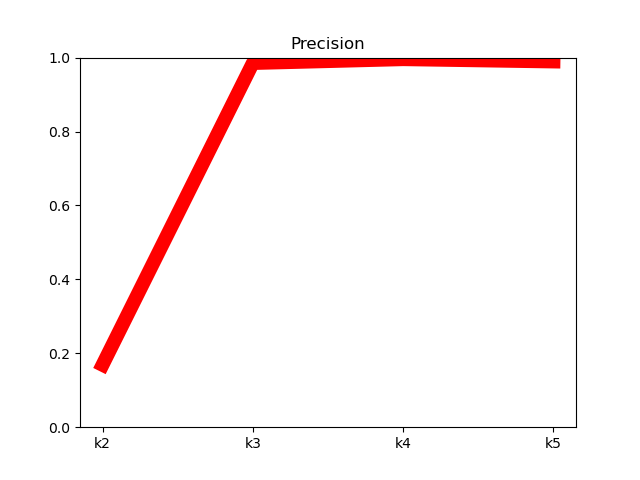
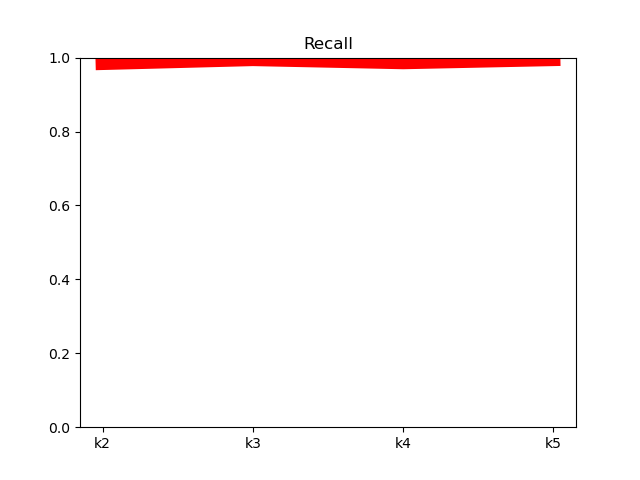
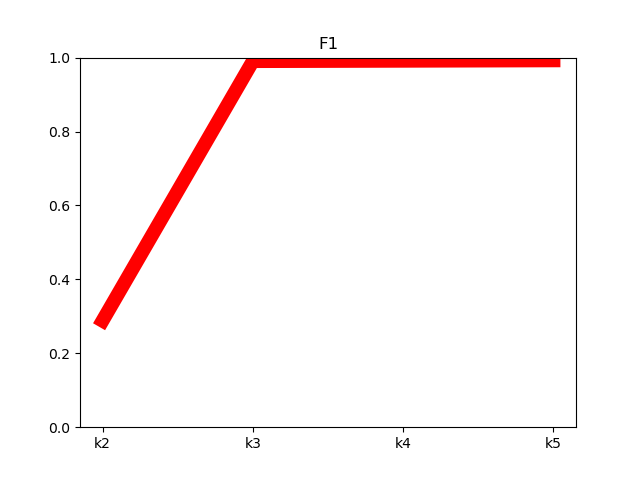
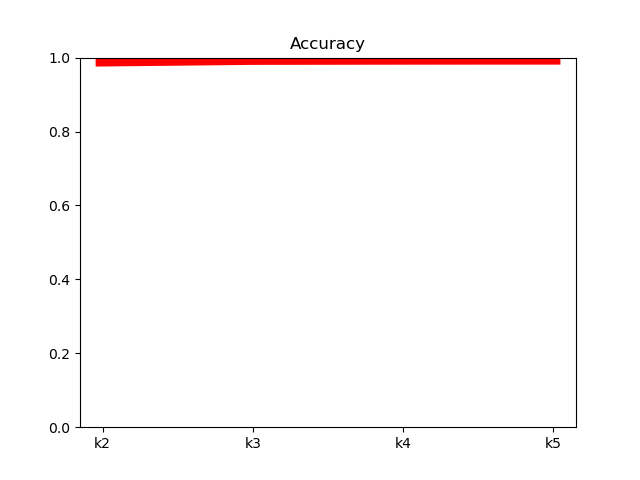
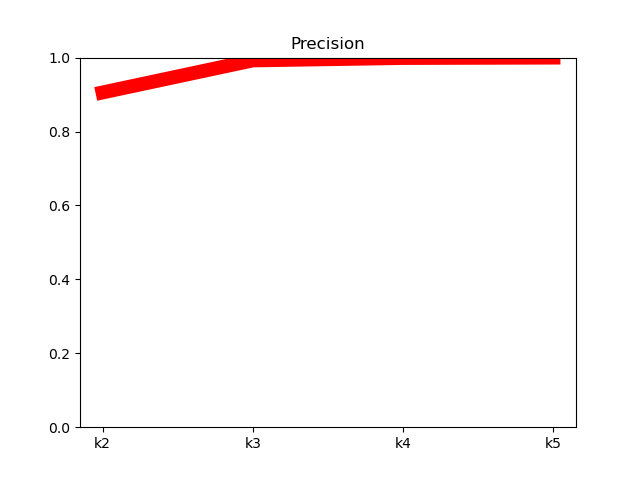
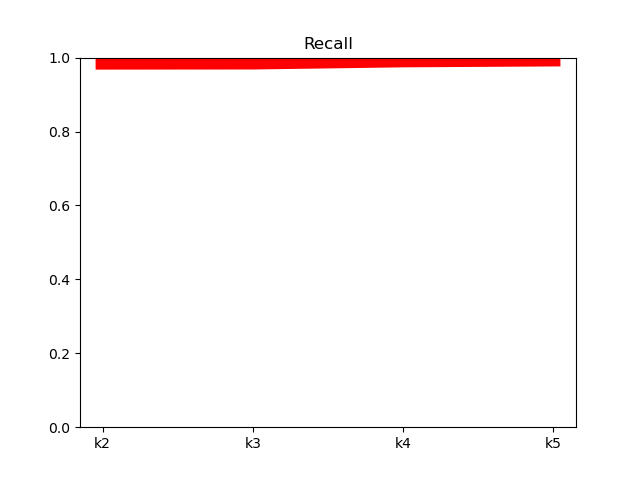
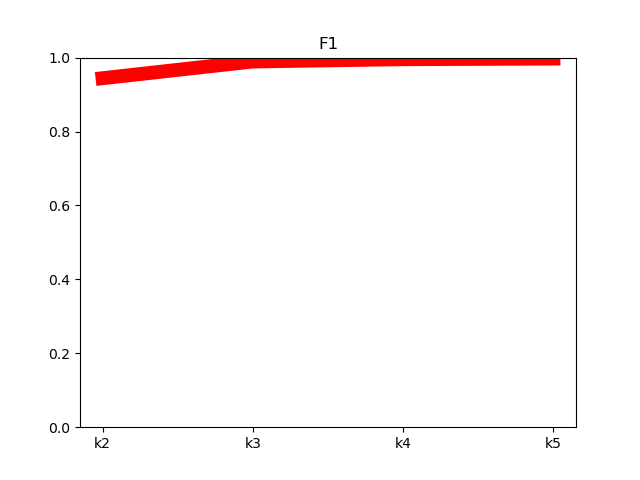
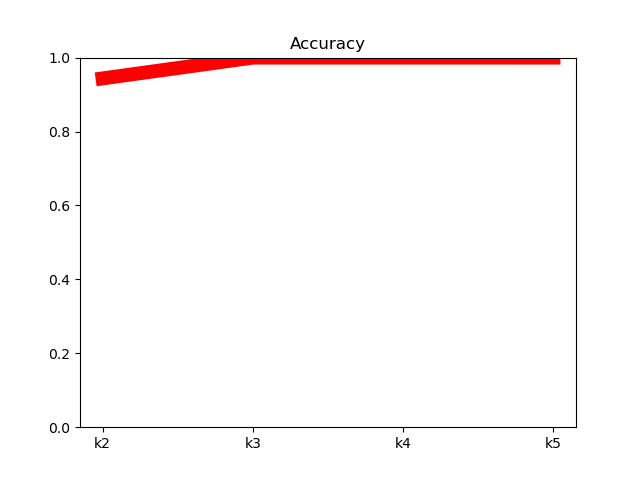
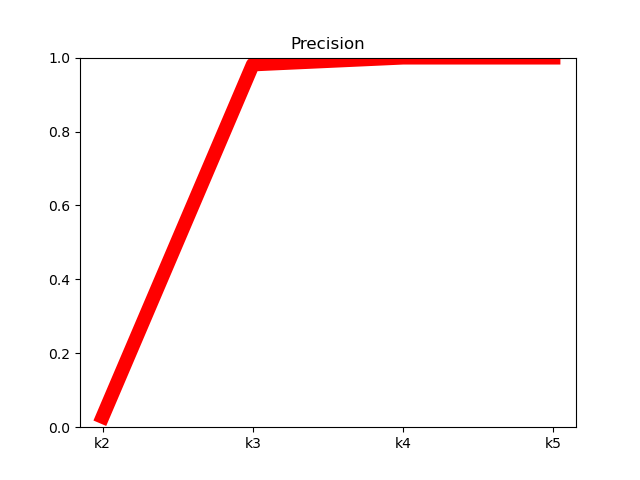
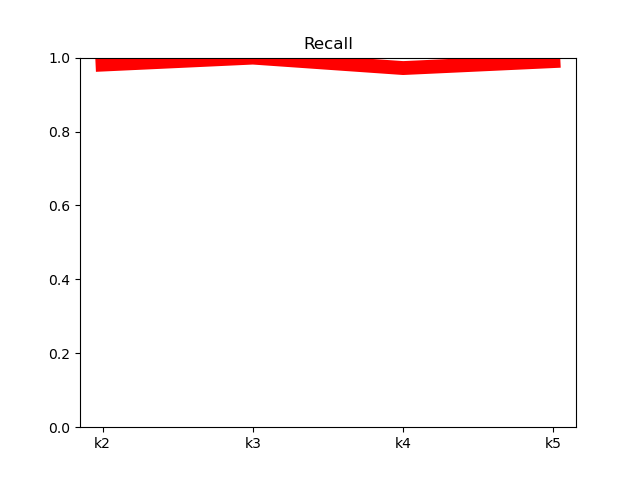
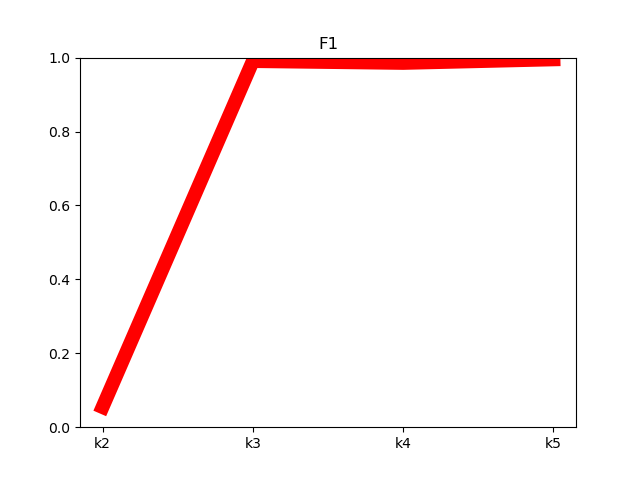
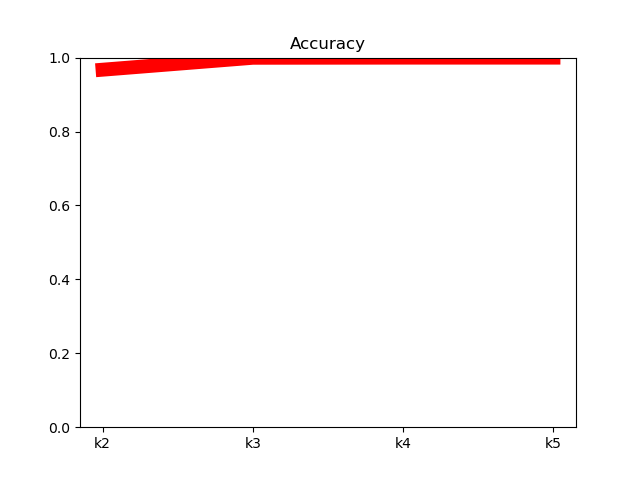
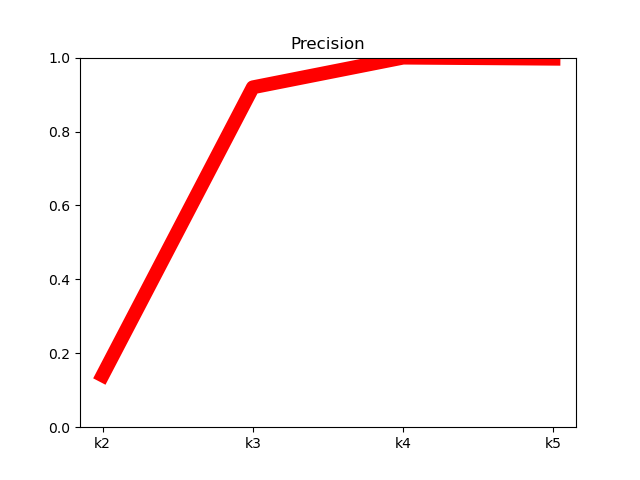
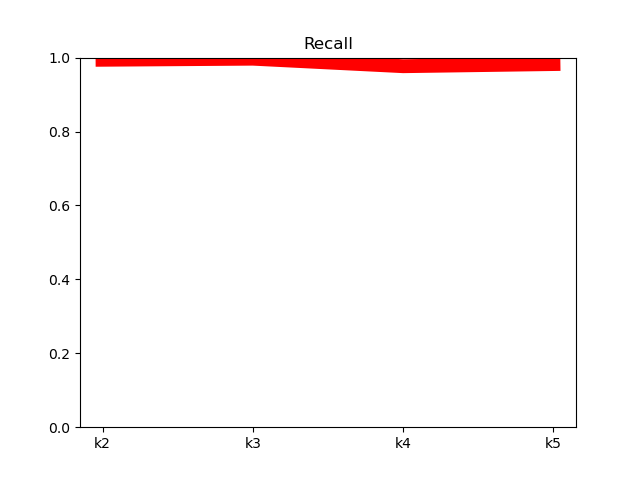
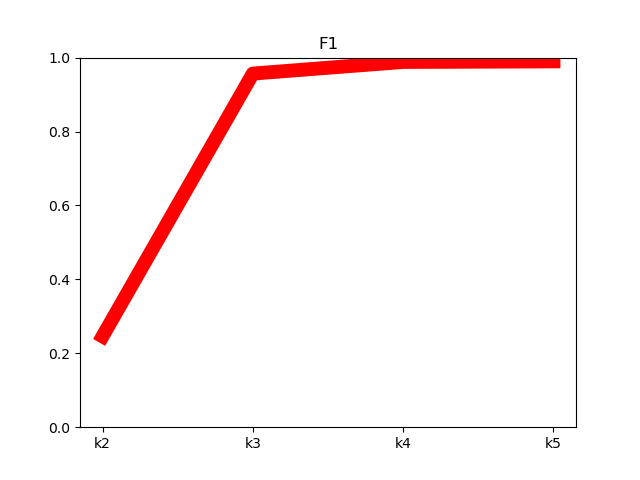
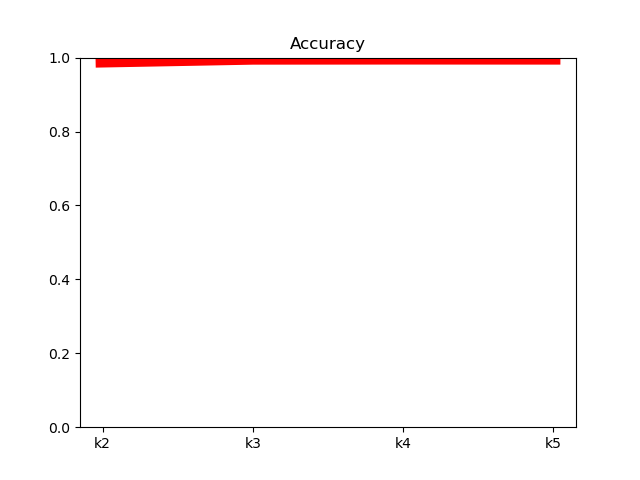
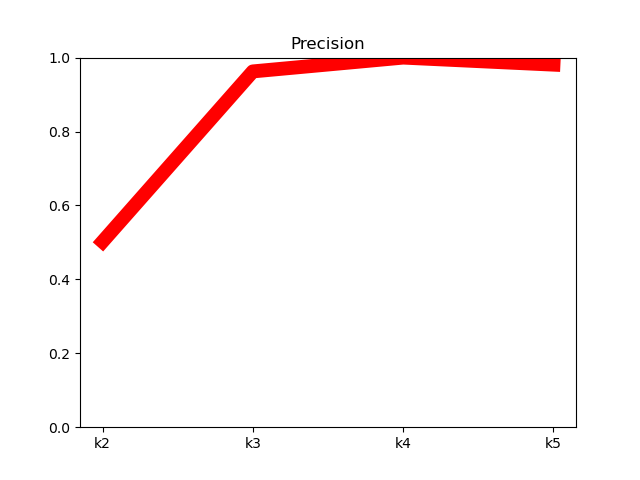
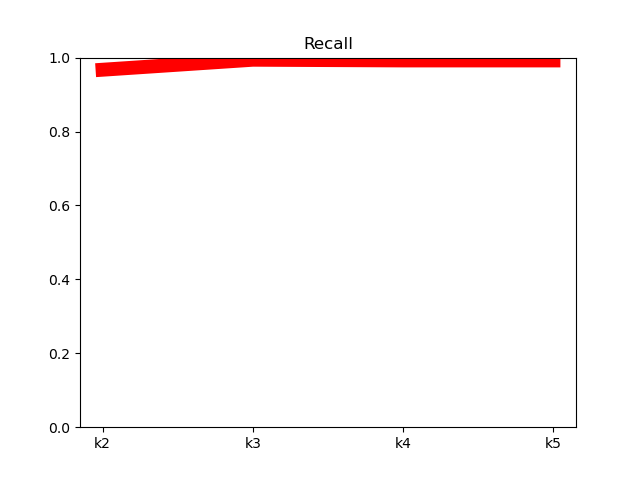
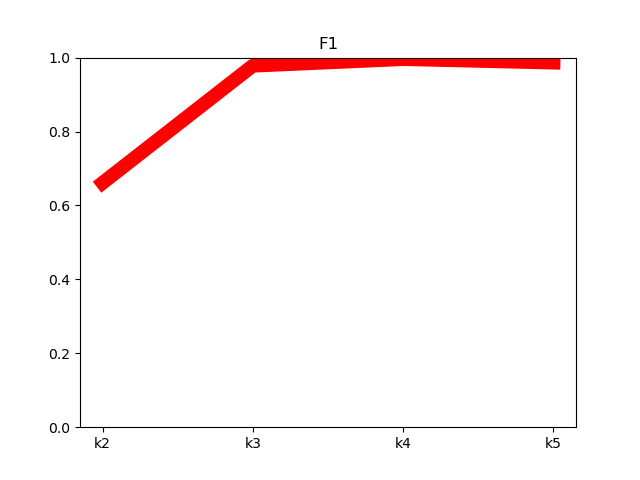
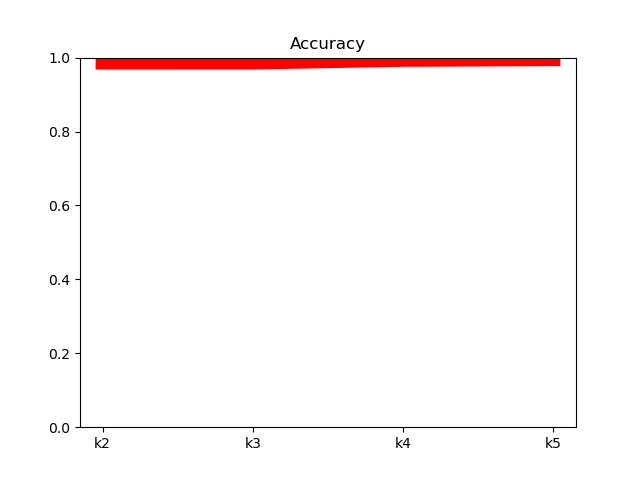
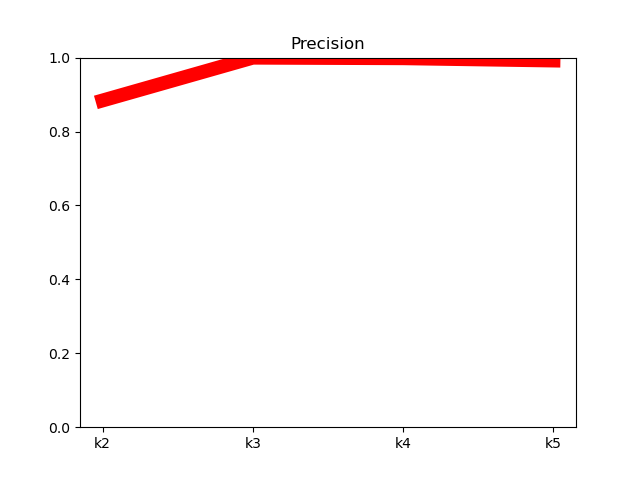
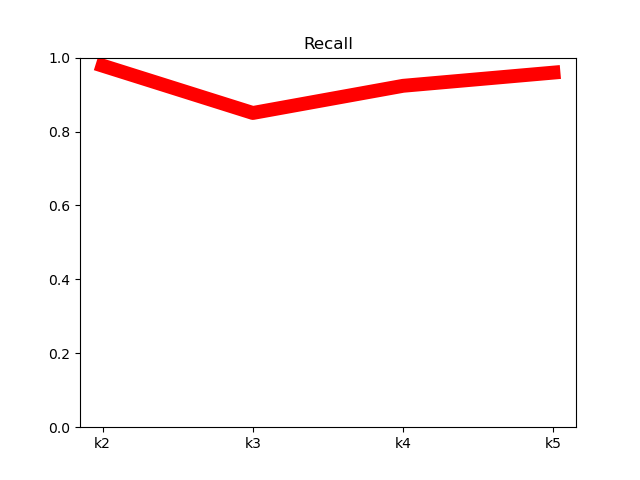
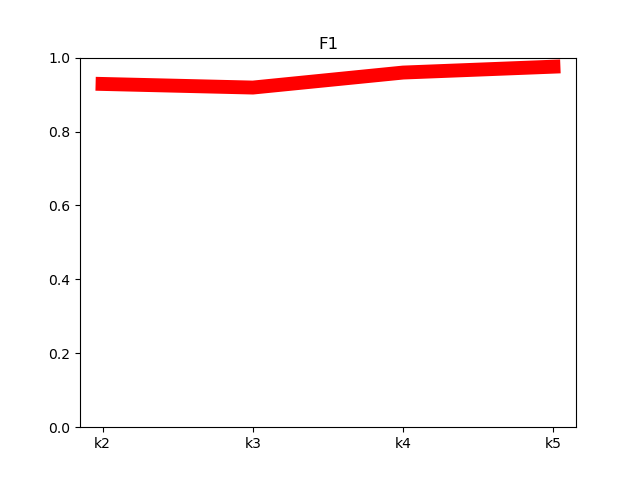
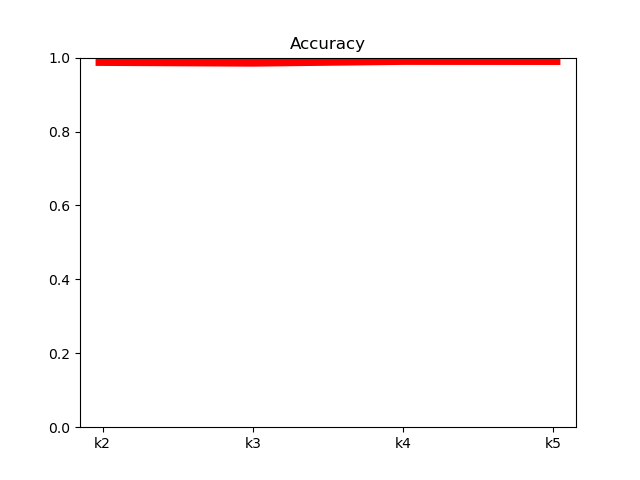
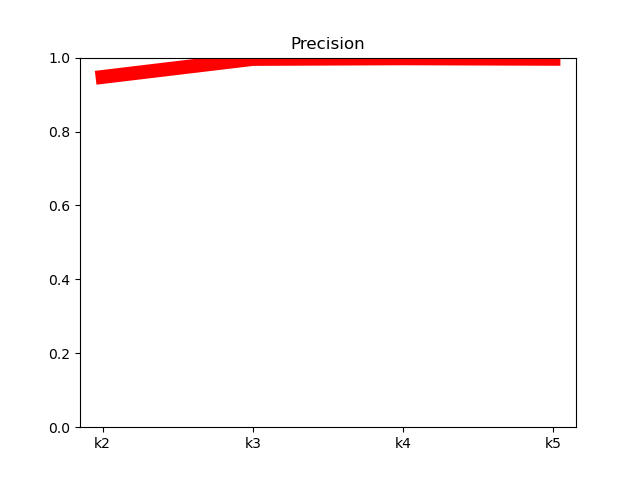
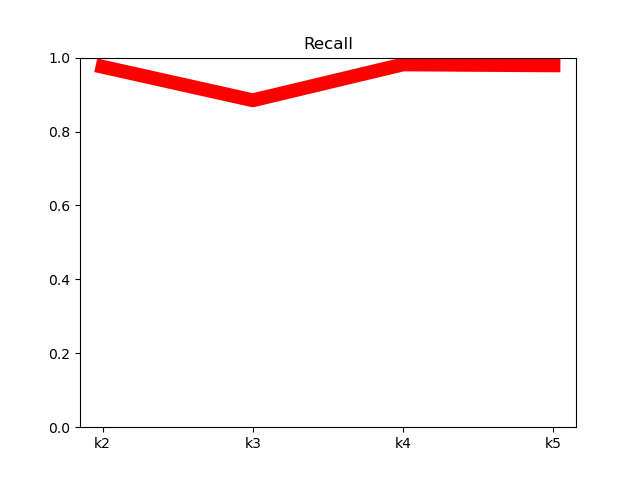
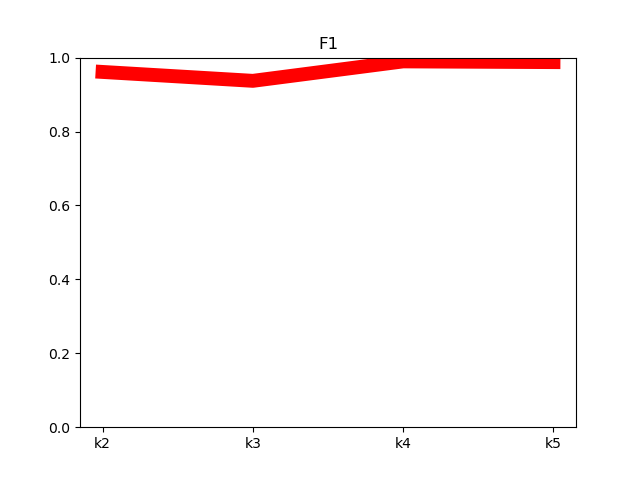

In [5]:

# Display the HTML table
from IPython.display import display, HTML
display(HTML(metrics_table[0]))
display(HTML(metrics_table[1]))

In [20]:
def generate_overall_metrics_table(metrics_folder):
    # Read BLAST metrics
    with open(os.path.join(metrics_folder, "method_blast/blast_results.json"), 'r') as f:
        blast_metrics = json.load(f)

    # Read Max Voting metrics
    method2 = "BINARY CLASSIFIER + MAX VOTING"
    folder2 = os.path.join(metrics_folder, "method_maxvoting")
    threshold_values = [folder for folder in os.listdir(folder2) if folder in ['0', '50', '95']]
    methode2_threshold = {"0.0":{}, "0.5":{}, "0.95":{}}
    for threshold in threshold_values:
        files = os.listdir(os.path.join(folder2, threshold))
        metric_files = [file for file in files if file.startswith("overall_classifier_") and file.endswith(".json")]
        k_metrics = [None, None, None, None]
        for file in metric_files:
            k_value = int(file.split("_")[2].split(".")[0])
            with open(os.path.join(folder2, threshold, file), 'r') as f:
                metrics = json.load(f)
            k_metrics[k_value-2] = metrics
        methode2_threshold[str(int(threshold)/100)] = k_metrics

    # Read Two Stage Meta-Classifier metrics
    method3 = "BINARY CLASSIFIER + SECOND STAGE META-CLASSIFIER"
    folder3 = os.path.join(metrics_folder, "method_two-stage")
    threshold_values = [folder for folder in os.listdir(folder3) if folder in ['0', '50', '95']]
    methode3_threshold = {"0.0":{}, "0.5":{}, "0.95":{}}
    for threshold in threshold_values:
        files = os.listdir(os.path.join(folder3, threshold))
        metric_files = [file for file in files if file.startswith("overall_classifier_") and file.endswith(".json")]
        k_metrics = [None, None, None, None]
        for file in metric_files:
            k_value = int(file.split("_")[2].split(".")[0])
            with open(os.path.join(folder3, threshold, file), 'r') as f:
                metrics = json.load(f)
            k_metrics[k_value-2] = metrics
        methode3_threshold[str(int(threshold)/100)] = k_metrics

    # HTML table template
    html = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Table Example</title>
        <style>
            table {
                width: 100%;
                border-collapse: collapse;
            }
            th, td {
                border: 1px solid black;
                text-align: center;
                padding: 5px;
            }
            th {
                background-color: #f2f2f2;
                text-align: center !important;
                border: 1px solid !important;
            }
            .nested-header {
                background-color: #d9d9d9;
                text-align: center !important;
                border: 1px solid !important;
            }
            .micro-header {
                background-color: #e6e6e6;
            }
            .border{
                border: 1px solid !important;
            }
            .center{
                text-align:center !important;
            }
            .mw{
                width: 5em !important;
            }
            .br{
                border-right: 1px solid !important;
                text-align: center !important; 
            }
            .bg{background-color: #f2f2f2;}
            .bold{font-weight: bold;}
        </style>
    </head>
    <body>
    <table>
        <thead>
            <tr>
                <th rowspan="10" class='border center' style='width: 5em;'></th>
                <th rowspan="5" class='border center mw'>Metrics</th>
                <th rowspan="5" class='border center' style='width: 4em;'>BLAST</th>
                <th colspan="12" class='border center'>Max Voting</th>
                <th colspan="12" class='border center'>Two Stage</th>
            </tr>
            <tr>
                <th colspan="4" class="nested-header">Threshold = 0.0</th>
                <th colspan="4" class="nested-header">Threshold = 0.5</th>
                <th colspan="4" class="nested-header">Threshold = 0.95</th>
                <th colspan="4" class="nested-header">Threshold = 0.0</th>
                <th colspan="4" class="nested-header">Threshold = 0.5</th>
                <th colspan="4" class="nested-header">Threshold = 0.95</th>
            </tr>
            <tr>
                <th class="nested-header">k=2</th>
                <th class="nested-header">k=3</th>
                <th class="nested-header">k=4</th>
                <th class="nested-header">k=5</th>
                <th class="nested-header">k=2</th>
                <th class="nested-header">k=3</th>
                <th class="nested-header">k=4</th>
                <th class="nested-header">k=5</th>
                <th class="nested-header">k=2</th>
                <th class="nested-header">k=3</th>
                <th class="nested-header">k=4</th>
                <th class="nested-header">k=5</th>
                <th class="nested-header">k=2</th>
                <th class="nested-header">k=3</th>
                <th class="nested-header">k=4</th>
                <th class="nested-header">k=5</th>
                <th class="nested-header">k=2</th>
                <th class="nested-header">k=3</th>
                <th class="nested-header">k=4</th>
                <th class="nested-header">k=5</th>
                <th class="nested-header">k=2</th>
                <th class="nested-header">k=3</th>
                <th class="nested-header">k=4</th>
                <th class="nested-header">k=5</th>
            </tr>
        </thead>
        <tbody>
    """

    # accuracy
    accuracies = [
        blast_metrics['accuracy'],
        methode2_threshold['0.0'][0]['accuracy'],
        methode2_threshold['0.0'][1]['accuracy'],
        methode2_threshold['0.0'][2]['accuracy'],
        methode2_threshold['0.0'][3]['accuracy'],
        methode2_threshold['0.5'][0]['accuracy'],
        methode2_threshold['0.5'][1]['accuracy'],
        methode2_threshold['0.5'][2]['accuracy'],
        methode2_threshold['0.5'][3]['accuracy'],
        methode2_threshold['0.95'][0]['accuracy'],
        methode2_threshold['0.95'][1]['accuracy'],
        methode2_threshold['0.95'][2]['accuracy'],
        methode2_threshold['0.95'][3]['accuracy'],
        methode3_threshold['0.0'][0]['accuracy'],
        methode3_threshold['0.0'][1]['accuracy'],
        methode3_threshold['0.0'][2]['accuracy'],
        methode3_threshold['0.0'][3]['accuracy'],
        methode3_threshold['0.5'][0]['accuracy'],
        methode3_threshold['0.5'][1]['accuracy'],
        methode3_threshold['0.5'][2]['accuracy'],
        methode3_threshold['0.5'][3]['accuracy'],
        methode3_threshold['0.95'][0]['accuracy'],
        methode3_threshold['0.95'][1]['accuracy'],
        methode3_threshold['0.95'][2]['accuracy'],
        methode3_threshold['0.95'][3]['accuracy']
    ]
    max_accuracy = max(accuracies)
    html += f"""<tr><td class=' '></td><td class='nested-header'>Acuracy</td><td class='center br {'bold' if accuracies[0]==max_accuracy else ''}'>{accuracies[0]:.3f}</td>"""
    for i in range(1, len(accuracies)):
        html += f"<td class='{'br' if i%4==0 else ''} {'bold' if accuracies[i]==max_accuracy else ''}'>{accuracies[i]:.3f}</td>"
    html += "</tr>"

    # precision_micro
    precision_micro = [
        blast_metrics['precision_micro'],
        methode2_threshold['0.0'][0]['precision_micro'],
        methode2_threshold['0.0'][1]['precision_micro'],
        methode2_threshold['0.0'][2]['precision_micro'],
        methode2_threshold['0.0'][3]['precision_micro'],
        methode2_threshold['0.5'][0]['precision_micro'],
        methode2_threshold['0.5'][1]['precision_micro'],
        methode2_threshold['0.5'][2]['precision_micro'],
        methode2_threshold['0.5'][3]['precision_micro'],
        methode2_threshold['0.95'][0]['precision_micro'],
        methode2_threshold['0.95'][1]['precision_micro'],
        methode2_threshold['0.95'][2]['precision_micro'],
        methode2_threshold['0.95'][3]['precision_micro'],
        methode3_threshold['0.0'][0]['precision_micro'],
        methode3_threshold['0.0'][1]['precision_micro'],
        methode3_threshold['0.0'][2]['precision_micro'],
        methode3_threshold['0.0'][3]['precision_micro'],
        methode3_threshold['0.5'][0]['precision_micro'],
        methode3_threshold['0.5'][1]['precision_micro'],
        methode3_threshold['0.5'][2]['precision_micro'],
        methode3_threshold['0.5'][3]['precision_micro'],
        methode3_threshold['0.95'][0]['precision_micro'],
        methode3_threshold['0.95'][1]['precision_micro'],
        methode3_threshold['0.95'][2]['precision_micro'],
        methode3_threshold['0.95'][3]['precision_micro']
    ]
    max_precision_micro = max(precision_micro)
    html += f"""<tr><td class='center' rowspan="3">Micro</td><td class="nested-header center">Precision</td> <td class='center br {'bold' if precision_micro[0]==max_precision_micro else ''}'>{precision_micro[0]:.3f}</td>"""
    for i in range(1, len(accuracies)):
        html += f"<td class='{'br' if i%4==0 else ''} {'bold' if precision_micro[i]==max_precision_micro else ''}'>{precision_micro[i]:.3f}</td>"
    html += "</tr>"
    
    # recall_micro
    recall_micro = [
        blast_metrics['recall_micro'],
        methode2_threshold['0.0'][0]['recall_micro'],
        methode2_threshold['0.0'][1]['recall_micro'],
        methode2_threshold['0.0'][2]['recall_micro'],
        methode2_threshold['0.0'][3]['recall_micro'],
        methode2_threshold['0.5'][0]['recall_micro'],
        methode2_threshold['0.5'][1]['recall_micro'],
        methode2_threshold['0.5'][2]['recall_micro'],
        methode2_threshold['0.5'][3]['recall_micro'],
        methode2_threshold['0.95'][0]['recall_micro'],
        methode2_threshold['0.95'][1]['recall_micro'],
        methode2_threshold['0.95'][2]['recall_micro'],
        methode2_threshold['0.95'][3]['recall_micro'],
        methode3_threshold['0.0'][0]['recall_micro'],
        methode3_threshold['0.0'][1]['recall_micro'],
        methode3_threshold['0.0'][2]['recall_micro'],
        methode3_threshold['0.0'][3]['recall_micro'],
        methode3_threshold['0.5'][0]['recall_micro'],
        methode3_threshold['0.5'][1]['recall_micro'],
        methode3_threshold['0.5'][2]['recall_micro'],
        methode3_threshold['0.5'][3]['recall_micro'],
        methode3_threshold['0.95'][0]['recall_micro'],
        methode3_threshold['0.95'][1]['recall_micro'],
        methode3_threshold['0.95'][2]['recall_micro'],
        methode3_threshold['0.95'][3]['recall_micro']
    ]
    max_recall_micro = max(recall_micro)
    html += f"""<tr><td class="nested-header center ">Recall</td> <td class='br {'bold' if recall_micro[0]==max_recall_micro else ''}'>{recall_micro[0]:.3f}</td>"""
    for i in range(1, len(accuracies)):
        html += f"<td class='{'br' if i%4==0 else ''} {'bold' if recall_micro[i]==max_recall_micro else ''}'>{recall_micro[i]:.3f}</td>"
    html += "</tr>"

    # f1_micro
    f1_micro = [
        blast_metrics['f1_micro'],
        methode2_threshold['0.0'][0]['f1_micro'],
        methode2_threshold['0.0'][1]['f1_micro'],
        methode2_threshold['0.0'][2]['f1_micro'],
        methode2_threshold['0.0'][3]['f1_micro'],
        methode2_threshold['0.5'][0]['f1_micro'],
        methode2_threshold['0.5'][1]['f1_micro'],
        methode2_threshold['0.5'][2]['f1_micro'],
        methode2_threshold['0.5'][3]['f1_micro'],
        methode2_threshold['0.95'][0]['f1_micro'],
        methode2_threshold['0.95'][1]['f1_micro'],
        methode2_threshold['0.95'][2]['f1_micro'],
        methode2_threshold['0.95'][3]['f1_micro'],
        methode3_threshold['0.0'][0]['f1_micro'],
        methode3_threshold['0.0'][1]['f1_micro'],
        methode3_threshold['0.0'][2]['f1_micro'],
        methode3_threshold['0.0'][3]['f1_micro'],
        methode3_threshold['0.5'][0]['f1_micro'],
        methode3_threshold['0.5'][1]['f1_micro'],
        methode3_threshold['0.5'][2]['f1_micro'],
        methode3_threshold['0.5'][3]['f1_micro'],
        methode3_threshold['0.95'][0]['f1_micro'],
        methode3_threshold['0.95'][1]['f1_micro'],
        methode3_threshold['0.95'][2]['f1_micro'],
        methode3_threshold['0.95'][3]['f1_micro']
    ]
    max_f1_micro = max(f1_micro)
    html += f"""<tr><td class="nested-header center">F1</td> <td class='br {'bold' if f1_micro[0]==max_f1_micro else ''}'>{f1_micro[0]:.3f}</td>"""
    for i in range(1, len(accuracies)):
        html += f"<td class='{'br' if i%4==0 else ''} {'bold' if f1_micro[i]==max_f1_micro else ''}'>{f1_micro[i]:.3f}</td>"
    html += "</tr>"

    # precision_macro
    precision_macro = [
        blast_metrics['precision_macro'],
        methode2_threshold['0.0'][0]['precision_macro'],
        methode2_threshold['0.0'][1]['precision_macro'],
        methode2_threshold['0.0'][2]['precision_macro'],
        methode2_threshold['0.0'][3]['precision_macro'],
        methode2_threshold['0.5'][0]['precision_macro'],
        methode2_threshold['0.5'][1]['precision_macro'],
        methode2_threshold['0.5'][2]['precision_macro'],
        methode2_threshold['0.5'][3]['precision_macro'],
        methode2_threshold['0.95'][0]['precision_macro'],
        methode2_threshold['0.95'][1]['precision_macro'],
        methode2_threshold['0.95'][2]['precision_macro'],
        methode2_threshold['0.95'][3]['precision_macro'],
        methode3_threshold['0.0'][0]['precision_macro'],
        methode3_threshold['0.0'][1]['precision_macro'],
        methode3_threshold['0.0'][2]['precision_macro'],
        methode3_threshold['0.0'][3]['precision_macro'],
        methode3_threshold['0.5'][0]['precision_macro'],
        methode3_threshold['0.5'][1]['precision_macro'],
        methode3_threshold['0.5'][2]['precision_macro'],
        methode3_threshold['0.5'][3]['precision_macro'],
        methode3_threshold['0.95'][0]['precision_macro'],
        methode3_threshold['0.95'][1]['precision_macro'],
        methode3_threshold['0.95'][2]['precision_macro'],
        methode3_threshold['0.95'][3]['precision_macro']
    ]
    max_precision_macro = max(precision_macro)
    html += f"""<tr><td rowspan="3" class='center' >Macro</td><td class="nested-header">Precision</td> <td class='br {'bold' if precision_macro[0]==max_precision_macro else ''}'>{precision_macro[0]:.3f}</td>"""
    for i in range(1, len(precision_macro)):
        html += f"<td class='{'br' if i%4==0 else ''} {'bold' if precision_macro[i]==max_precision_macro else ''}'>{precision_macro[i]:.3f}</td>"
    html += "</tr>"
    
    # recall_macro
    recall_macro = [
        blast_metrics['recall_macro'],
        methode2_threshold['0.0'][0]['recall_macro'],
        methode2_threshold['0.0'][1]['recall_macro'],
        methode2_threshold['0.0'][2]['recall_macro'],
        methode2_threshold['0.0'][3]['recall_macro'],
        methode2_threshold['0.5'][0]['recall_macro'],
        methode2_threshold['0.5'][1]['recall_macro'],
        methode2_threshold['0.5'][2]['recall_macro'],
        methode2_threshold['0.5'][3]['recall_macro'],
        methode2_threshold['0.95'][0]['recall_macro'],
        methode2_threshold['0.95'][1]['recall_macro'],
        methode2_threshold['0.95'][2]['recall_macro'],
        methode2_threshold['0.95'][3]['recall_macro'],
        methode3_threshold['0.0'][0]['recall_macro'],
        methode3_threshold['0.0'][1]['recall_macro'],
        methode3_threshold['0.0'][2]['recall_macro'],
        methode3_threshold['0.0'][3]['recall_macro'],
        methode3_threshold['0.5'][0]['recall_macro'],
        methode3_threshold['0.5'][1]['recall_macro'],
        methode3_threshold['0.5'][2]['recall_macro'],
        methode3_threshold['0.5'][3]['recall_macro'],
        methode3_threshold['0.95'][0]['recall_macro'],
        methode3_threshold['0.95'][1]['recall_macro'],
        methode3_threshold['0.95'][2]['recall_macro'],
        methode3_threshold['0.95'][3]['recall_macro']
    ]
    max_recall_macro = max(recall_macro)
    html += f"""<tr><td class="nested-header center">Recall</td> <td class='br {'bold' if recall_macro[0]==max_recall_macro else ''}'>{recall_macro[0]:.3f}</td>"""
    for i in range(1, len(recall_macro)):
        html += f"<td class='{'br' if i%4==0 else ''} {'bold' if recall_macro[i]==max_recall_macro else ''}'>{recall_macro[i]:.3f}</td>"
    html += "</tr>"
    
    # f1_macro
    f1_macro = [
        blast_metrics['f1_macro'],
        methode2_threshold['0.0'][0]['f1_macro'],
        methode2_threshold['0.0'][1]['f1_macro'],
        methode2_threshold['0.0'][2]['f1_macro'],
        methode2_threshold['0.0'][3]['f1_macro'],
        methode2_threshold['0.5'][0]['f1_macro'],
        methode2_threshold['0.5'][1]['f1_macro'],
        methode2_threshold['0.5'][2]['f1_macro'],
        methode2_threshold['0.5'][3]['f1_macro'],
        methode2_threshold['0.95'][0]['f1_macro'],
        methode2_threshold['0.95'][1]['f1_macro'],
        methode2_threshold['0.95'][2]['f1_macro'],
        methode2_threshold['0.95'][3]['f1_macro'],
        methode3_threshold['0.0'][0]['f1_macro'],
        methode3_threshold['0.0'][1]['f1_macro'],
        methode3_threshold['0.0'][2]['f1_macro'],
        methode3_threshold['0.0'][3]['f1_macro'],
        methode3_threshold['0.5'][0]['f1_macro'],
        methode3_threshold['0.5'][1]['f1_macro'],
        methode3_threshold['0.5'][2]['f1_macro'],
        methode3_threshold['0.5'][3]['f1_macro'],
        methode3_threshold['0.95'][0]['f1_macro'],
        methode3_threshold['0.95'][1]['f1_macro'],
        methode3_threshold['0.95'][2]['f1_macro'],
        methode3_threshold['0.95'][3]['f1_macro']
    ]
    max_f1_macro = max(f1_macro)
    html += f"""<tr><td class="nested-header center">F1</td> <td class='br {'bold' if f1_macro[0]==max_f1_macro else ''}'>{f1_macro[0]:.3f}</td>"""
    for i in range(1, len(f1_macro)):
        html += f"<td class='{'br' if i%4==0 else ''} {'bold' if f1_macro[i]==max_f1_macro else ''}'>{f1_macro[i]:.3f}</td>"
    html += "</tr>"

    # precision_weighted
    precision_weighted = [
        blast_metrics['precision_weighted'],
        methode2_threshold['0.0'][0]['precision_weighted'],
        methode2_threshold['0.0'][1]['precision_weighted'],
        methode2_threshold['0.0'][2]['precision_weighted'],
        methode2_threshold['0.0'][3]['precision_weighted'],
        methode2_threshold['0.5'][0]['precision_weighted'],
        methode2_threshold['0.5'][1]['precision_weighted'],
        methode2_threshold['0.5'][2]['precision_weighted'],
        methode2_threshold['0.5'][3]['precision_weighted'],
        methode2_threshold['0.95'][0]['precision_weighted'],
        methode2_threshold['0.95'][1]['precision_weighted'],
        methode2_threshold['0.95'][2]['precision_weighted'],
        methode2_threshold['0.95'][3]['precision_weighted'],
        methode3_threshold['0.0'][0]['precision_weighted'],
        methode3_threshold['0.0'][1]['precision_weighted'],
        methode3_threshold['0.0'][2]['precision_weighted'],
        methode3_threshold['0.0'][3]['precision_weighted'],
        methode3_threshold['0.5'][0]['precision_weighted'],
        methode3_threshold['0.5'][1]['precision_weighted'],
        methode3_threshold['0.5'][2]['precision_weighted'],
        methode3_threshold['0.5'][3]['precision_weighted'],
        methode3_threshold['0.95'][0]['precision_weighted'],
        methode3_threshold['0.95'][1]['precision_weighted'],
        methode3_threshold['0.95'][2]['precision_weighted'],
        methode3_threshold['0.95'][3]['precision_weighted']
    ]
    max_precision_weighted = max(precision_weighted)
    html += f"""<tr><td rowspan="3" class='center' >Weighted</td><td class="nested-header">Precision</td> <td class='br {'bold' if precision_weighted[0]==max_precision_weighted else ''}'>{precision_weighted[0]:.3f}</td>"""
    for i in range(1, len(precision_weighted)):
        html += f"<td class='{'br' if i%4==0 else ''} {'bold' if precision_weighted[i]==max_precision_weighted else ''}'>{precision_weighted[i]:.3f}</td>"
    html += "</tr>"
    
    # recall_weighted
    recall_weighted = [
        blast_metrics['recall_weighted'],
        methode2_threshold['0.0'][0]['recall_weighted'],
        methode2_threshold['0.0'][1]['recall_weighted'],
        methode2_threshold['0.0'][2]['recall_weighted'],
        methode2_threshold['0.0'][3]['recall_weighted'],
        methode2_threshold['0.5'][0]['recall_weighted'],
        methode2_threshold['0.5'][1]['recall_weighted'],
        methode2_threshold['0.5'][2]['recall_weighted'],
        methode2_threshold['0.5'][3]['recall_weighted'],
        methode2_threshold['0.95'][0]['recall_weighted'],
        methode2_threshold['0.95'][1]['recall_weighted'],
        methode2_threshold['0.95'][2]['recall_weighted'],
        methode2_threshold['0.95'][3]['recall_weighted'],
        methode3_threshold['0.0'][0]['recall_weighted'],
        methode3_threshold['0.0'][1]['recall_weighted'],
        methode3_threshold['0.0'][2]['recall_weighted'],
        methode3_threshold['0.0'][3]['recall_weighted'],
        methode3_threshold['0.5'][0]['recall_weighted'],
        methode3_threshold['0.5'][1]['recall_weighted'],
        methode3_threshold['0.5'][2]['recall_weighted'],
        methode3_threshold['0.5'][3]['recall_weighted'],
        methode3_threshold['0.95'][0]['recall_weighted'],
        methode3_threshold['0.95'][1]['recall_weighted'],
        methode3_threshold['0.95'][2]['recall_weighted'],
        methode3_threshold['0.95'][3]['recall_weighted']
    ]
    max_recall_weighted = max(recall_weighted)
    html += f"""<tr><td class="nested-header center">Recall</td> <td class='br {'bold' if recall_weighted[0]==max_recall_weighted else ''}'>{recall_weighted[0]:.3f}</td>"""
    for i in range(1, len(recall_weighted)):
        html += f"<td class='{'br' if i%4==0 else ''} {'bold' if recall_weighted[i]==max_recall_weighted else ''}'>{recall_weighted[i]:.3f}</td>"
    html += "</tr>"
    
    # f1_weighted
    f1_weighted = [
        blast_metrics['f1_weighted'],
        methode2_threshold['0.0'][0]['f1_weighted'],
        methode2_threshold['0.0'][1]['f1_weighted'],
        methode2_threshold['0.0'][2]['f1_weighted'],
        methode2_threshold['0.0'][3]['f1_weighted'],
        methode2_threshold['0.5'][0]['f1_weighted'],
        methode2_threshold['0.5'][1]['f1_weighted'],
        methode2_threshold['0.5'][2]['f1_weighted'],
        methode2_threshold['0.5'][3]['f1_weighted'],
        methode2_threshold['0.95'][0]['f1_weighted'],
        methode2_threshold['0.95'][1]['f1_weighted'],
        methode2_threshold['0.95'][2]['f1_weighted'],
        methode2_threshold['0.95'][3]['f1_weighted'],
        methode3_threshold['0.0'][0]['f1_weighted'],
        methode3_threshold['0.0'][1]['f1_weighted'],
        methode3_threshold['0.0'][2]['f1_weighted'],
        methode3_threshold['0.0'][3]['f1_weighted'],
        methode3_threshold['0.5'][0]['f1_weighted'],
        methode3_threshold['0.5'][1]['f1_weighted'],
        methode3_threshold['0.5'][2]['f1_weighted'],
        methode3_threshold['0.5'][3]['f1_weighted'],
        methode3_threshold['0.95'][0]['f1_weighted'],
        methode3_threshold['0.95'][1]['f1_weighted'],
        methode3_threshold['0.95'][2]['f1_weighted'],
        methode3_threshold['0.95'][3]['f1_weighted']
    ]
    max_f1_weighted = max(f1_weighted)
    html += f"""<tr><td class="nested-header center>F1</td> <td class='br {'bold' if f1_weighted[0]==max_f1_weighted else ''}'>{f1_weighted[0]:.3f}</td>"""
    for i in range(1, len(f1_weighted)):
        html += f"<td class='{'br' if i%4==0 else ''} {'bold' if f1_weighted[i]==max_f1_weighted else ''}'>{f1_weighted[i]:.3f}</td>"
    html += "</tr>"


    # ADD DESCRIPTION
    html += """
    <tr>
        <td colspan='5' style='text-align: left; width: 100%;'>
            Description:<br>
            (<strong>Micro</strong>) Calculates metrics globally by counting the total true positives, false negatives, and false positives.
            (<strong>Macro</strong>) Calculates metrics for each class independently and then takes the average treating all classes equally
            (<strong>Weighted</strong>) Calculates metrics for each class independently and then takes the average, weighted by the number of instances of each class
        </td>
    </tr>
    """
    
    html += """
        </tbody>
    </table>
    <div colspan='5' style='text-align: left; width: 100%;'>
        Description:<br>
        (<strong>Micro</strong>) Calculates metrics globally by counting the total true positives, false negatives, and false positives.
        (<strong>Macro</strong>) Calculates metrics for each class independently and then takes the average treating all classes equally
        (<strong>Weighted</strong>) Calculates metrics for each class independently and then takes the average, weighted by the number of instances of each class
    </div>
    </body>
    </html>
    """

    return html

In [21]:
metrics_folder = "./metrics"
metrics_table = generate_overall_metrics_table(metrics_folder)

In [22]:
# Display the HTML table
from IPython.display import display, HTML
display(HTML(metrics_table))